In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display
from skimpy import skim
from math import radians, sin, cos, sqrt, atan2
import geopandas as gpd

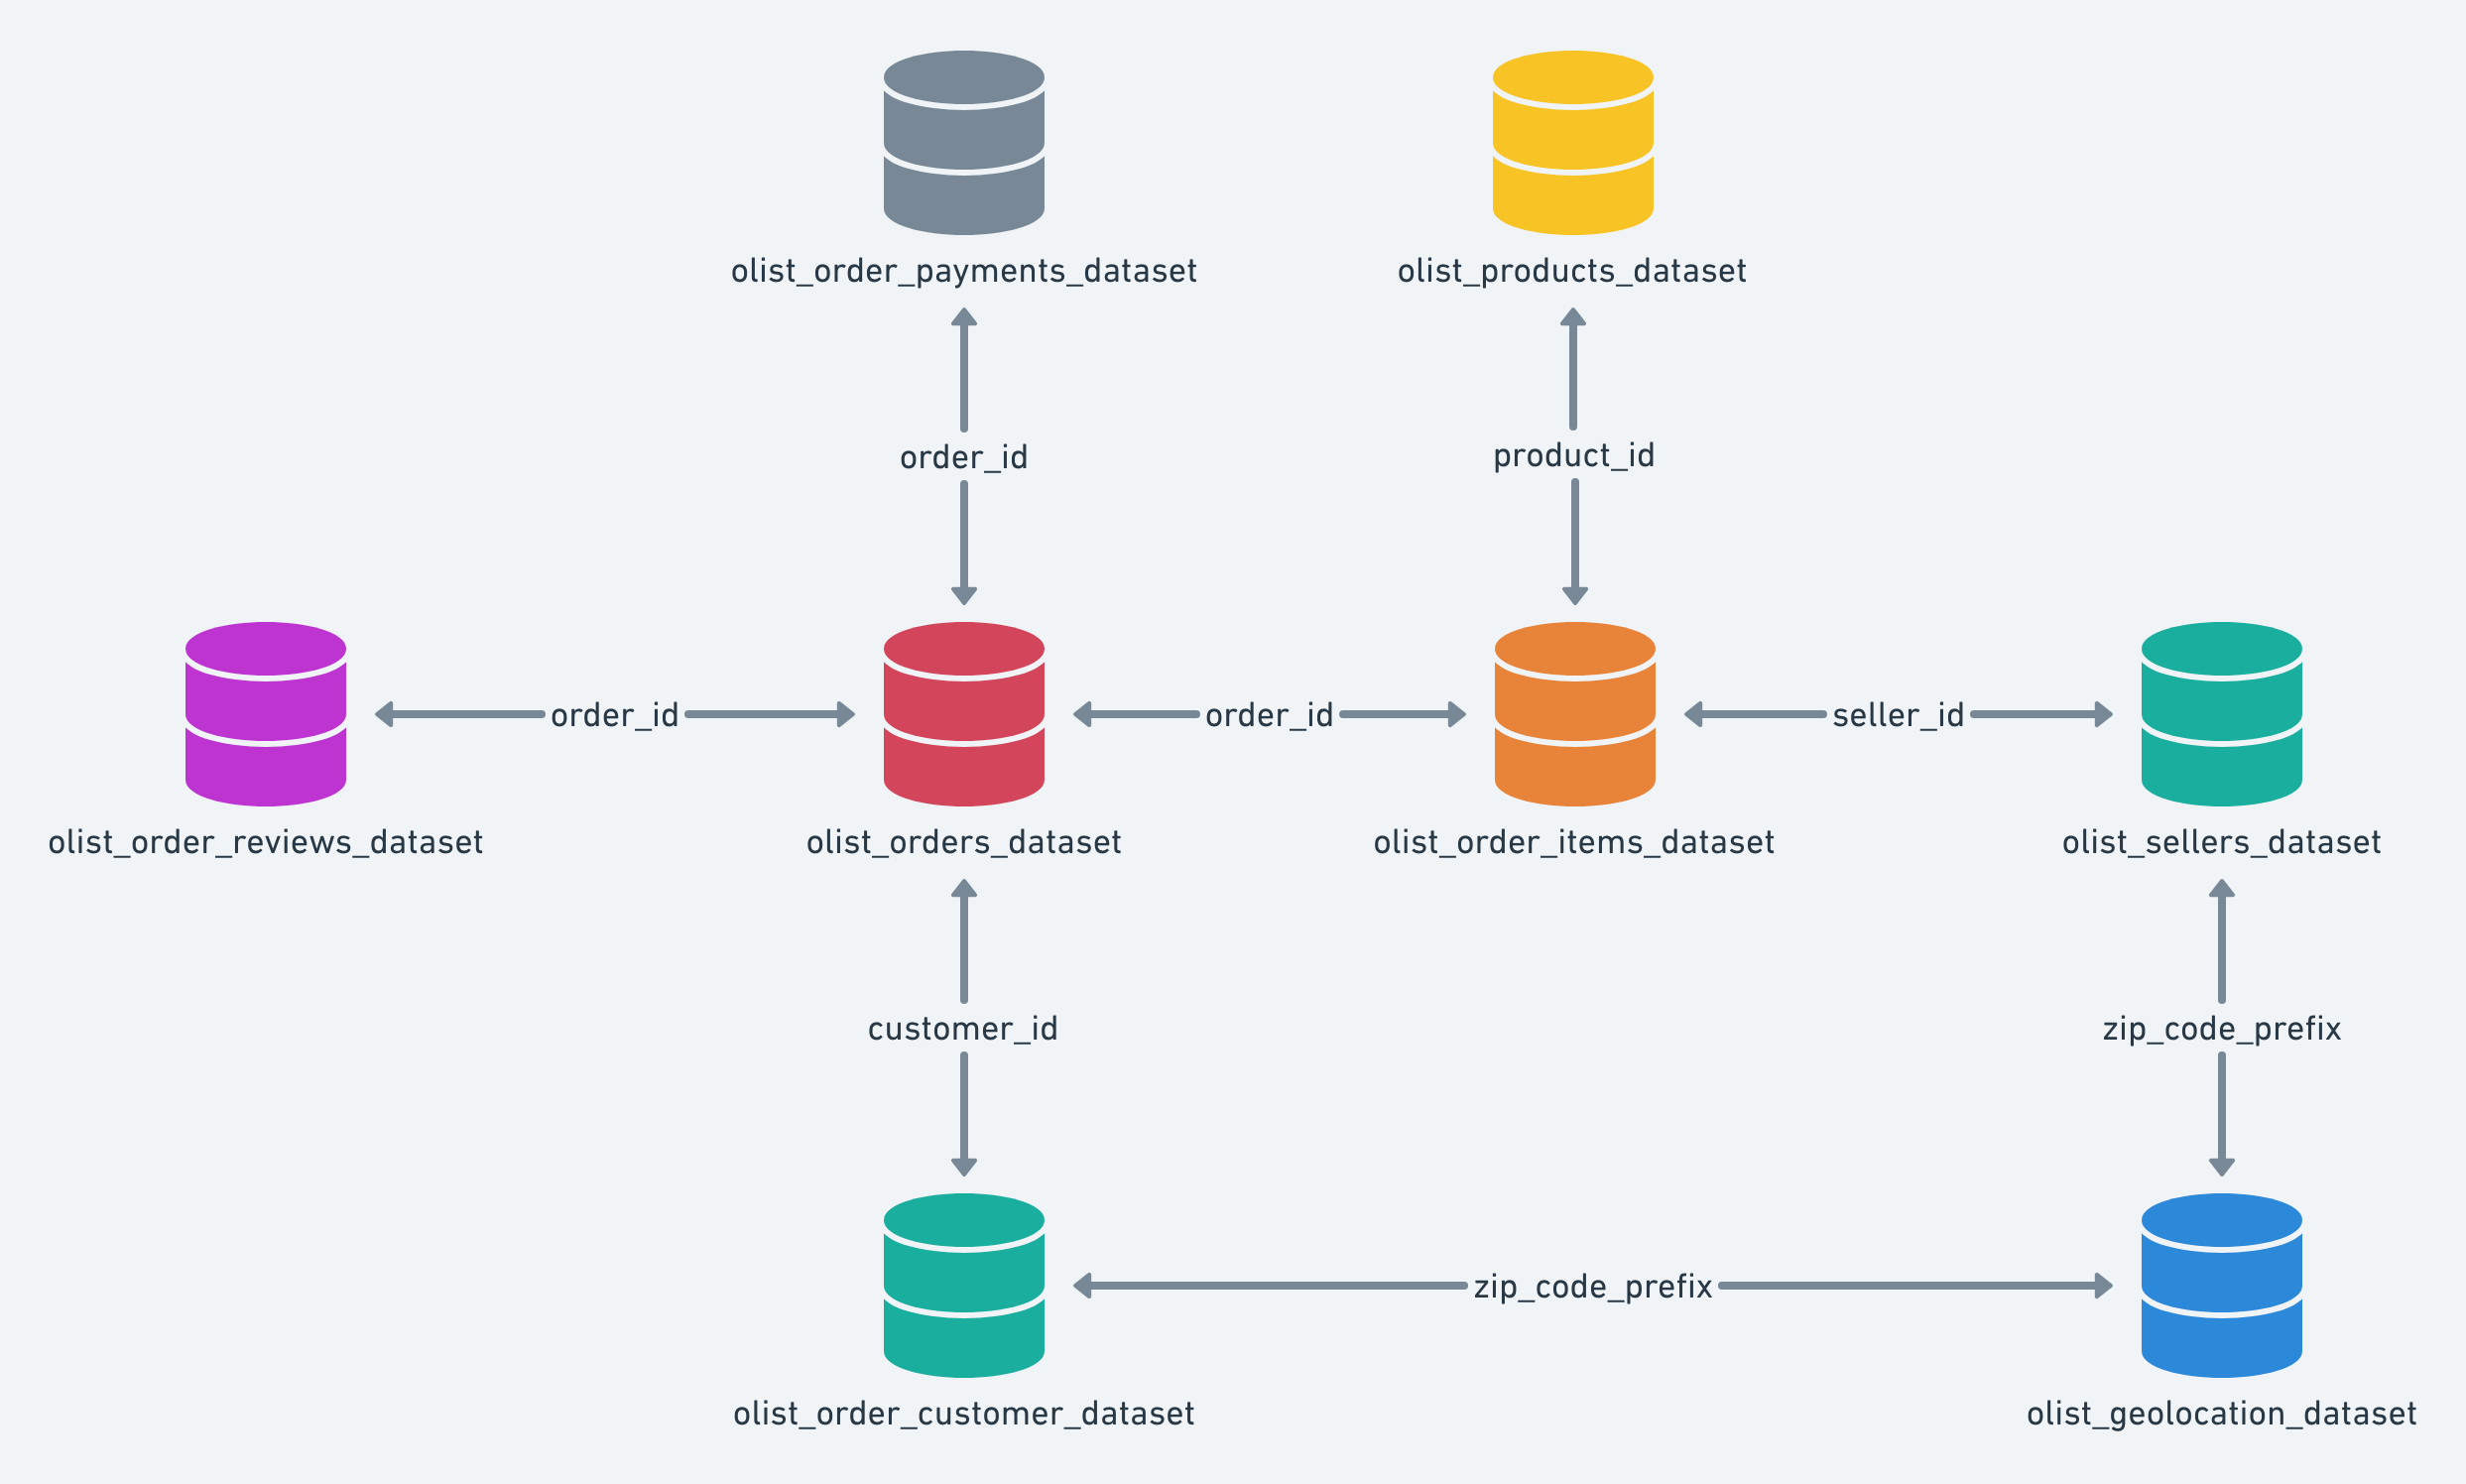

In [326]:
image = Image.open("dataset/HRhd2Y0.png")
display(image)

In [327]:
customers = pd.read_csv('dataset/olist_customers_dataset.csv')
geolocalisation = pd.read_csv('dataset/olist_geolocation_dataset.csv')
order_items = pd.read_csv('dataset/olist_order_items_dataset.csv')
order_payments = pd.read_csv('dataset/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('dataset/olist_order_reviews_dataset.csv')
orders = pd.read_csv('dataset/olist_orders_dataset.csv')
products = pd.read_csv('dataset/olist_products_dataset.csv')
sellers = pd.read_csv('dataset/olist_sellers_dataset.csv')
translation = pd.read_csv('dataset/product_category_name_translation.csv')
dataset_list = [customers , geolocalisation, order_items,order_payments, order_reviews,orders , products, sellers, translation]
dataset_name = ['customers', 'geolocalisation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'products', 'sellers', 'translation']

# 1) Overview

In [328]:
for dataset, name in zip(dataset_list, dataset_name):
    print("Nom du dataset :", name.upper())
    skim(dataset)

Nom du dataset : CUSTOMERS


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 99441  │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ customer_zip_code_pr      │   0 │      0 │   35000 │   30000 │  1000 │  11000 │  59000 │  100000 │ █▅▂▁▂▃  │  │
│ └───────────────────────────┴─────┴────────┴─────────┴─────────┴───────┴────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customer_id                        │      0 │         0 │                         1 │                99000 │  │
│ │ customer_unique_id                 │      0 │         0 │                         1 │                99000 │  │
│ │ customer_city                      │      0 │         0 │                         1 │                99000 │  │
│ │ customer_state                     │      0 │         0 │                         1 │                99000 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Nom du dataset : GEOLOCALISATION


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1000163 │ │ float64     │ 2     │                                                         │
│ │ Number of columns │ 5       │ │ string      │ 2     │                                                         │
│ └───────────────────┴─────────┘ │ int64       │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ geolocation_zip_code      │   0 │      0 │   37000 │   31000 │  1000 │  11000 │  64000 │  100000 │ █▄▃▁▂▃  │  │
│ │ geolocation_lat           │   0 │      0 │     -21 │     5.7 │   -37 │    -24 │    -20 │      45 │   ██▁   │  │
│ │ geolocation_lng           │   0 │      0 │     -46 │     4.3 │  -100 │    -49 │    -44 │     120 │    █    │  │
│ └───────────────────────────┴─────┴────────┴─────────┴─────────┴───────┴────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ geolocation_city                  │      0 │         0 │                       1.8 │               1800000 │  │
│ │ geolocation_state                 │      0 │         0 │                       1.8 │               1800000 │  │
│ └───────────────────────────────────┴────────┴───────────┴───────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Nom du dataset : ORDER_ITEMS


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 112650 │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ order_item_id         │    0 │       0 │     1.2 │    0.71 │       1 │      1 │     1 │      21 │    █     │  │
│ │ price                 │    0 │       0 │     120 │     180 │    0.85 │     40 │   130 │    6700 │    █     │  │
│ │ freight_value         │    0 │       0 │      20 │      16 │       0 │     13 │    21 │     410 │    █     │  │
│ └───────────────────────┴──────┴─────────┴─────────┴─────────┴─────────┴────────┴───────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ order_id                             │     0 │         0 │                        1 │               110000 │  │
│ │ product_id                           │     0 │         0 │                        1 │               110000 │  │
│ │ seller_id                            │     0 │         0 │                        1 │               110000 │  │
│ │ shipping_limit_date                  │     0 │         0 │                        1 │               110000 │  │
│ └──────────────────────────────────────┴───────┴───────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Nom du dataset : ORDER_PAYMENTS


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 103886 │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 5      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p75   ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ payment_sequential           │    0 │       0 │    1.1 │   0.71 │    1 │     1 │     1 │      29 │    █    │  │
│ │ payment_installments         │    0 │       0 │    2.9 │    2.7 │    0 │     1 │     4 │      24 │   █▂▁   │  │
│ │ payment_value                │    0 │       0 │    150 │    220 │    0 │    57 │   170 │   14000 │    █    │  │
│ └──────────────────────────────┴──────┴─────────┴────────┴────────┴──────┴───────┴───────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ order_id                   │      0 │          0 │                            1 │                   100000 │  │
│ │ payment_type               │      0 │          0 │                            1 │                   100000 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Nom du dataset : ORDER_REVIEWS


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 99224  │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 7      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ review_score         │     0 │        0 │      4.1 │    1.3 │    1 │      4 │      5 │       5 │  ▂  ▁▃█   │  │
│ └──────────────────────┴───────┴──────────┴──────────┴────────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA         ┃ NA %     ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ review_id                           │          0 │        0 │                       1 │              99000 │  │
│ │ order_id                            │          0 │        0 │                       1 │              99000 │  │
│ │ review_comment_title                │      88000 │       88 │                       1 │              99000 │  │
│ │ review_comment_messa                │      58000 │       59 │                       1 │              99000 │  │
│ │ review_creation_date                │          0 │        0 │                       1 │              99000 │  │
│ │ review_answer_timest                │          0 │        0 │                       1 │              99000 │  │
│ └─────────────────────────────────────┴────────────┴──────────┴─────────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Nom du dataset : ORDERS


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 99441  │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 8      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA        ┃ NA %     ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ order_id                            │         0 │        0 │                       1 │               99000 │  │
│ │ customer_id                         │         0 │        0 │                       1 │               99000 │  │
│ │ order_status                        │         0 │        0 │                       1 │               99000 │  │
│ │ order_purchase_times                │         0 │        0 │                       1 │               99000 │  │
│ │ order_approved_at                   │       160 │     0.16 │                       1 │               99000 │  │
│ │ order_delivered_carr                │      1800 │      1.8 │                       1 │               99000 │  │
│ │ order_delivered_cust                │      3000 │        3 │                       1 │               99000 │  │
│ │ order_estimated_deli                │         0 │        0 │                       1 │               99000 │  │
│ └─────────────────────────────────────┴───────────┴──────────┴─────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Nom du dataset : PRODUCTS


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 32951  │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA    ┃ NA %      ┃ mean   ┃ sd     ┃ p0  ┃ p25  ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ product_name_lenght         │   610 │       1.9 │     48 │     10 │   5 │   42 │     57 │     76 │   ▁▃▆█  │  │
│ │ product_description_        │   610 │       1.9 │    770 │    640 │   4 │  340 │    970 │   4000 │  █▄▁▁   │  │
│ │ product_photos_qty          │   610 │       1.9 │    2.2 │    1.7 │   1 │    1 │      3 │     20 │   █▁    │  │
│ │ product_weight_g            │     2 │    0.0061 │   2300 │   4300 │   0 │  300 │   1900 │  40000 │   █▁    │  │
│ │ product_length_cm           │     2 │    0.0061 │     31 │     17 │   7 │   18 │     38 │    100 │  █▅▃▁   │  │
│ │ product_height_cm           │     2 │    0.0061 │     17 │     14 │   2 │    8 │     21 │    100 │   █▃▁   │  │
│ │ product_width_cm            │     2 │    0.0061 │     23 │     12 │   6 │   15 │     30 │    120 │   █▄▁   │  │
│ └─────────────────────────────┴───────┴───────────┴────────┴────────┴─────┴──────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA      ┃ NA %      ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ product_id                           │       0 │         0 │                       1 │               33000 │  │
│ │ product_category_nam                 │     610 │       1.9 │                       1 │               33000 │  │
│ └──────────────────────────────────────┴─────────┴───────────┴─────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Nom du dataset : SELLERS


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3095   │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ seller_zip_code_pref      │   0 │      0 │   32000 │   33000 │   1000 │  7100 │  65000 │  100000 │ █▂▁ ▁▃  │  │
│ └───────────────────────────┴─────┴────────┴─────────┴─────────┴────────┴───────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ seller_id                  │      0 │          0 │                            1 │                     3100 │  │
│ │ seller_city                │      0 │          0 │                            1 │                     3100 │  │
│ │ seller_state               │      0 │          0 │                            1 │                     3100 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Nom du dataset : TRANSLATION


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 71     │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ product_category_nam                  │     0 │         0 │                        1 │                  71 │  │
│ │ product_category_nam                  │     0 │         0 │                        1 │                  71 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# 2) Nettoyage

# Traitement des valeurs Manquantes

### Dataset : order_review

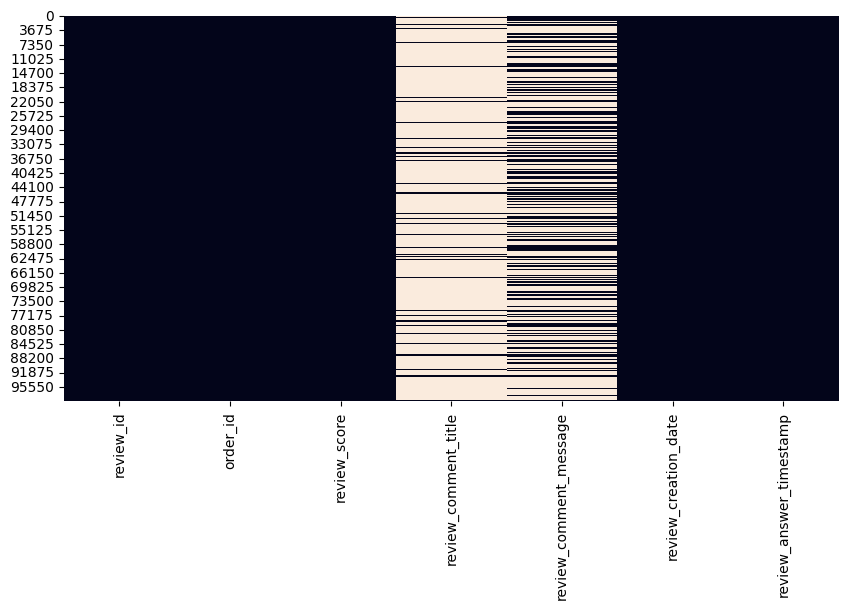

In [329]:
plt.figure(figsize=(10, 5))
sns.heatmap(order_reviews.isna(), cbar=False)
plt.show()


In [330]:
# Remplacement des valeurs manquantes par un texte vide
order_reviews["review_comment_title"].fillna(" ", inplace=True)
order_reviews["review_comment_message"].fillna(" ", inplace=True)

### Dataset : orders

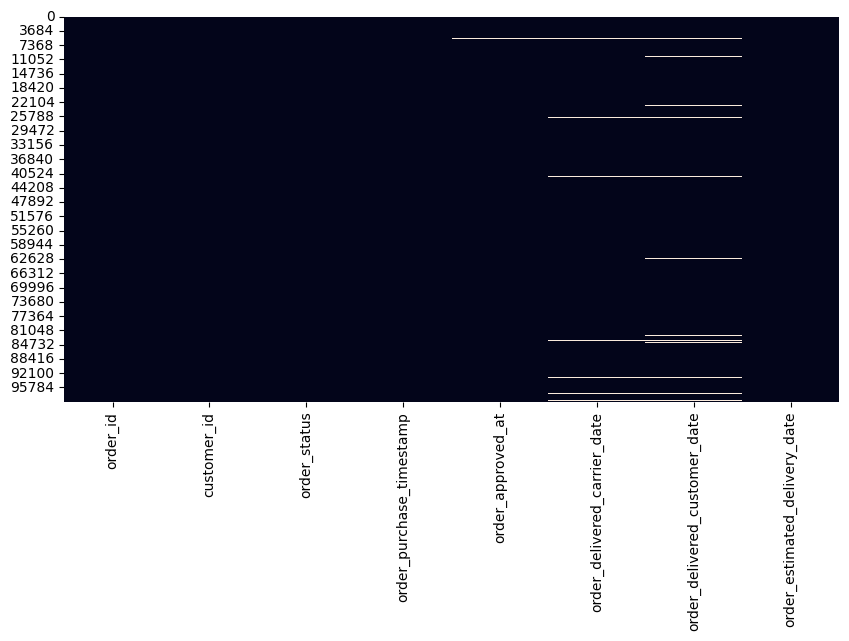

In [331]:
plt.figure(figsize=(10, 5))
sns.heatmap(orders.isna(), cbar=False)
plt.show()

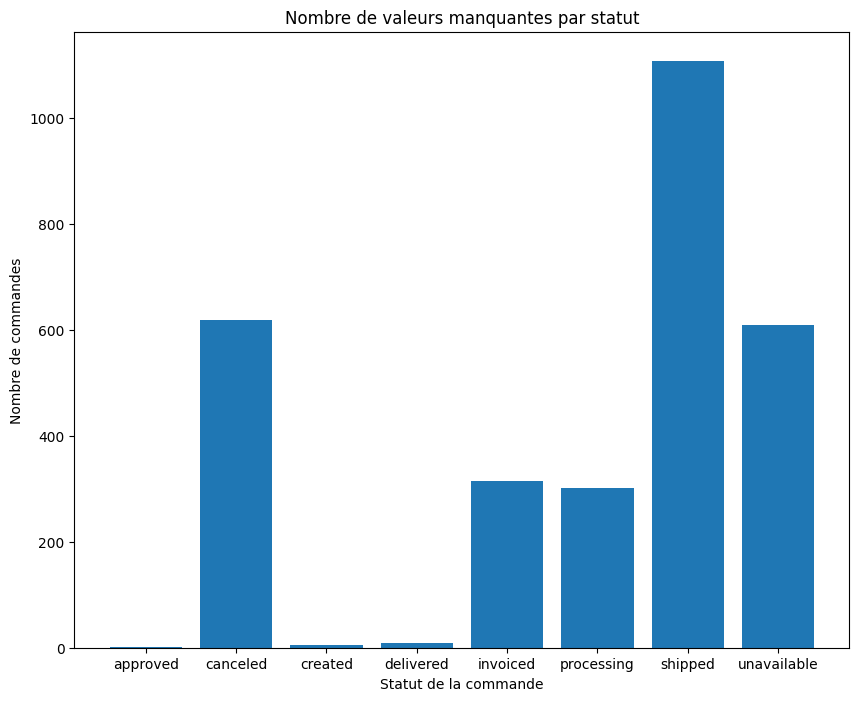

In [332]:
# Check du statut des valeurs manquantes
order_status_counts = orders[orders['order_delivered_customer_date'].isna()==True].groupby(by='order_status').count()["order_id"]
plt.figure(figsize=(10,8))
plt.bar(order_status_counts.index, order_status_counts.values)
plt.xlabel('Statut de la commande')
plt.ylabel('Nombre de commandes')
plt.title('Nombre de valeurs manquantes par statut')

plt.show()

In [333]:
# reformatage des dates au bon format
orders[["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
        "order_delivered_customer_date", "order_estimated_delivery_date"]] = orders[["order_purchase_timestamp", 
        "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", 
        "order_estimated_delivery_date"]].apply(pd.to_datetime)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [334]:
# Il y a quelques dates un peu supectes 
orders[orders['order_delivered_carrier_date'] >orders['order_delivered_customer_date']].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6437,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14
9553,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21
13487,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08
14474,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11
19268,5f9d46795c3126674e52becb3a1a517f,79287bcaafdde5c793b996fc40bb7d9f,delivered,2017-07-18 11:48:20,2017-07-18 12:03:29,2017-07-20 23:03:42,2017-07-20 18:52:41,2017-07-31


In [335]:
orders[orders['order_approved_at'] >orders['order_delivered_customer_date']].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31
483,4df92d82d79c3b52c7138679fa9b07fc,ba0660bf3fffe505ee892e153a2fbd49,delivered,2018-07-24 11:32:11,2018-07-29 23:30:52,2018-07-26 14:46:00,2018-07-27 18:55:57,2018-08-06
1986,6e57e23ecac1ae881286657694444267,2dda54e25d0984e12705c84d4030e6e0,delivered,2018-08-09 17:36:47,2018-08-20 15:55:42,2018-08-14 13:26:00,2018-08-17 16:45:45,2018-09-06
3659,f222c56f035b47dfa1e069a88235d730,b74ca180d63f9ae0443e4e13a2f5bdaf,delivered,2018-01-30 09:43:45,2018-02-04 23:31:47,2018-01-31 19:48:44,2018-02-01 20:10:38,2018-02-15
11738,cf72398d0690f841271b695bbfda82d2,2b7fff075bda701552485ef3f0810257,delivered,2017-09-01 18:45:33,2017-09-13 22:04:39,2017-09-04 20:12:41,2017-09-11 14:15:02,2017-09-21


In [336]:
orders[orders['order_delivered_customer_date'].isna() == True]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [337]:
orders[orders['order_delivered_customer_date'].isna() == False]['order_status'].value_counts()

delivered    96470
canceled         6
Name: order_status, dtype: int64

In [338]:
# Check du traitement
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [339]:
print("Pourcentage de NaN :",round((2965 / orders.shape[0])*100,2))

Pourcentage de NaN : 2.98


In [340]:
# Suppression des NaN dans la colonne order_delivered_customer_date
orders = orders[orders['order_delivered_customer_date'].isna() == False]

In [341]:
orders.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

In [342]:
# Les ordres NaN restants sont des ordres delivered je vais donc imputer
orders[orders['order_approved_at'].isna() == True]['order_status'].value_counts()

delivered    14
Name: order_status, dtype: int64

In [343]:
orders[orders['order_approved_at'].isna() == True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [344]:
ligne5323 = orders[orders['order_approved_at'].isna() == True].head(1)

In [345]:
orders[orders['order_delivered_carrier_date'].isna() == True]['order_status'].value_counts()

delivered    1
Name: order_status, dtype: int64

In [346]:
diff1 =  orders['order_approved_at'] - orders['order_purchase_timestamp']
print(diff1.mean())
diff1 = diff1.mean()

0 days 10:16:39.463218676


In [347]:
diff2 =  orders['order_delivered_carrier_date'] - orders['order_purchase_timestamp']
print(diff2.mean())
diff2 = diff2.mean()

3 days 05:27:56.897144337


In [348]:
 # Imputation des valeurs manquantes par la date d'achat + le délai moyen entre les deux colonnes
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'] + diff1, inplace=True)
orders['order_delivered_carrier_date'].fillna(orders['order_purchase_timestamp'] + diff2, inplace=True)

/tmp/ipykernel_152669/1337010156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_approved_at'].fillna(orders['order_purchase_timestamp'] + diff1, inplace=True)
/tmp/ipykernel_152669/1337010156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_delivered_carrier_date'].fillna(orders['order_purchase_timestamp'] + diff2, inplace=True)


In [349]:
# Check du traitement sur une ligne concernée
# Résultat attendu pour la colonne "order_approved_at"
print(pd.to_datetime('2017-02-18 14:40:00') + diff1)

2017-02-19 00:56:39.463218676


In [350]:
# Avant traitement
ligne5323

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17


In [351]:
# Apres traitement
orders[5171:5172]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-19 00:56:39.463218676,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17


In [352]:
orders[orders['order_purchase_timestamp'] >orders['order_delivered_customer_date']]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


### Dataset : products

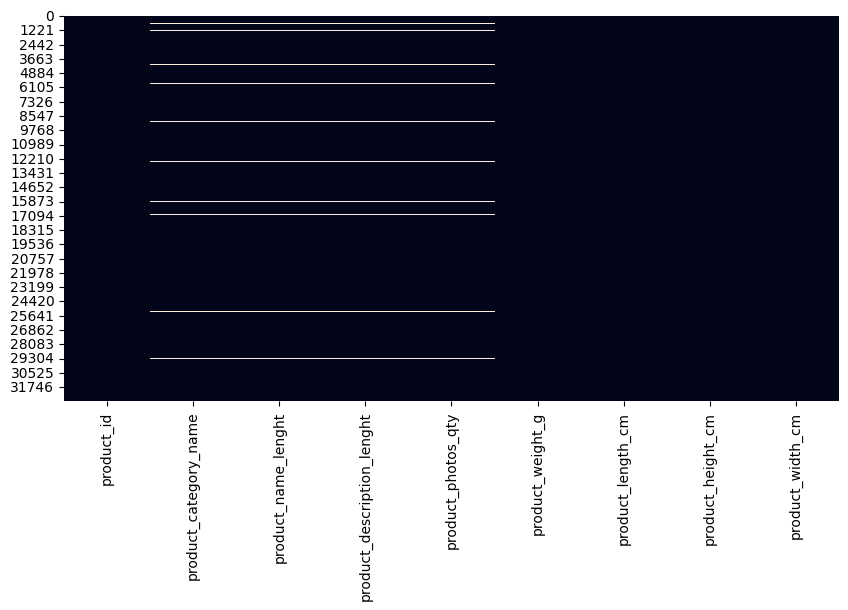

In [353]:
plt.figure(figsize=(10, 5))
sns.heatmap(products.isna(), cbar=False)
plt.show()

In [354]:
# Check des nan autres que sur la description du produit
products[~products["product_category_name"].isna() == True].isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [355]:
products[products["product_weight_g"].isna() == True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
#Supression du produit 18851 car toute les colonnes sont vides
products.drop(18851, inplace=True)

In [357]:
# Imputation du second produit par la médiane 
products["product_height_cm"].fillna(products["product_height_cm"].median(),inplace=True)
products["product_length_cm"].fillna(products["product_length_cm"].median(),inplace=True)
products["product_width_cm"].fillna(products["product_width_cm"].median(),inplace=True)
products["product_weight_g"].fillna(products["product_weight_g"].median(),inplace=True)

In [358]:
# Check du produit
products[8578:8579]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,700.0,25.0,13.0,20.0


In [359]:
products[products["product_category_name"].isna() == True].isna().sum()

product_id                      0
product_category_name         609
product_name_lenght           609
product_description_lenght    609
product_photos_qty            609
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [360]:
products.shape

(32950, 9)

In [361]:
products['product_id'].nunique()

32950

In [362]:
product_nan = products[products["product_category_name"].isna() == True]

In [363]:
product_nan

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [364]:
products.shape

(32950, 9)

In [365]:
products.nunique()

product_id                    32950
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [366]:
# remplacement des nan par inconnu pour les produits sans catégories
products["product_category_name"].fillna("unknown", inplace=True)

In [367]:
# Imputation par la médiane
columns_to_impute = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']

products[columns_to_impute] = products[columns_to_impute].fillna(products[columns_to_impute].median())

In [368]:
# Check de l'imputation
products[products["product_category_name"] == 'unknown']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,unknown,51.0,595.0,1.0,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,unknown,51.0,595.0,1.0,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,unknown,51.0,595.0,1.0,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,unknown,51.0,595.0,1.0,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,unknown,51.0,595.0,1.0,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,unknown,51.0,595.0,1.0,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,unknown,51.0,595.0,1.0,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,unknown,51.0,595.0,1.0,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,unknown,51.0,595.0,1.0,1300.0,45.0,16.0,45.0


In [369]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,48.523581,768.233202,2.167011,2276.424643,30.814901,16.937542,23.196631
std,10.156300,629.667301,1.728077,4281.982558,16.914232,13.637364,12.078877
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


# Doublons

In [370]:
# Check des doublons dans les différents datasets
for dataset, name in zip(dataset_list, dataset_name):
    print(name, " : ", dataset.duplicated().sum())

customers  :  0
geolocalisation  :  261831
order_items  :  0
order_payments  :  0
order_reviews  :  0
orders  :  0
products  :  0
sellers  :  0
translation  :  0


In [371]:
# Suppression des doublons
geolocalisation.drop_duplicates(inplace=True)

In [372]:
geolocalisation.duplicated().sum()

0

# 3) Merge

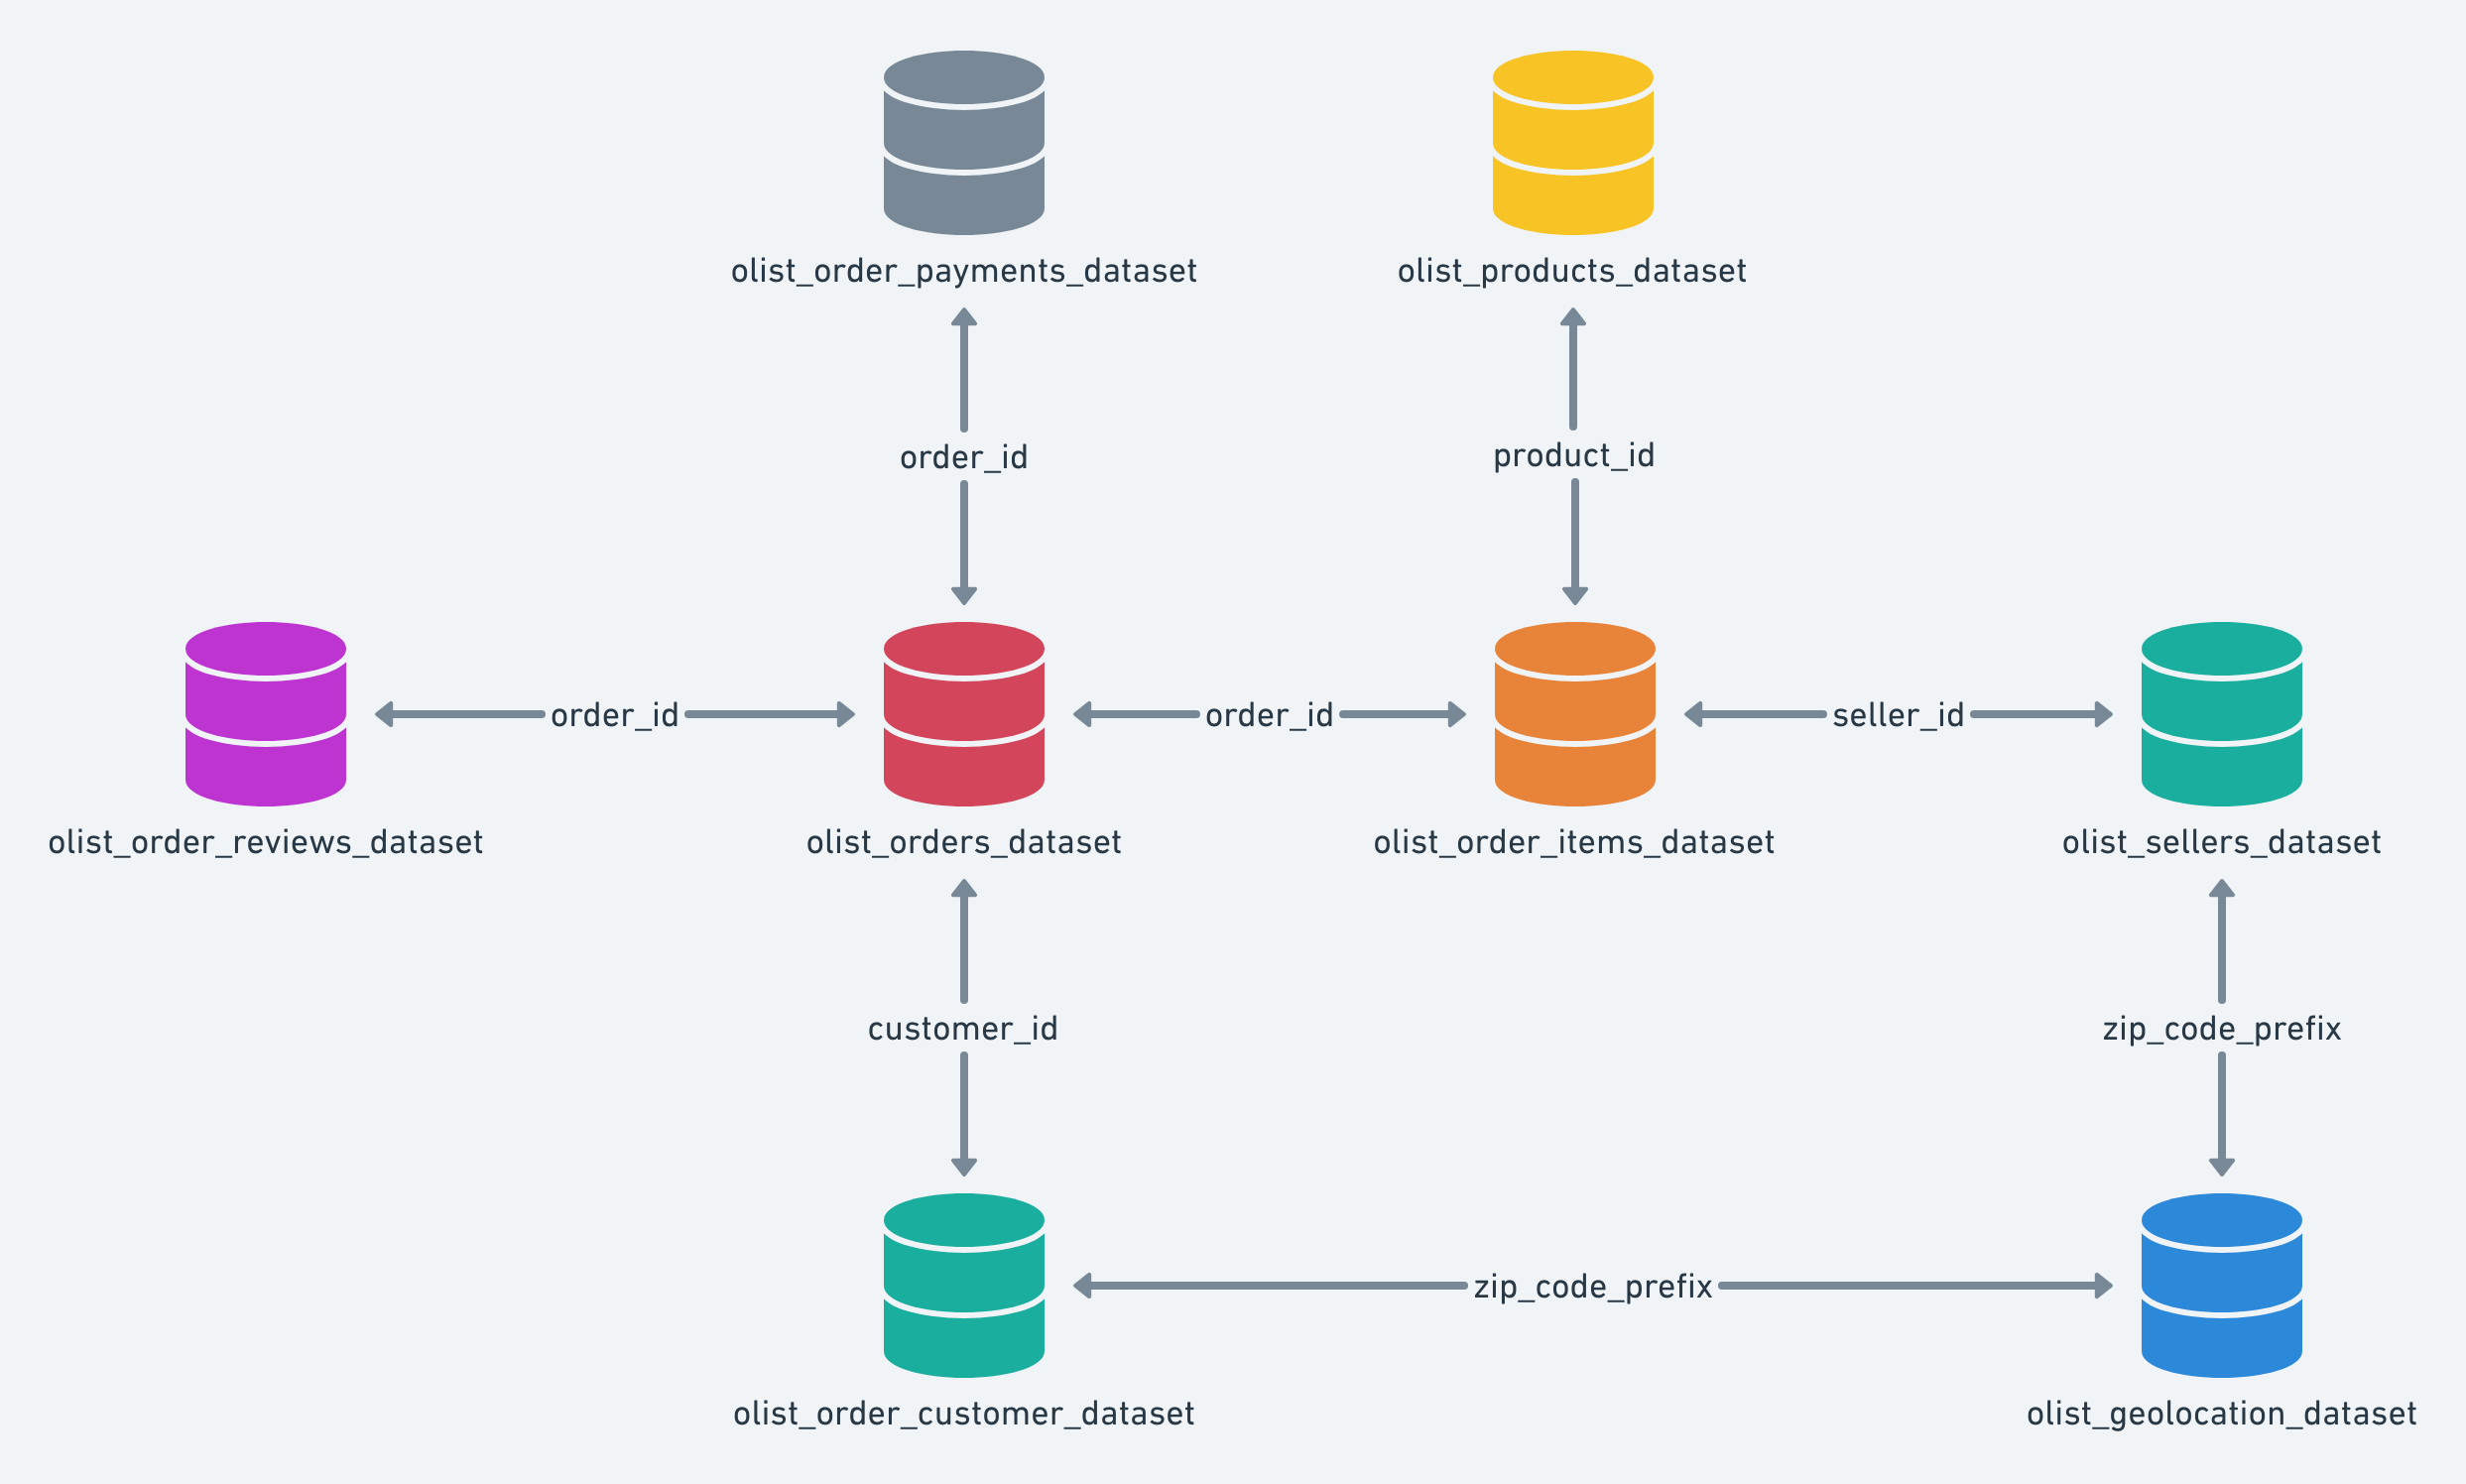

In [373]:
display(image)

### merge entre customers et orders

In [374]:
orders.shape

(96476, 8)

In [375]:
customers.shape

(99441, 5)

In [376]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [377]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [378]:
df = pd.merge(customers,orders, on='customer_id', how='inner')

In [379]:
# Merge parfait entre les deux datasets (aucune ligne perdu)
df.shape

(96476, 12)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96476 entries, 0 to 96475
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96476 non-null  object        
 1   customer_unique_id             96476 non-null  object        
 2   customer_zip_code_prefix       96476 non-null  int64         
 3   customer_city                  96476 non-null  object        
 4   customer_state                 96476 non-null  object        
 5   order_id                       96476 non-null  object        
 6   order_status                   96476 non-null  object        
 7   order_purchase_timestamp       96476 non-null  datetime64[ns]
 8   order_approved_at              96476 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 10  order_delivered_customer_date  96476 non-null  datetime64[ns]
 11  order_estimated

### Merge entre df et order_reviews

In [381]:
# merge left
order_reviews.shape

(99224, 7)

In [382]:
df = pd.merge(df,order_reviews, on='order_id', how='left')

In [383]:
df.shape

(97005, 18)

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97005 entries, 0 to 97004
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    97005 non-null  object        
 1   customer_unique_id             97005 non-null  object        
 2   customer_zip_code_prefix       97005 non-null  int64         
 3   customer_city                  97005 non-null  object        
 4   customer_state                 97005 non-null  object        
 5   order_id                       97005 non-null  object        
 6   order_status                   97005 non-null  object        
 7   order_purchase_timestamp       97005 non-null  datetime64[ns]
 8   order_approved_at              97005 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97005 non-null  datetime64[ns]
 10  order_delivered_customer_date  97005 non-null  datetime64[ns]
 11  order_estimated

In [385]:
df['customer_id'].nunique()

96476

In [386]:
df['order_id'].nunique()

96476

In [387]:
df[df['order_id'].duplicated() == True]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
421,0e772d9e02b17408e716f35cd1dcc222,b09f1bff1aff13c997af071602bc048b,3755,sao paulo,SP,c27cd942c2a926d25153090afa106ceb,delivered,2017-06-15 14:26:01,2017-06-15 14:45:15,2017-06-20 14:22:03,2017-06-26 11:23:32,2017-07-10,0de114480bf17bae6e447ca8dff91d5e,5.0,,,2017-06-27 00:00:00,2017-06-27 19:29:13
504,8d13b315c8e8e3d9011c9e9267cb8a70,63df651d5e8adb6a0e4baeb66a0eea37,16202,birigui,SP,bbf6a647ecc68aa5e79d2cd75ef44c68,delivered,2017-09-01 10:33:16,2017-09-02 10:45:16,2017-09-05 12:33:20,2017-09-13 18:53:49,2017-09-22,38c0403dd24d46978ae5d66045015c20,5.0,,,2017-09-14 00:00:00,2017-09-15 00:29:39
601,52bd992e7e198bdcdd18854c7c2c1667,78c5f76b60a3a2588635aadc70e34df7,38442,araguari,MG,b45d11b61c2a68756bbbd7665d67e812,delivered,2017-10-11 21:55:04,2017-10-13 15:56:25,2017-10-17 14:12:48,2017-10-19 19:18:47,2017-11-03,b4dffda6cbf1a5a615b2a8f146bdbddd,5.0,,,2017-10-20 00:00:00,2017-10-20 22:46:35
647,102fc0966044243157bb81e4ee0a251e,00cc12a6d8b578b8ebd21ea4e2ae8b27,3178,sao paulo,SP,d61b915b69851aec8a8865f36cfd793e,delivered,2017-03-21 19:25:23,2017-03-21 19:25:23,2017-03-23 16:00:01,2017-03-28 14:54:11,2017-04-07,59168ad031faf4d695bd0b532c8dc8c9,3.0,,,2017-03-29 00:00:00,2017-04-01 00:59:52
705,aaad67429ea7d339bdf5f71ae3ef74f6,13613cae6e3bfea8327a916246c96cc9,5108,sao paulo,SP,0176a6846bcb3b0d3aa3116a9a768597,delivered,2017-12-25 10:40:52,2017-12-27 04:32:07,2017-12-28 19:57:15,2017-12-29 21:22:35,2018-01-15,d8e8c42271c8fb67b9dad95d98c8ff80,5.0,,,2017-12-30 00:00:00,2018-01-02 10:54:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95704,91c72356a1fc125b59e0da51ec66bd74,ba77e9b6506636dcbd03e463d4786f24,95059,caxias do sul,RS,142b0e3de54c110a3109b26c79d6ec2e,delivered,2017-07-02 20:47:23,2017-07-02 21:03:54,2017-07-05 09:51:43,2017-07-11 17:44:52,2017-08-01,961c0cd56f464536b821fd6f60da4463,5.0,,,2017-07-12 00:00:00,2017-07-12 23:08:45
96149,c2e64d930487075593367a1ea29645aa,cc14ea7099959d91a17c9d7c3a46721d,29903,linhares,ES,e1f693a7777b9f6ff730a9d2b45a56cb,delivered,2017-05-12 10:28:31,2017-05-12 10:42:46,2017-05-16 08:53:34,2017-05-26 14:04:40,2017-06-06,bdc75c2855c909171095e470910d0421,5.0,,,2017-06-07 00:00:00,2017-06-07 10:17:30
96578,294741bfaf620181357e0e7306681698,5ffbc70da7ad1808b6899421caa84fbe,50670,recife,PE,677cebcf344bca22b07250e7548bd8bc,delivered,2017-05-01 18:11:52,2017-05-01 18:26:01,2017-05-05 12:32:57,2017-05-23 15:22:26,2017-06-12,917a4b765108017eaac1d80971e8f1b7,4.0,,,2017-05-24 00:00:00,2017-05-25 08:48:42
96831,ff09fd7b29e7488a8d8a20badcd8befe,8c21dd8c37144807c601f99f2a209dfb,72587,brasilia,DF,157de1652c032429a625d034be79eeeb,delivered,2017-05-10 09:00:07,2017-05-10 09:10:18,2017-05-15 10:06:54,2017-05-22 16:47:57,2017-06-01,85089552b825fd51a0692a1fc8b47b2e,5.0,,,2017-05-23 00:00:00,2017-05-26 09:55:54


In [388]:
# Certains ordres ont plusieurs reviews ce qui explique l'augmentation de la shape
df[df['order_id'] == "f9c78e6e58306dc81efbbada1ac11f24"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
96885,4740044a9390cc45b2c213e8714129e7,08f7cf00ed9ff3e0a08fc136ec272974,71900,brasilia,DF,f9c78e6e58306dc81efbbada1ac11f24,delivered,2017-09-01 22:26:18,2017-09-02 22:23:53,2017-09-05 12:08:46,2017-09-13 19:07:33,2017-09-21,3c95105686e2ae71e8fd94b6483eba79,2.0,,"comprei 4 cubas ao mesmo tempo, fui cobrada pe...",2017-09-19 00:00:00,2017-09-22 15:23:29
96886,4740044a9390cc45b2c213e8714129e7,08f7cf00ed9ff3e0a08fc136ec272974,71900,brasilia,DF,f9c78e6e58306dc81efbbada1ac11f24,delivered,2017-09-01 22:26:18,2017-09-02 22:23:53,2017-09-05 12:08:46,2017-09-13 19:07:33,2017-09-21,95a3135743556b117d888cc8c6e12e11,3.0,,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08


In [389]:
df.shape

(97005, 18)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97005 entries, 0 to 97004
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    97005 non-null  object        
 1   customer_unique_id             97005 non-null  object        
 2   customer_zip_code_prefix       97005 non-null  int64         
 3   customer_city                  97005 non-null  object        
 4   customer_state                 97005 non-null  object        
 5   order_id                       97005 non-null  object        
 6   order_status                   97005 non-null  object        
 7   order_purchase_timestamp       97005 non-null  datetime64[ns]
 8   order_approved_at              97005 non-null  datetime64[ns]
 9   order_delivered_carrier_date   97005 non-null  datetime64[ns]
 10  order_delivered_customer_date  97005 non-null  datetime64[ns]
 11  order_estimated

### Merge entre df et order_payments

In [391]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [392]:
order_payments.shape

(103886, 5)

In [393]:
df = pd.merge(df,order_payments, on='order_id', how='left')

In [394]:
df.shape

(101324, 22)

In [395]:
order_payments['order_id']

0         b81ef226f3fe1789b1e8b2acac839d17
1         a9810da82917af2d9aefd1278f1dcfa0
2         25e8ea4e93396b6fa0d3dd708e76c1bd
3         ba78997921bbcdc1373bb41e913ab953
4         42fdf880ba16b47b59251dd489d4441a
                        ...               
103881    0406037ad97740d563a178ecc7a2075c
103882    7b905861d7c825891d6347454ea7863f
103883    32609bbb3dd69b3c066a6860554a77bf
103884    b8b61059626efa996a60be9bb9320e10
103885    28bbae6599b09d39ca406b747b6632b1
Name: order_id, Length: 103886, dtype: object

In [396]:
order_payments['order_id'].nunique()

99440

In [397]:
df[df['order_id'].duplicated() == True]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
19,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,67.98
36,469634941c27cd844170935a3cf60b95,ef07ba9aa5226f77264ffa5762b2280b,81750,curitiba,PR,a9119eb77d6200811953803a7b6539e1,delivered,2018-03-12 13:07:03,2018-03-12 13:15:28,2018-03-13 22:12:18,...,cd061bfa6e03dfb627117779e74ad9ad,5.0,,,2018-03-23 00:00:00,2018-03-26 16:23:27,1.0,credit_card,1.0,0.81
55,8247b5583327ab8be19f96e1fb82f77b,d85547cd859833520b311b4458a14c1c,23970,parati,RJ,a6917b5d71e0e9bc434e9228db8daeb2,delivered,2017-06-09 15:46:17,2017-06-10 15:42:38,2017-06-12 17:10:55,...,e4d4b6477ff4777b725e5d5682fa785d,1.0,,Me mandaram um o relógio que não funciona.. Vo...,2017-06-22 00:00:00,2017-06-23 00:32:44,1.0,voucher,1.0,309.98
67,a02f66c3af7b16eec19ddcd98b645fe3,b3548d0cec408ae13d143bb4eeebaa6c,13323,salto,SP,db97652cf517d2cd03db63dec489ca62,delivered,2017-10-01 08:57:03,2017-10-01 09:14:07,2017-10-02 19:32:57,...,5b550e0fa07184adf527dd78a718803e,3.0,,"Recebi o produto, porém está faltando o nano.....",2017-10-04 00:00:00,2017-10-04 17:50:49,3.0,voucher,1.0,7.15
68,a02f66c3af7b16eec19ddcd98b645fe3,b3548d0cec408ae13d143bb4eeebaa6c,13323,salto,SP,db97652cf517d2cd03db63dec489ca62,delivered,2017-10-01 08:57:03,2017-10-01 09:14:07,2017-10-02 19:32:57,...,5b550e0fa07184adf527dd78a718803e,3.0,,"Recebi o produto, porém está faltando o nano.....",2017-10-04 00:00:00,2017-10-04 17:50:49,1.0,voucher,1.0,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101297,30c96385d694acb8aa2dc0df1770120b,b96d6a178adbabf269fd843b37327798,26112,belford roxo,RJ,357b4b724bbf34f1d64b1c5dfdc88120,delivered,2018-01-24 02:22:12,2018-01-24 15:57:52,2018-01-26 21:28:37,...,85022c2e590344447d0c852ca92802e3,5.0,,Recomendo,2018-02-08 00:00:00,2018-02-10 20:07:29,2.0,voucher,1.0,1.51
101306,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,...,75dcc8635930dd09103505944e12451a,4.0,,Gostei do produto,2017-12-05 00:00:00,2017-12-06 01:09:31,3.0,voucher,1.0,1.78
101307,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,...,75dcc8635930dd09103505944e12451a,4.0,,Gostei do produto,2017-12-05 00:00:00,2017-12-06 01:09:31,1.0,voucher,1.0,20.00
101311,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,...,603f2873842a6975a43c54d305397d69,1.0,,,2017-12-14 00:00:00,2017-12-16 13:50:11,2.0,credit_card,1.0,32.13


In [398]:
# un client peut payer une commande avec plus d'un mode de paiement
df[df['order_id'] == "17825f24877a9289214c301ae0c9424b"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,voucher,1.0,34.05
19,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,67.98


In [399]:
# payment_sequential indique le nombre de payement utilisé de façon ordonnée
df[df['order_id'] == "e86b1b2dd48839d7351406434afb578d"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
101305,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,...,75dcc8635930dd09103505944e12451a,4.0,,Gostei do produto,2017-12-05 00:00:00,2017-12-06 01:09:31,2.0,voucher,1.0,10.60
101306,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,...,75dcc8635930dd09103505944e12451a,4.0,,Gostei do produto,2017-12-05 00:00:00,2017-12-06 01:09:31,3.0,voucher,1.0,1.78
101307,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,...,75dcc8635930dd09103505944e12451a,4.0,,Gostei do produto,2017-12-05 00:00:00,2017-12-06 01:09:31,1.0,voucher,1.0,20.00


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101324 entries, 0 to 101323
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    101324 non-null  object        
 1   customer_unique_id             101324 non-null  object        
 2   customer_zip_code_prefix       101324 non-null  int64         
 3   customer_city                  101324 non-null  object        
 4   customer_state                 101324 non-null  object        
 5   order_id                       101324 non-null  object        
 6   order_status                   101324 non-null  object        
 7   order_purchase_timestamp       101324 non-null  datetime64[ns]
 8   order_approved_at              101324 non-null  datetime64[ns]
 9   order_delivered_carrier_date   101324 non-null  datetime64[ns]
 10  order_delivered_customer_date  101324 non-null  datetime64[ns]
 11  

### Merge entre df et order_items

In [401]:
order_items.shape

(112650, 7)

In [402]:
df.shape

(101324, 22)

In [403]:
df = pd.merge(df,order_items, on='order_id', how='left')

In [404]:
df[df['order_id'].duplicated() == True]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
19,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,...,1.0,credit_card,1.0,67.98,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-05-19 11:55:16,89.90,12.13
23,690172ab319622688d3b4df42f676898,a96d5cfa0d3181817e2b946f921ea021,74914,aparecida de goiania,GO,aaff8afa47c8426e414a6d908a97713c,delivered,2017-10-15 11:08:48,2017-10-15 11:25:49,2017-10-16 21:36:29,...,1.0,credit_card,2.0,232.71,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2017-10-19 11:25:49,59.90,17.67
24,690172ab319622688d3b4df42f676898,a96d5cfa0d3181817e2b946f921ea021,74914,aparecida de goiania,GO,aaff8afa47c8426e414a6d908a97713c,delivered,2017-10-15 11:08:48,2017-10-15 11:25:49,2017-10-16 21:36:29,...,1.0,credit_card,2.0,232.71,3,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2017-10-19 11:25:49,59.90,17.67
37,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ,77b062be7c5bd21712905feb8e1cfeed,delivered,2017-06-14 18:31:54,2017-06-15 18:43:04,2017-06-22 08:11:38,...,1.0,credit_card,8.0,134.25,2,17606c7d7254ed1f0351fd48a28be932,1900267e848ceeba8fa32d80c1a5f5a8,2017-06-21 18:43:04,44.99,16.14
39,469634941c27cd844170935a3cf60b95,ef07ba9aa5226f77264ffa5762b2280b,81750,curitiba,PR,a9119eb77d6200811953803a7b6539e1,delivered,2018-03-12 13:07:03,2018-03-12 13:15:28,2018-03-13 22:12:18,...,1.0,credit_card,1.0,0.81,1,aa280035c50ba62c746480a59045eec4,fa40cc5b934574b62717c68f3d678b6d,2018-03-16 13:15:28,30.50,15.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115695,30c96385d694acb8aa2dc0df1770120b,b96d6a178adbabf269fd843b37327798,26112,belford roxo,RJ,357b4b724bbf34f1d64b1c5dfdc88120,delivered,2018-01-24 02:22:12,2018-01-24 15:57:52,2018-01-26 21:28:37,...,2.0,voucher,1.0,1.51,2,bdc3291ab242ec1effc8eb0987850268,dbd66278cbfe1aa1000f90a217ca4695,2018-01-30 15:57:52,29.90,14.10
115704,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,...,3.0,voucher,1.0,1.78,1,5d66715cc928aadd0074f61332698593,128639473a139ac0f3e5f5ade55873a5,2017-11-30 02:31:41,19.90,12.48
115705,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,...,1.0,voucher,1.0,20.00,1,5d66715cc928aadd0074f61332698593,128639473a139ac0f3e5f5ade55873a5,2017-11-30 02:31:41,19.90,12.48
115709,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,...,2.0,credit_card,1.0,32.13,1,c98bf47f7bea8f3aee82fa023786b8a1,51a04a8a6bdcb23deccc82b0b80742cf,2017-11-24 12:15:25,167.99,31.93


In [405]:
# un ordre peut contenir plusieurs produits
df[df['order_id']=="77b062be7c5bd21712905feb8e1cfeed"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
36,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ,77b062be7c5bd21712905feb8e1cfeed,delivered,2017-06-14 18:31:54,2017-06-15 18:43:04,2017-06-22 08:11:38,...,1.0,credit_card,8.0,134.25,1,6421588f55f75de28cb3357e07723d14,1900267e848ceeba8fa32d80c1a5f5a8,2017-06-21 18:43:04,56.99,16.13
37,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ,77b062be7c5bd21712905feb8e1cfeed,delivered,2017-06-14 18:31:54,2017-06-15 18:43:04,2017-06-22 08:11:38,...,1.0,credit_card,8.0,134.25,2,17606c7d7254ed1f0351fd48a28be932,1900267e848ceeba8fa32d80c1a5f5a8,2017-06-21 18:43:04,44.99,16.14


In [406]:
# La somme du prix + les frais corrsepond bien au montant du produit
56.99 + 44.99 + 16.13 + 16.14

134.25

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115722 entries, 0 to 115721
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115722 non-null  object        
 1   customer_unique_id             115722 non-null  object        
 2   customer_zip_code_prefix       115722 non-null  int64         
 3   customer_city                  115722 non-null  object        
 4   customer_state                 115722 non-null  object        
 5   order_id                       115722 non-null  object        
 6   order_status                   115722 non-null  object        
 7   order_purchase_timestamp       115722 non-null  datetime64[ns]
 8   order_approved_at              115722 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115722 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

### merge entre df et products

In [408]:
df.shape

(115722, 28)

In [409]:
products.shape

(32950, 9)

In [410]:
df = pd.merge(df,products, on='product_id', how='left')

In [411]:
df.shape

(115722, 36)

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115722 entries, 0 to 115721
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115722 non-null  object        
 1   customer_unique_id             115722 non-null  object        
 2   customer_zip_code_prefix       115722 non-null  int64         
 3   customer_city                  115722 non-null  object        
 4   customer_state                 115722 non-null  object        
 5   order_id                       115722 non-null  object        
 6   order_status                   115722 non-null  object        
 7   order_purchase_timestamp       115722 non-null  datetime64[ns]
 8   order_approved_at              115722 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115722 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

### merge entre df et sellers

In [413]:
sellers.shape

(3095, 4)

In [414]:
df = pd.merge(df,sellers, on='seller_id', how='left')

In [415]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115717,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,51.0,489.0,2.0,611.0,22.0,22.0,23.0,17400,garca,SP
115718,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,14802,araraquara,SP
115719,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,60.0,575.0,1.0,870.0,25.0,20.0,18.0,3304,sao paulo,SP
115720,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,59.0,452.0,1.0,710.0,19.0,13.0,14.0,14840,guariba,SP


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115722 entries, 0 to 115721
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115722 non-null  object        
 1   customer_unique_id             115722 non-null  object        
 2   customer_zip_code_prefix       115722 non-null  int64         
 3   customer_city                  115722 non-null  object        
 4   customer_state                 115722 non-null  object        
 5   order_id                       115722 non-null  object        
 6   order_status                   115722 non-null  object        
 7   order_purchase_timestamp       115722 non-null  datetime64[ns]
 8   order_approved_at              115722 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115722 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

### merge entre df et geolocalisation

In [417]:
geolocalisation.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'},inplace=True)

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115722 entries, 0 to 115721
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115722 non-null  object        
 1   customer_unique_id             115722 non-null  object        
 2   customer_zip_code_prefix       115722 non-null  int64         
 3   customer_city                  115722 non-null  object        
 4   customer_state                 115722 non-null  object        
 5   order_id                       115722 non-null  object        
 6   order_status                   115722 non-null  object        
 7   order_purchase_timestamp       115722 non-null  datetime64[ns]
 8   order_approved_at              115722 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115722 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [419]:
# Différentes coordonnées pour chaque zipcode :
geolocalisation[geolocalisation['zip_code_prefix'] == 1037 ].head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
31,1037,-23.546705,-46.640336,são paulo,SP
169,1037,-23.543883,-46.638075,são paulo,SP
178,1037,-23.546157,-46.639885,sao paulo,SP


In [420]:
# Remplacement par la moyenne
geolocalisation['geolocation_lat_mean'] = geolocalisation.groupby(by='zip_code_prefix')['geolocation_lat'].transform('mean')
geolocalisation['geolocation_lng_mean'] = geolocalisation.groupby(by='zip_code_prefix')['geolocation_lng'].transform('mean')

In [421]:
geolocalisation.drop(columns=['geolocation_lat', 'geolocation_lng','geolocation_state','geolocation_city'],inplace=True)

In [422]:
# Check
geolocalisation.drop_duplicates(inplace=True)
geolocalisation[geolocalisation['zip_code_prefix'] == 1037 ]

,zip_code_prefix,geolocation_lat_mean,geolocation_lng_mean
0,1037,-23.545335,-46.638995


In [423]:
geolocalisation.shape

(19015, 3)

In [424]:
geolocalisation['zip_code_prefix'].nunique()

19015

In [425]:
df.shape

(115722, 39)

In [426]:
# pour les fournisseurs
df = pd.merge(df,geolocalisation,     left_on='seller_zip_code_prefix',
    right_on='zip_code_prefix', how='left')

In [427]:
df.shape

(115722, 42)

In [428]:
df.rename(columns={
    "geolocation_lat_mean": "seller_estim_lat",
    "geolocation_lng_mean": "seller_estim_lng"},inplace=True)

df.drop(columns=['zip_code_prefix'],inplace=True)

In [429]:
df.shape

(115722, 41)

In [430]:
# pour les clients
df = pd.merge(df,geolocalisation,     left_on='customer_zip_code_prefix',
    right_on='zip_code_prefix', how='left')

In [431]:
df.shape

(115722, 44)

In [432]:
df.rename(columns={
    "geolocation_lat_mean": "customer_estim_lat",
    "geolocation_lng_mean": "customer_estim_lng"},inplace=True)

df.drop(columns=['zip_code_prefix'],inplace=True)

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115722 entries, 0 to 115721
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115722 non-null  object        
 1   customer_unique_id             115722 non-null  object        
 2   customer_zip_code_prefix       115722 non-null  int64         
 3   customer_city                  115722 non-null  object        
 4   customer_state                 115722 non-null  object        
 5   order_id                       115722 non-null  object        
 6   order_status                   115722 non-null  object        
 7   order_purchase_timestamp       115722 non-null  datetime64[ns]
 8   order_approved_at              115722 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115722 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

### Merge avec translation

In [434]:
df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_estim_lat,seller_estim_lng,customer_estim_lat,customer_estim_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,-23.486138,-46.367107,-20.499273,-47.396658
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,89.0,15.0,40.0,88303,itajai,SC,-26.912506,-48.674090,-23.728396,-46.542250


In [435]:
df.shape

(115722, 43)

In [436]:
df = pd.merge(df,translation, on='product_category_name', how='left')

In [437]:
df.drop(columns='product_category_name',inplace=True)

In [438]:
df.rename(columns={'product_category_name_english' : 'product_category_name'},inplace=True)

In [439]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 115722 │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 43     │ │ float64     │ 17    │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 5     │                                                          │
│                                │ int64       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %     ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ customer_zip_code_pr     │    0 │        0 │  35000 │  30000 │  1000 │  11000 │  59000 │  100000 │ █▄▂▁▂▃  │  │
│ │ review_score             │  860 │     0.74 │    4.1 │    1.3 │     1 │      4 │      5 │       5 │ ▂  ▁▃█  │  │
│ │ payment_sequential       │    3 │   0.0026 │    1.1 │   0.69 │     1 │      1 │      1 │      26 │    █    │  │
│ │ payment_installments     │    3 │   0.0026 │    2.9 │    2.8 │     0 │      1 │      4 │      24 │   █▂▁   │  │
│ │ payment_value            │    3 │   0.0026 │    170 │    270 │     0 │     61 │    190 │   14000 │    █    │  │
│ │ order_item_id            │    0 │        0 │    1.2 │    0.7 │     1 │      1 │      1 │      21 │    █    │  │
│ │ price                    │    0 │        0 │    120 │    180 │  0.85 │     40 │    130 │    6700 │    █    │  │
│ │ freight_value            │    0 │        0 │     20 │     16 │     0 │     13 │     21 │     410 │    █    │  │
│ │ product_name_lenght      │   19 │    0.016 │     49 │    9.9 │     5 │     43 │     57 │      76 │   ▁▃▆█  │  │
│ │ product_description_     │   19 │    0.016 │    780 │    650 │     4 │    350 │    980 │    4000 │   █▄▁   │  │
│ │ product_photos_qty       │   19 │    0.016 │    2.2 │    1.7 │     1 │      1 │      3 │      20 │   █▁    │  │
│ │ product_weight_g         │   19 │    0.016 │   2100 │   3800 │     0 │    300 │   1800 │   40000 │   █▁    │  │
│ │ product_length_cm        │   19 │    0.016 │     30 │     16 │     7 │     18 │     38 │     100 │  █▅▃▁   │  │
│ │ product_height_cm        │   19 │    0.016 │     17 │     13 │     2 │      8 │     20 │     100 │   █▃    │  │
│ │ product_width_cm         │   19 │    0.016 │     23 │     12 │     6 │     15 │     30 │     120 │   █▄▁   │  │
│ │ seller_zip_code_pref     │    0 │        0 │  24000 │  28000 │  1000 │   6400 │  28000 │  100000 │ █▁▁ ▁▁  │  │
│ │ seller_estim_lat         │  260 │     0.23 │    -23 │    2.7 │   -32 │    -24 │    -22 │    -2.5 │    █▃   │  │
│ │ seller_estim_lng         │  260 │     0.23 │    -47 │    2.3 │   -64 │    -49 │    -47 │     -35 │    ▁█▁  │  │
│ │ customer_estim_lat       │  300 │     0.26 │    -21 │    5.6 │   -34 │    -24 │    -20 │      42 │   █▃▁   │  │
│ │ customer_estim_lng       │  300 │     0.26 │    -46 │      4 │   -73 │    -48 │    -44 │    -8.7 │   ▁█▁   │  │
│ └──────────────────────────┴──────┴──────────┴────────

In [440]:
# Le % de lignes contenant des NaN représente ~1% de la donnée ont peut donc ce permettre de les supprimés
df = df.dropna()

In [441]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 112653 │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 43     │ │ float64     │ 17    │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 5     │                                                          │
│                                │ int64       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ customer_zip_code_pr      │   0 │      0 │   35000 │   30000 │  1000 │  11000 │  58000 │  100000 │ █▄▂▁▂▃  │  │
│ │ review_score              │   0 │      0 │     4.1 │     1.3 │     1 │      4 │      5 │       5 │ ▂  ▁▃█  │  │
│ │ payment_sequential        │   0 │      0 │     1.1 │    0.69 │     1 │      1 │      1 │      26 │    █    │  │
│ │ payment_installments      │   0 │      0 │     2.9 │     2.8 │     0 │      1 │      4 │      24 │   █▂▁   │  │
│ │ payment_value             │   0 │      0 │     170 │     260 │     0 │     61 │    190 │   14000 │    █    │  │
│ │ order_item_id             │   0 │      0 │     1.2 │    0.69 │     1 │      1 │      1 │      21 │    █    │  │
│ │ price                     │   0 │      0 │     120 │     180 │  0.85 │     40 │    130 │    6700 │    █    │  │
│ │ freight_value             │   0 │      0 │      20 │      16 │     0 │     13 │     21 │     410 │    █    │  │
│ │ product_name_lenght       │   0 │      0 │      49 │      10 │     5 │     42 │     57 │      76 │   ▁▃▆█  │  │
│ │ product_description_      │   0 │      0 │     780 │     650 │     4 │    340 │    980 │    4000 │   █▄▁   │  │
│ │ product_photos_qty        │   0 │      0 │     2.2 │     1.7 │     1 │      1 │      3 │      20 │   █▁    │  │
│ │ product_weight_g          │   0 │      0 │    2100 │    3800 │     0 │    300 │   1800 │   40000 │   █▁    │  │
│ │ product_length_cm         │   0 │      0 │      30 │      16 │     7 │     18 │     38 │     100 │  █▅▃▁   │  │
│ │ product_height_cm         │   0 │      0 │      17 │      13 │     2 │      8 │     20 │     100 │   █▃    │  │
│ │ product_width_cm          │   0 │      0 │      23 │      12 │     6 │     15 │     30 │     120 │   █▄▁   │  │
│ │ seller_zip_code_pref      │   0 │      0 │   25000 │   28000 │  1000 │   6400 │  28000 │  100000 │ █▁▁ ▁▁  │  │
│ │ seller_estim_lat          │   0 │      0 │     -23 │     2.7 │   -32 │    -24 │    -22 │    -2.5 │    █▃   │  │
│ │ seller_estim_lng          │   0 │      0 │     -47 │     2.3 │   -64 │    -49 │    -47 │     -35 │    ▁█▁  │  │
│ │ customer_estim_lat        │   0 │      0 │     -21 │     5.6 │   -34 │    -24 │    -20 │      42 │   █▃▁   │  │
│ │ customer_estim_lng        │   0 │      0 │     -46 │       4 │   -73 │    -48 │    -44 │    -8.7 │   ▁█▁   │  │
│ └───────────────────────────┴─────┴────────┴─────────┴

## 4) Analyse de marché : 

### A) Order

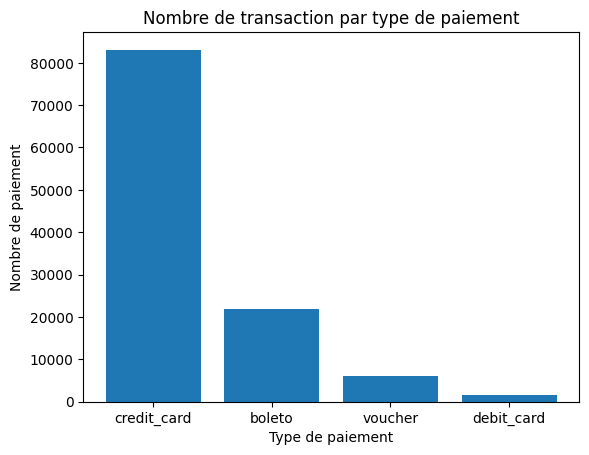

In [442]:
result_counts = df['payment_type'].value_counts()


plt.bar(result_counts.index, result_counts.values)


plt.xlabel('Type de paiement')
plt.ylabel('Nombre de paiement')

plt.title('Nombre de transaction par type de paiement')

plt.show()

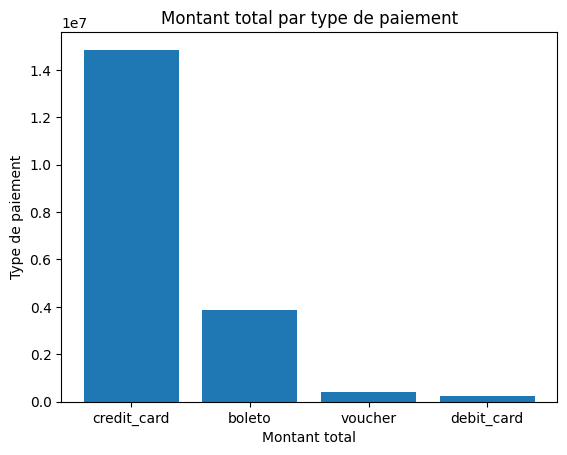

In [443]:
# Calculer le montant total par type de paiement
payment_total = df.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)

plt.bar(payment_total.index, payment_total.values)

plt.xlabel('Montant total')
plt.ylabel('Type de paiement')

plt.title('Montant total par type de paiement')

plt.show()

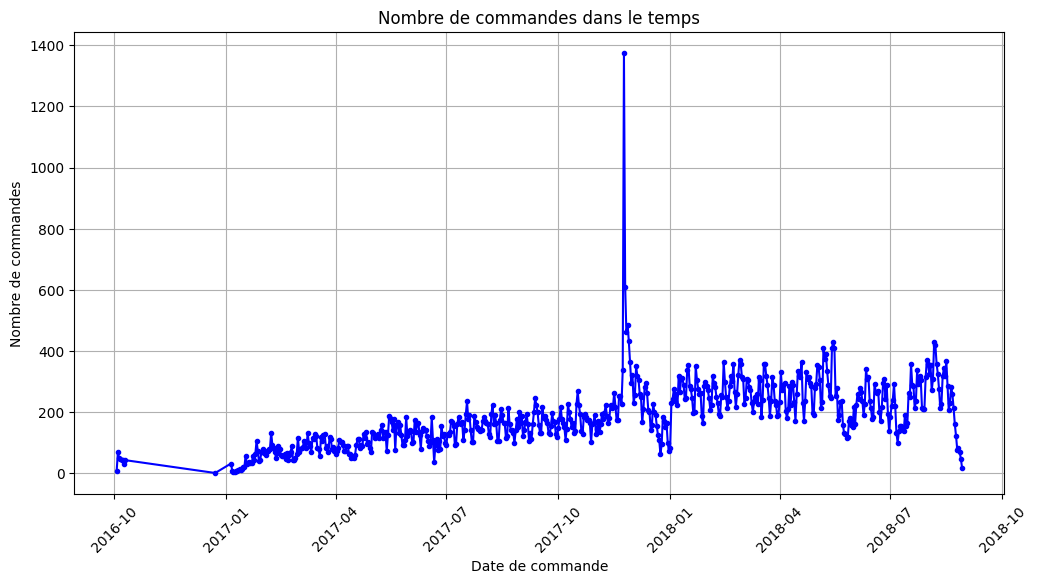

In [444]:
orders_by_date = df.groupby(df['order_purchase_timestamp'].dt.date)['order_id'].count()

# Créer le graphique
plt.figure(figsize=(12, 6))
plt.plot(orders_by_date.index, orders_by_date.values, marker='.', linestyle='-', color='b')
plt.xlabel('Date de commande')
plt.ylabel('Nombre de commandes')
plt.title('Nombre de commandes dans le temps')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [445]:
# Black friday
df[(df['order_purchase_timestamp'] >= '2017-11-24') & (df['order_purchase_timestamp'] <= '2017-11-25')]['product_category_name'].value_counts()

bed_bath_table                             202
furniture_decor                            139
garden_tools                               108
sports_leisure                              92
health_beauty                               89
telephony                                   80
computers_accessories                       75
toys                                        72
watches_gifts                               71
perfumery                                   65
housewares                                  61
auto                                        47
fashion_bags_accessories                    45
cool_stuff                                  30
consoles_games                              29
baby                                        24
electronics                                 17
stationery                                  17
pet_shop                                    10
home_confort                                 9
home_construction                            9
musical_instr

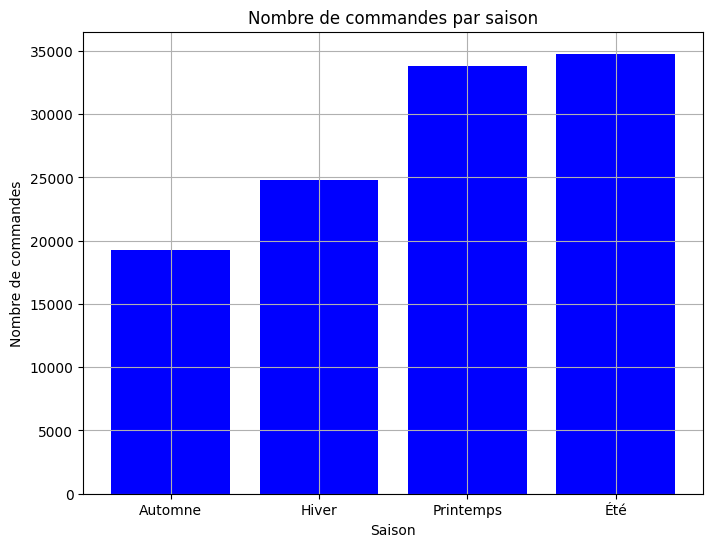

In [446]:
df['season'] = df['order_purchase_timestamp'].dt.month % 12 // 3 + 1

# Mapper les valeurs numériques des saisons à leurs noms correspondants
season_names = {1: 'Hiver', 2: 'Printemps', 3: 'Été', 4: 'Automne'}
df['season'] = df['season'].map(season_names)

# Compter le nombre de commandes par saison
orders_by_season = df.groupby('season')['order_id'].count()

# Créer le graphique
plt.figure(figsize=(8, 6))
plt.bar(orders_by_season.index, orders_by_season.values, color='b')
plt.xlabel('Saison')
plt.ylabel('Nombre de commandes')
plt.title('Nombre de commandes par saison')
plt.grid(True)
plt.show()

### B) Product

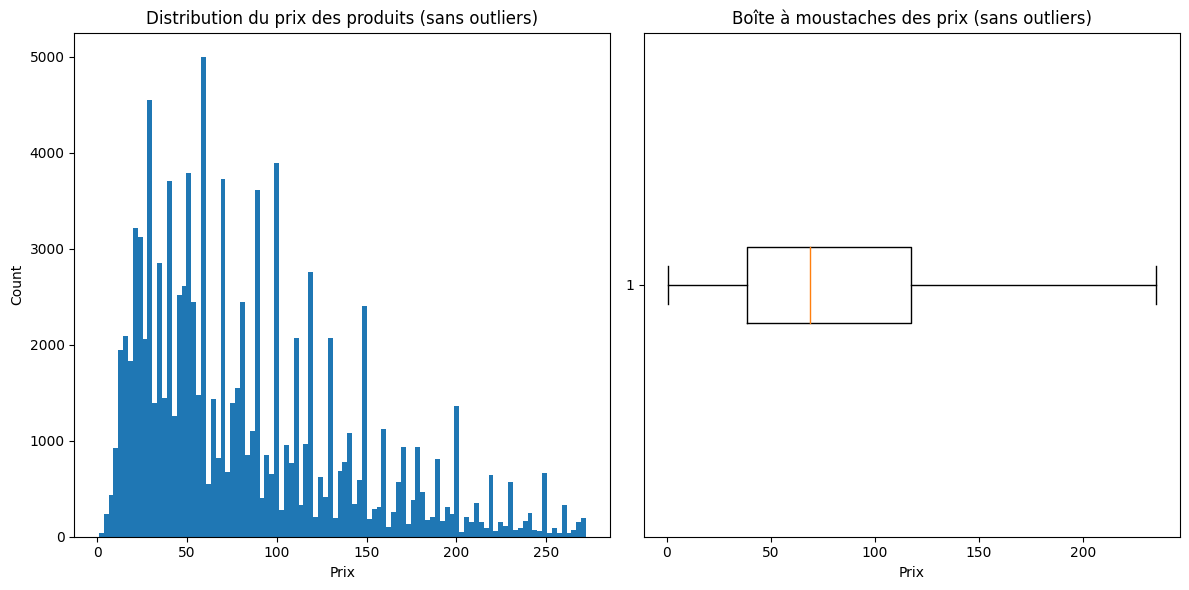

In [447]:

# Calcul des outliers
q1 = np.percentile(df['price'], 25)
q3 = np.percentile(df['price'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_data = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogramme sans outliers
axes[0].hist(filtered_data['price'], bins=100)
axes[0].set_xlabel('Prix')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution du prix des produits (sans outliers)')

# Boxplot sans outliers
axes[1].boxplot(filtered_data['price'], vert=False, showfliers=False)
axes[1].set_xlabel('Prix')
axes[1].set_title('Boîte à moustaches des prix (sans outliers)')

plt.tight_layout()
plt.show()



In [448]:
#Chek des outsiders, cela parait probable
df[df['price']> 6000]['product_category_name']

4555            art
15711    housewares
Name: product_category_name, dtype: object

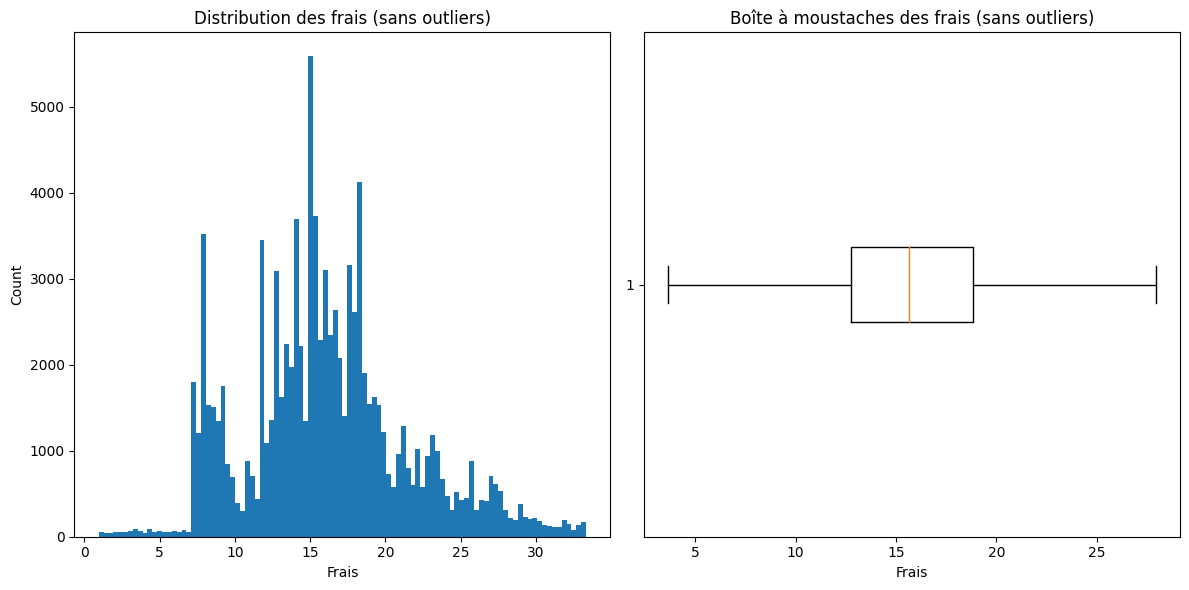

In [449]:
# Calcul des limites des valeurs acceptables
q1 = np.percentile(df['freight_value'], 25)
q3 = np.percentile(df['freight_value'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrage des données sans outliers
filtered_data = df[(df['freight_value'] >= lower_bound) & (df['freight_value'] <= upper_bound)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogramme sans outliers
axes[0].hist(filtered_data['freight_value'], bins=100)
axes[0].set_xlabel('Frais')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution des frais (sans outliers)')

# Boxplot sans outliers
axes[1].boxplot(filtered_data['freight_value'], vert=False, showfliers=False)
axes[1].set_xlabel('Frais')
axes[1].set_title('Boîte à moustaches des frais (sans outliers)')

plt.tight_layout()
plt.show()

In [450]:
# drop la ligne suspecte
df = df[df['order_id']!= 'a77e1550db865202c56b19ddc6dc4d53']

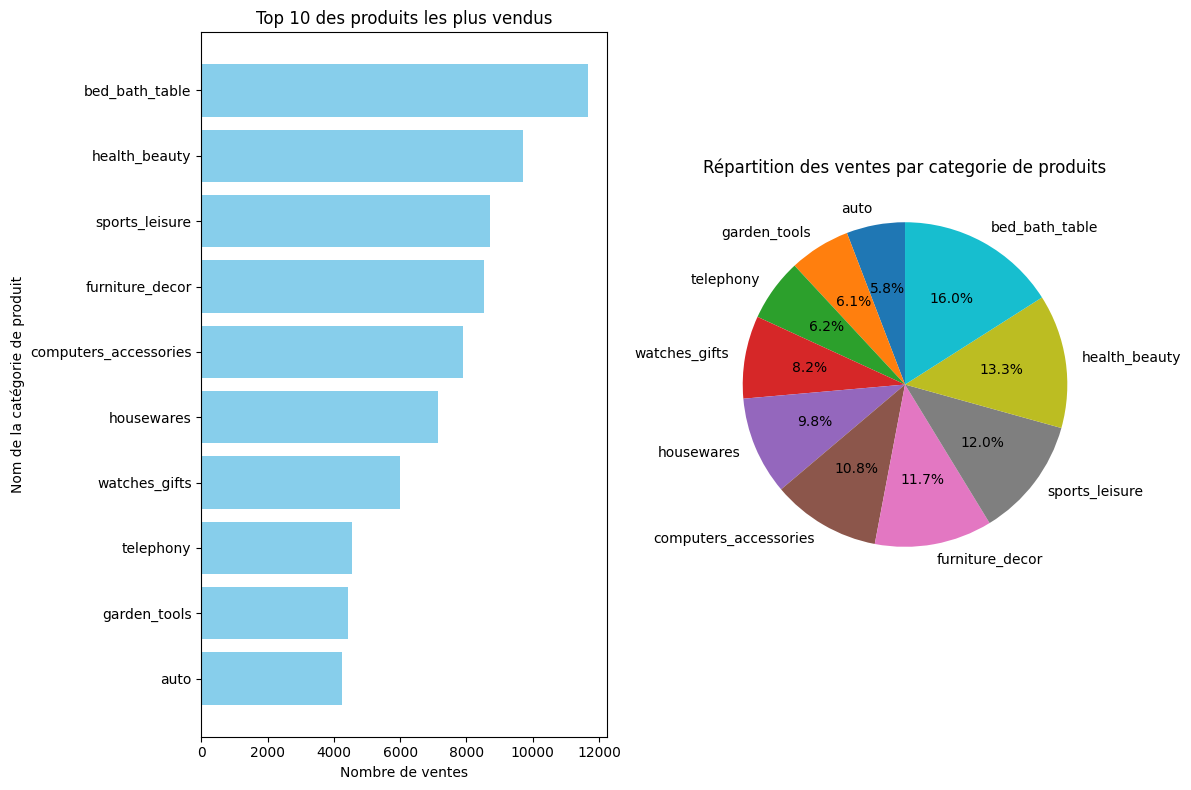

In [451]:
grouped_data = df.groupby('product_category_name').count()['order_id'].sort_values().tail(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Barplot
axes[0].barh(grouped_data.index, grouped_data.values, color='skyblue')
axes[0].set_xlabel('Nombre de ventes')
axes[0].set_ylabel('Nom de la catégorie de produit')
axes[0].set_title('Top 10 des produits les plus vendus')

# Pie chart
axes[1].pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Répartition des ventes par categorie de produits')

plt.tight_layout()
plt.show()

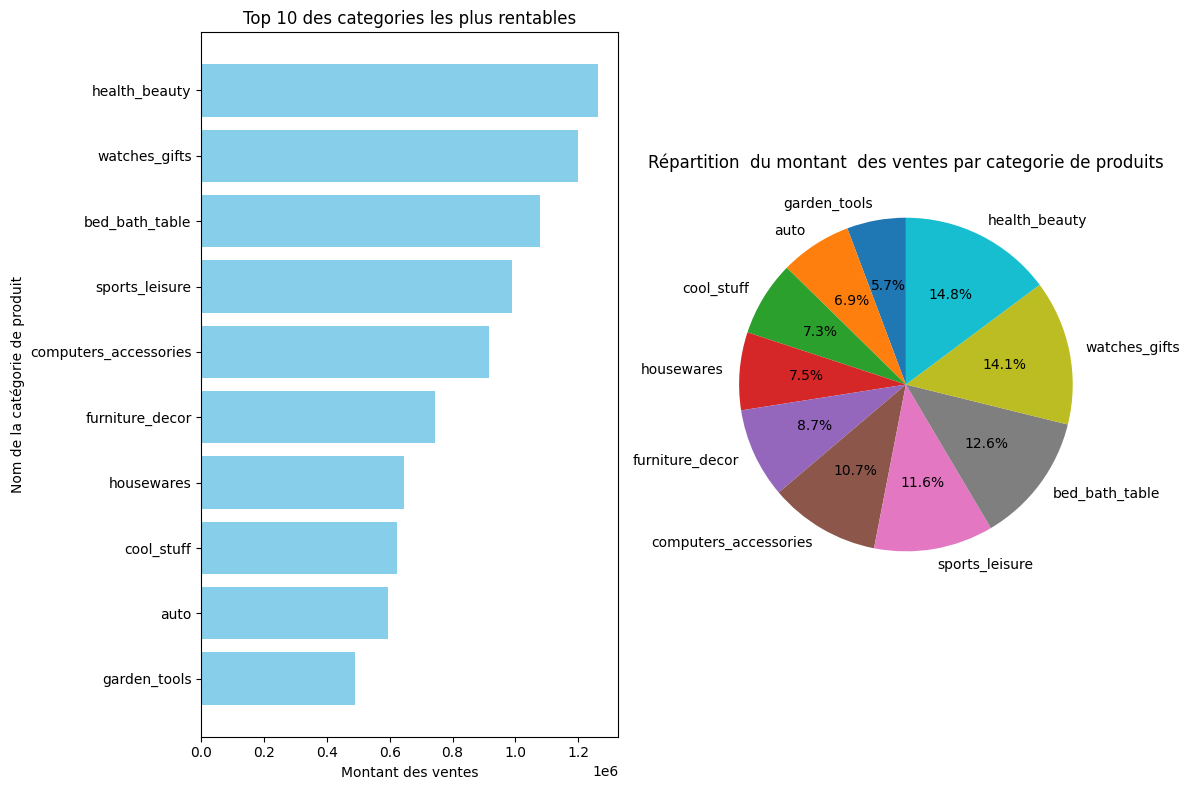

In [452]:
grouped_data = df.groupby('product_category_name').sum()['price'].sort_values().tail(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Barplot
axes[0].barh(grouped_data.index, grouped_data.values, color='skyblue')
axes[0].set_xlabel('Montant des ventes')
axes[0].set_ylabel('Nom de la catégorie de produit')
axes[0].set_title('Top 10 des categories les plus rentables')

# Pie chart
axes[1].pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Répartition  du montant  des ventes par categorie de produits')

plt.tight_layout()
plt.show()

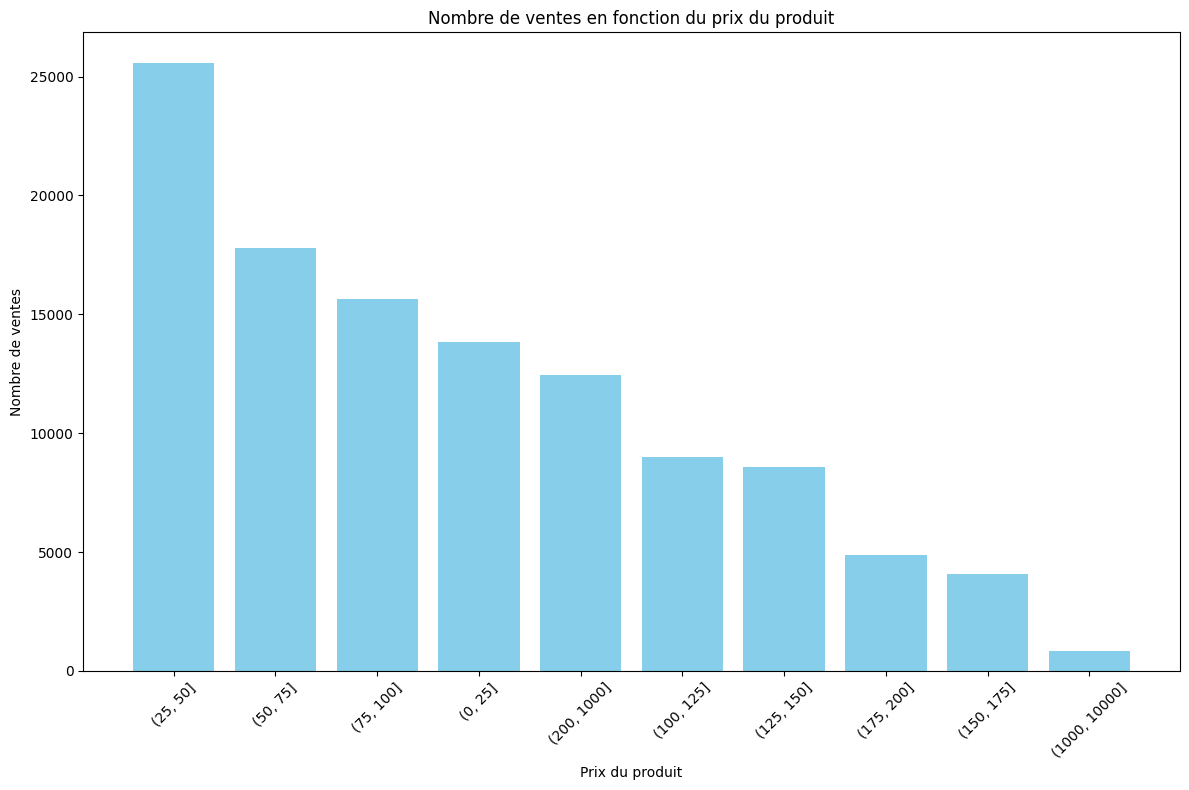

In [453]:
custom_bins = [0, 25, 50, 75,100,125, 150,175,200,1000,10000] 

price_bins = pd.cut(df['price'], bins=custom_bins)


sales_by_price = df.groupby(price_bins).count()['order_id'].sort_values(ascending=False)

# Tracer le barplot
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(sales_by_price.index.astype(str), sales_by_price.values, color='skyblue')

ax.set_xlabel('Prix du produit')
ax.set_ylabel('Nombre de ventes')
ax.set_title('Nombre de ventes en fonction du prix du produit')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### C) Seller

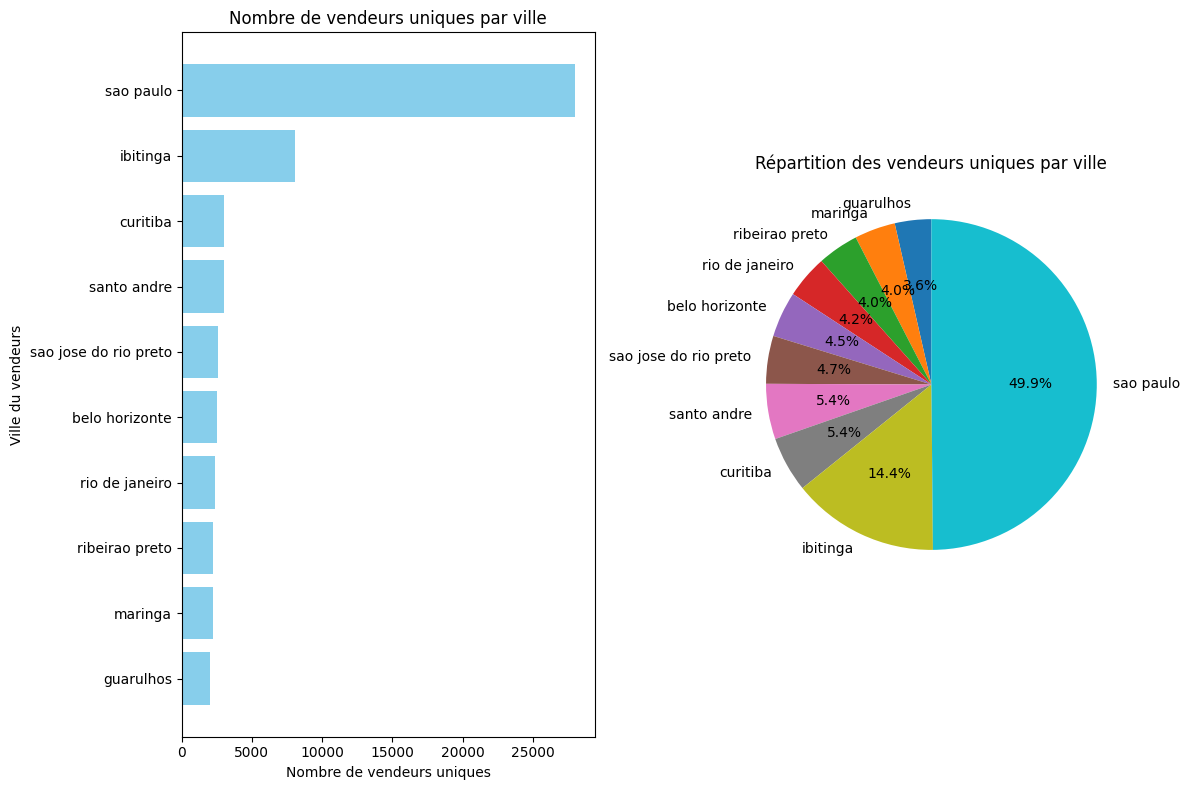

In [454]:
# Répartition des vendeurs au brésil

grouped_data = df.groupby(by='seller_city').count()['seller_id'].sort_values(ascending=True).tail(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Barplot
axes[0].barh(grouped_data.index, grouped_data.values, color='skyblue')
axes[0].set_xlabel('Nombre de vendeurs uniques')
axes[0].set_ylabel('Ville du vendeurs')
axes[0].set_title('Nombre de vendeurs uniques par ville')

# Pie chart
axes[1].pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Répartition des vendeurs uniques par ville')

plt.tight_layout()
plt.show()

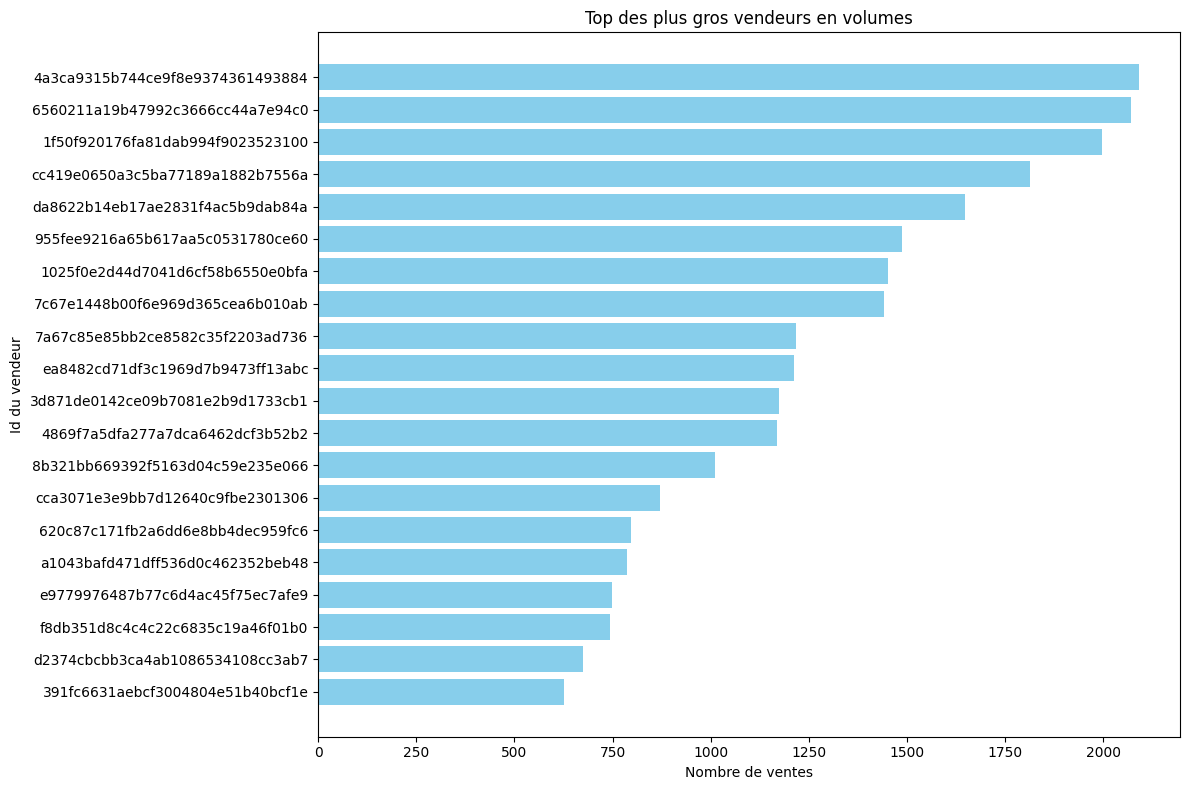

In [455]:
grouped_data = df.groupby(by='seller_id').count()['order_id'].sort_values(ascending=True).tail(20)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# Barplot
ax.barh(grouped_data.index, grouped_data.values, color='skyblue')
ax.set_xlabel('Nombre de ventes')
ax.set_ylabel('Id du vendeur')
ax.set_title('Top des plus gros vendeurs en volumes')

plt.tight_layout()
plt.show()

In [456]:
# Check des produits vendus par ces vendeurs
list_sellers_vol = grouped_data.reset_index()['seller_id']

for i in list_sellers_vol:
    df_temp = df[df['seller_id']==i]['product_category_name'].value_counts()
    print(df_temp)

furniture_decor    338
bed_bath_table     288
Name: product_category_name, dtype: int64
bed_bath_table    639
auto               23
cool_stuff         11
baby                1
Name: product_category_name, dtype: int64
housewares                                 198
pet_shop                                    92
sports_leisure                              85
garden_tools                                55
toys                                        52
perfumery                                   47
home_appliances                             36
cool_stuff                                  35
computers_accessories                       34
watches_gifts                               30
health_beauty                               22
office_furniture                            18
auto                                        12
construction_tools_construction              9
kitchen_dining_laundry_garden_furniture      7
stationery                                   6
signaling_and_security        

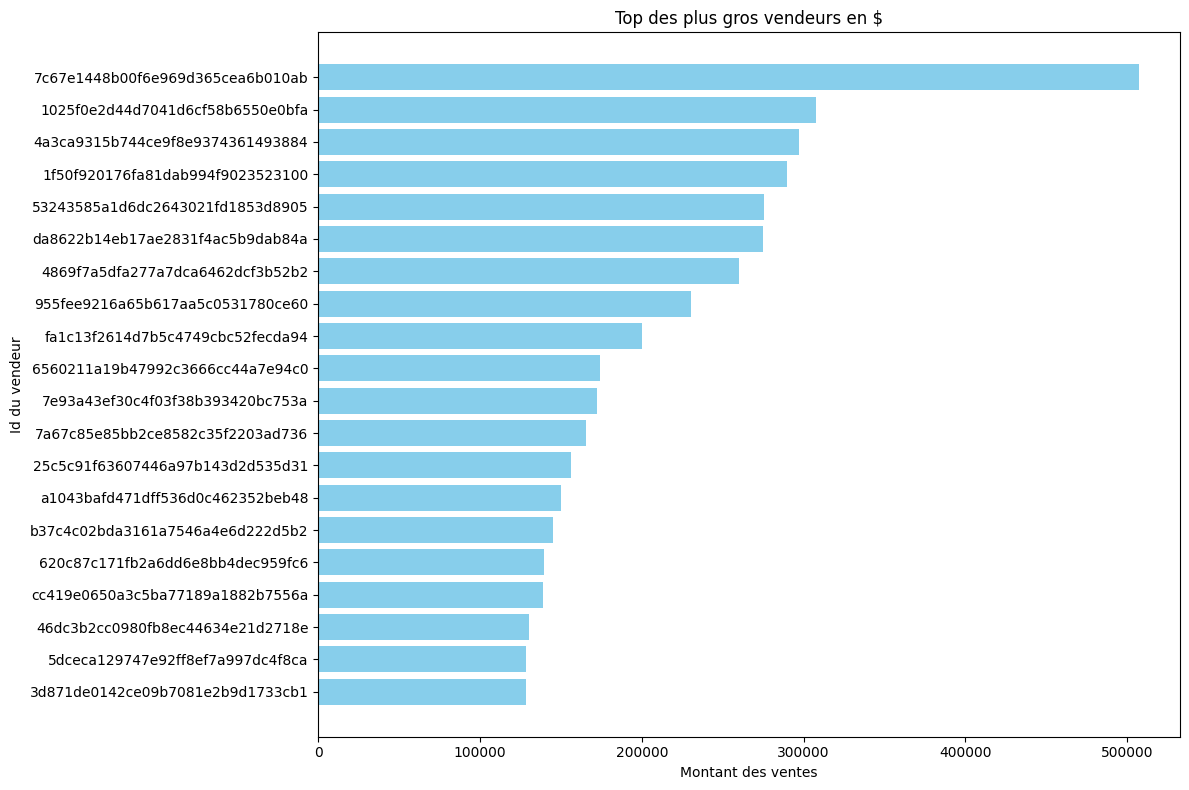

In [457]:
grouped_data = df.groupby(by='seller_id').sum()['payment_value'].sort_values(ascending=True).tail(20)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# Barplot
ax.barh(grouped_data.index, grouped_data.values, color='skyblue')
ax.set_xlabel('Montant des ventes')
ax.set_ylabel('Id du vendeur')
ax.set_title('Top des plus gros vendeurs en $')

plt.tight_layout()
plt.show()

### D) Localisation

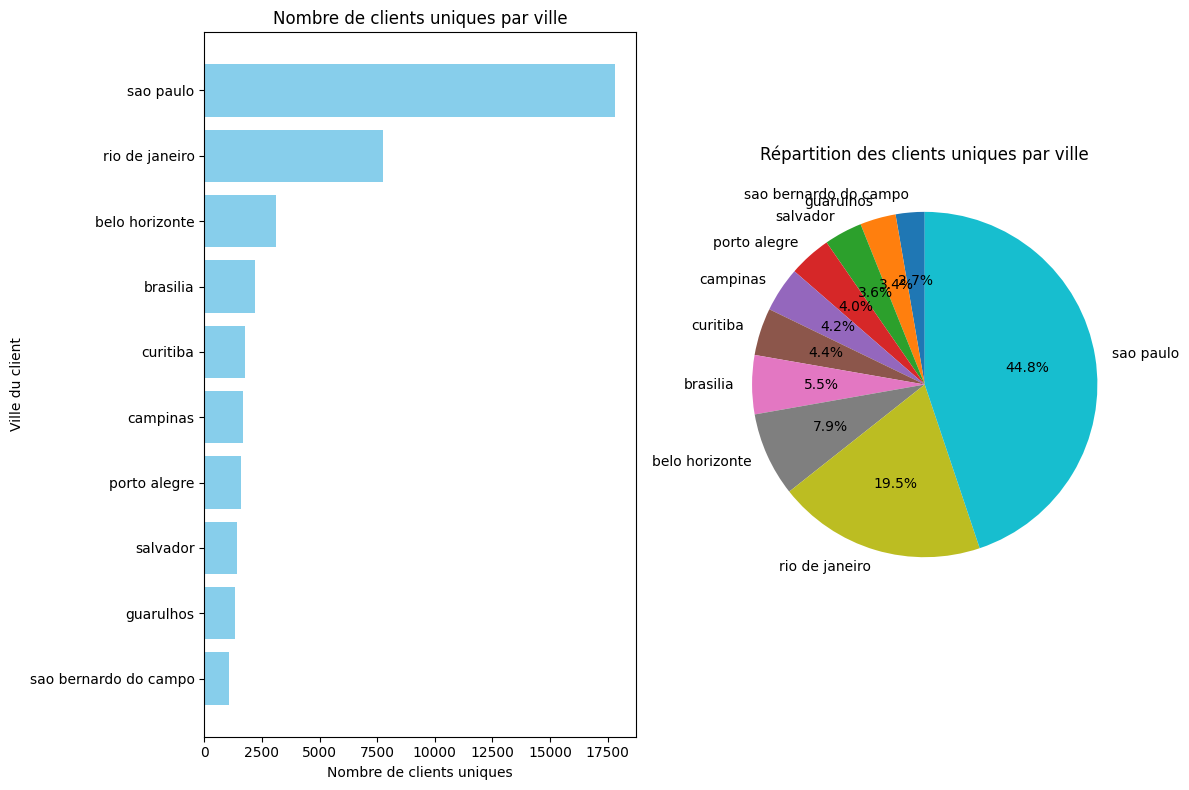

In [458]:
# Les clients proviennent principalement du brésil dont plus de 50% dans deux villes en particulier

grouped_data = df.groupby(by='customer_city').count()['customer_unique_id'].sort_values(ascending=True).tail(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Barplot
axes[0].barh(grouped_data.index, grouped_data.values, color='skyblue')
axes[0].set_xlabel('Nombre de clients uniques')
axes[0].set_ylabel('Ville du client')
axes[0].set_title('Nombre de clients uniques par ville')

# Pie chart
axes[1].pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Répartition des clients uniques par ville')

plt.tight_layout()
plt.show()

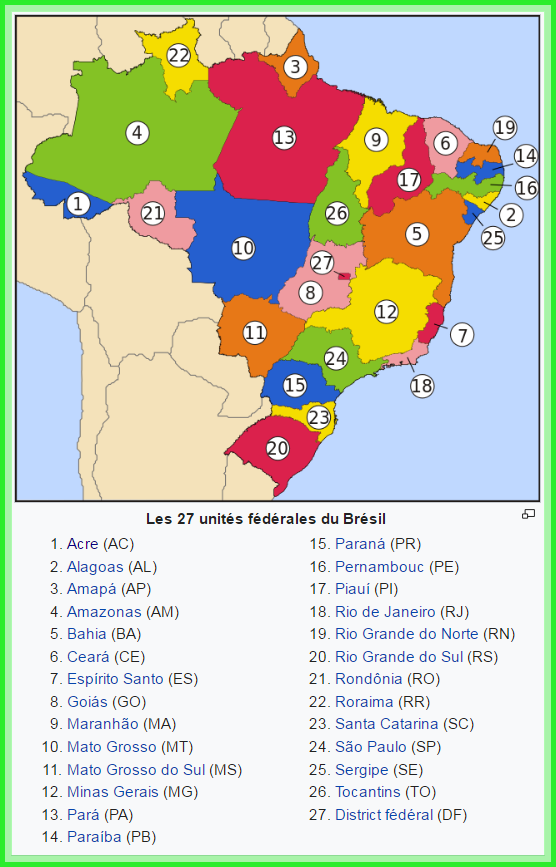

In [459]:
# Régions du brésil :
image2 = Image.open("dataset/3293234584_1_3_5AyqZ27W.png")
display(image2)

In [460]:
# Les régions de la colonne customer_state correspondent bien aux régions du brésil
sorted(df['customer_state'].unique())

['AC',
 'AL',
 'AM',
 'AP',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MG',
 'MS',
 'MT',
 'PA',
 'PB',
 'PE',
 'PI',
 'PR',
 'RJ',
 'RN',
 'RO',
 'RR',
 'RS',
 'SC',
 'SE',
 'SP',
 'TO']

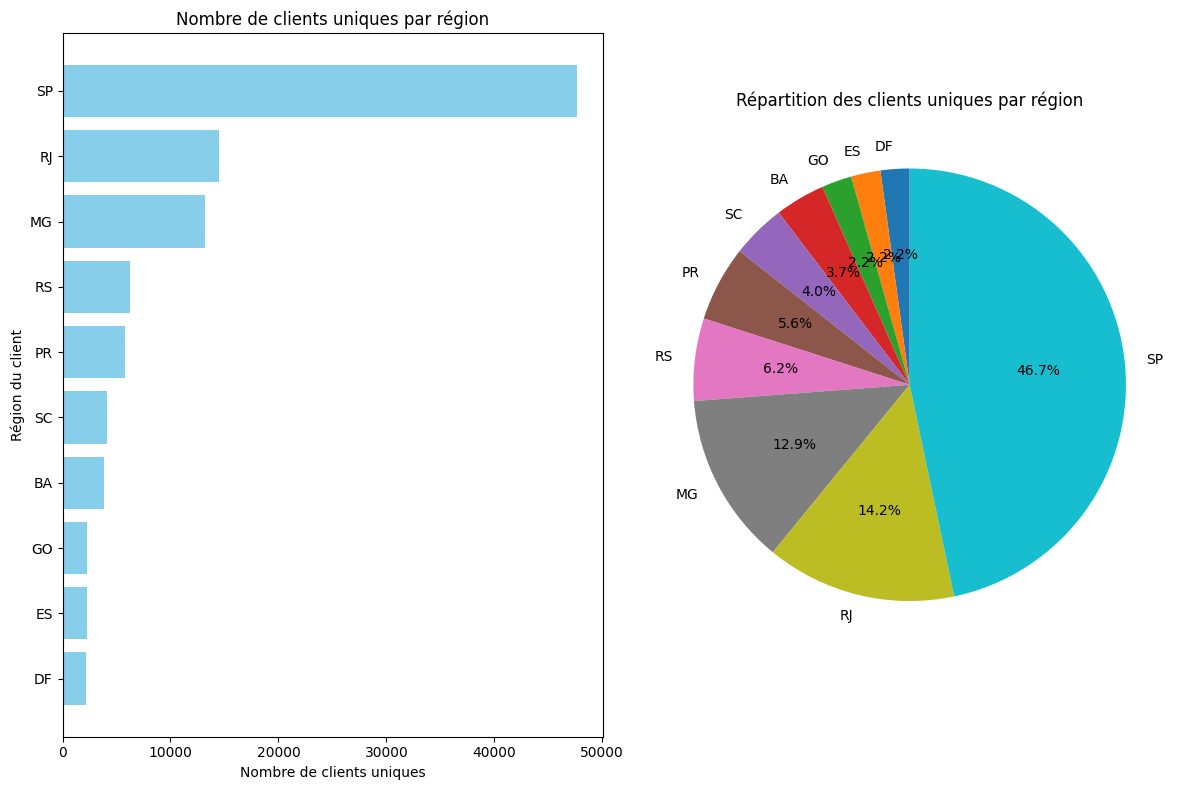

In [461]:
# ~70% des clients proviennent de seulement 3 régions

grouped_data = df.groupby(by='customer_state').count()['customer_unique_id'].sort_values(ascending=True).tail(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Barplot
axes[0].barh(grouped_data.index, grouped_data.values, color='skyblue')
axes[0].set_xlabel('Nombre de clients uniques')
axes[0].set_ylabel('Région du client')
axes[0].set_title('Nombre de clients uniques par région')

# Pie chart
axes[1].pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Répartition des clients uniques par région')

plt.tight_layout()
plt.show()

### E) Review

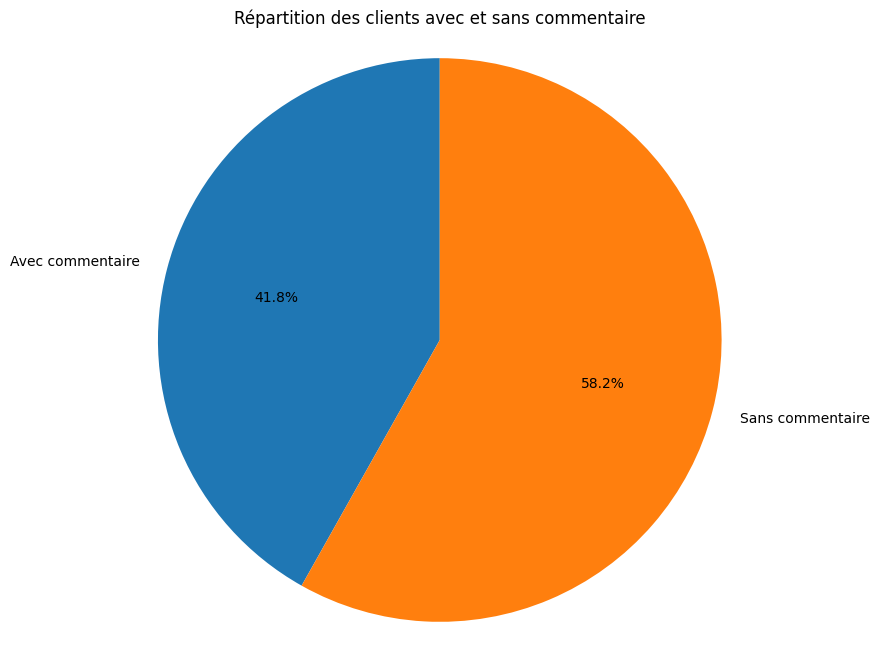

In [462]:
# Compter le nombre de clients avec et sans commentaire
comment_counts = df['review_comment_message'].value_counts()
no_comment_count = comment_counts[' ']
has_comment_count = comment_counts.sum() - no_comment_count


plt.figure(figsize=(8, 8))
plt.pie([has_comment_count, no_comment_count], labels=['Avec commentaire', 'Sans commentaire'], autopct='%1.1f%%', startangle=90)
plt.title('Répartition des clients avec et sans commentaire')
plt.axis('equal')  # Assurer que le pie chart soit circulaire

plt.show()

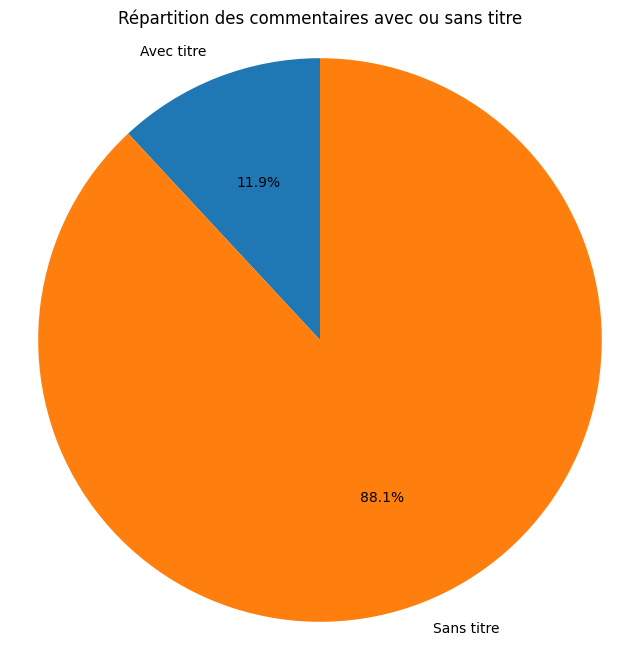

In [463]:
comment_counts = df['review_comment_title'].value_counts()
no_comment_count = comment_counts[' ']
has_comment_count = comment_counts.sum() - no_comment_count


plt.figure(figsize=(8, 8))
plt.pie([has_comment_count, no_comment_count], labels=['Avec titre', 'Sans titre'], autopct='%1.1f%%', startangle=90)
plt.title('Répartition des commentaires avec ou sans titre')
plt.axis('equal')  # Assurer que le pie chart soit circulaire

plt.show()

In [464]:
df['comment'] = np.where(df['review_comment_message'] != ' ', True, False)

## 5) Features Engineering & Analyse univarié : 

### 1) total_dep_by_customer

#### a) Features engineering

In [465]:
# Calcul du montant total des achats par clients

In [466]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_estim_lat', 'seller_estim_lng', 'customer_estim_lat',
       'customer_estim_lng', 'product_category_na

In [467]:
total_dep = df.groupby(by=['customer_unique_id'])['payment_value'].sum().reset_index()

In [468]:
total_dep

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
91027,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84
91028,fffea47cd6d3cc0a88bd621562a9d061,84.58
91029,ffff371b4d645b6ecea244b27531430a,112.46
91030,ffff5962728ec6157033ef9805bacc48,133.69


In [469]:
# Sélection d'un client avec plusieurs commandes
cust = df[df['customer_unique_id']== "f9ae226291893fda10af7965268fb7f6"][['customer_unique_id','order_id','product_id','order_item_id','product_category_name','payment_value','price','freight_value']]

In [470]:
# Ce client à commandé 3 produits , dont 2 similaires dans la même commande
cust.groupby(['order_id','order_item_id']).sum()
# Pour la première commande le client à payé 95.67$ , 79.9 (prix du produit) + 15.77 (frais)
# Pour la deuxième commande : 425,5 correspond à 189.9 * 2 (prix du produit) + 22.80 * 2 (frais)
# Au total ce client à depensé 521.07$ sur le site.

payment_value   price  \
order_id                         order_item_id                          
370e2e6c1a9fd451eb7f0852daa3b006 1                      95.67   878.9   
c6492b842ac190db807c15aff21a7dd6 1                     425.40  2278.8   
                                 2                     425.40  2278.8   

                                                freight_value  
order_id                         order_item_id                 
370e2e6c1a9fd451eb7f0852daa3b006 1                     173.47  
c6492b842ac190db807c15aff21a7dd6 1                     273.60  
                                 2                     273.60

In [471]:
cust = cust.groupby('order_id').agg({'price': 'mean', 'freight_value': 'mean', 'order_item_id': 'nunique'}).reset_index()


In [472]:
cust

,order_id,price,freight_value,order_item_id
0,370e2e6c1a9fd451eb7f0852daa3b006,79.9,15.77,1
1,c6492b842ac190db807c15aff21a7dd6,189.9,22.80,2


In [473]:
# depense par commandes clients = (prix du produit + frais) * nb d'items
cust['total_dep'] = (cust['price'] + cust['freight_value']) * cust['order_item_id']

In [474]:
# On obtient le bon chiffre pour la dépense de ce client
cust['total_dep'].sum()

521.07

In [475]:
total_dep_by_customer = df.groupby(['customer_unique_id','order_id']).agg({'price': 'mean', 'freight_value': 'mean', 'order_item_id': 'nunique'}).reset_index()

In [476]:
total_dep_by_customer['total_dep'] = (total_dep_by_customer['price'] + total_dep_by_customer['freight_value']) * total_dep_by_customer['order_item_id']

In [477]:
total_dep_by_customer = total_dep_by_customer.groupby('customer_unique_id')['total_dep'].sum().reset_index()

In [478]:
# Check ok
total_dep_by_customer[total_dep_by_customer['customer_unique_id']== "f9ae226291893fda10af7965268fb7f6"]

,customer_unique_id,total_dep
88844,f9ae226291893fda10af7965268fb7f6,521.07


In [479]:
total_dep_by_customer.rename(columns={'total_dep':'total_dep_by_customer'},inplace=True)

In [480]:
df.shape

(112652, 45)

In [481]:
df = df.merge(total_dep_by_customer, on= 'customer_unique_id', how='left')

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112652 entries, 0 to 112651
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112652 non-null  object        
 1   customer_unique_id             112652 non-null  object        
 2   customer_zip_code_prefix       112652 non-null  int64         
 3   customer_city                  112652 non-null  object        
 4   customer_state                 112652 non-null  object        
 5   order_id                       112652 non-null  object        
 6   order_status                   112652 non-null  object        
 7   order_purchase_timestamp       112652 non-null  datetime64[ns]
 8   order_approved_at              112652 non-null  datetime64[ns]
 9   order_delivered_carrier_date   112652 non-null  datetime64[ns]
 10  order_delivered_customer_date  112652 non-null  datetime64[ns]
 11  

#### b) Analyse univariée

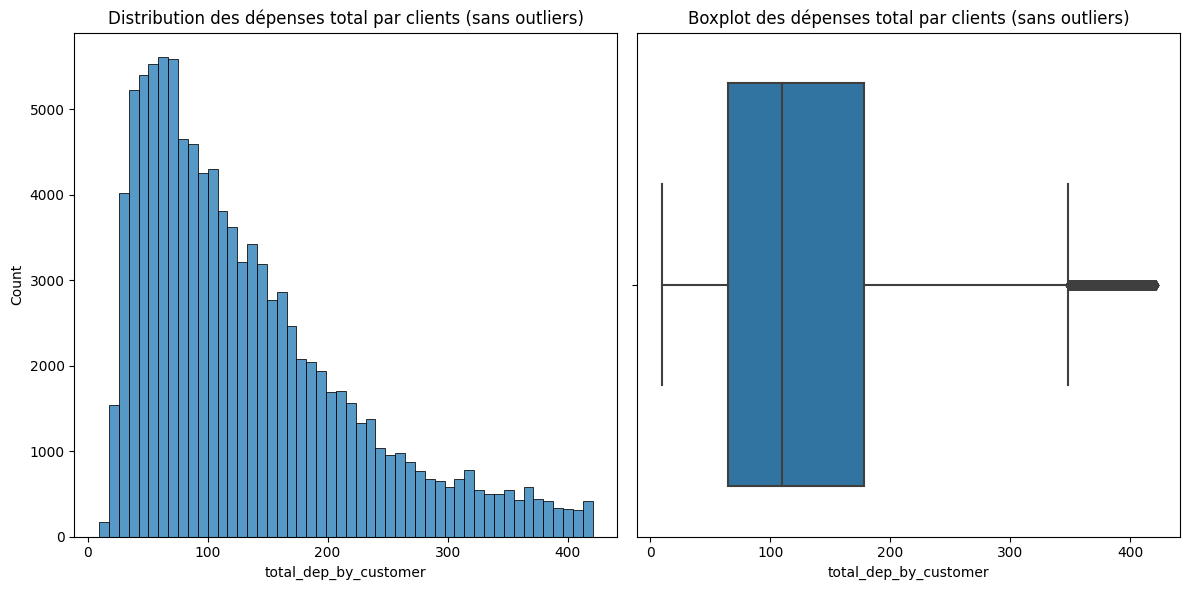

In [483]:
Q1 = df['total_dep_by_customer'].quantile(0.25)
Q3 = df['total_dep_by_customer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
filtered_data = df[(df['total_dep_by_customer'] >= lower_bound) & (df['total_dep_by_customer'] <= upper_bound)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogramme sans outliers
sns.histplot(filtered_data['total_dep_by_customer'], bins=50, ax=axes[0])
axes[0].set_xlabel('total_dep_by_customer')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution des dépenses total par clients (sans outliers)')

# Boxplot sans outliers
sns.boxplot(x=filtered_data['total_dep_by_customer'], orient='horizontal', ax=axes[1])
axes[1].set_xlabel('total_dep_by_customer')
axes[1].set_title('Boxplot des dépenses total par clients (sans outliers)')

plt.tight_layout()
plt.show()

In [484]:
# Features intéressante mais la moyenne des dépenses par client me semble plus interessantes

### 2) freq_purchase_by_customer

#### a) Features engineering

In [485]:
# Calcul de la fréquence d'achat/ an pour chaque client

In [486]:
freq_purchase_by_customer = df.groupby('customer_unique_id')['order_purchase_timestamp'].nunique().reset_index()

In [487]:
freq_purchase_by_customer

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
91027,fffcf5a5ff07b0908bd4e2dbc735a684,1
91028,fffea47cd6d3cc0a88bd621562a9d061,1
91029,ffff371b4d645b6ecea244b27531430a,1
91030,ffff5962728ec6157033ef9805bacc48,1


In [488]:
freq_purchase_by_customer.rename(columns={'order_purchase_timestamp':'freq_purchase_by_customer'},inplace=True)

In [489]:
df.shape

(112652, 46)

In [490]:
df = df.merge(freq_purchase_by_customer, on= 'customer_unique_id', how='left')

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112652 entries, 0 to 112651
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112652 non-null  object        
 1   customer_unique_id             112652 non-null  object        
 2   customer_zip_code_prefix       112652 non-null  int64         
 3   customer_city                  112652 non-null  object        
 4   customer_state                 112652 non-null  object        
 5   order_id                       112652 non-null  object        
 6   order_status                   112652 non-null  object        
 7   order_purchase_timestamp       112652 non-null  datetime64[ns]
 8   order_approved_at              112652 non-null  datetime64[ns]
 9   order_delivered_carrier_date   112652 non-null  datetime64[ns]
 10  order_delivered_customer_date  112652 non-null  datetime64[ns]
 11  

#### b) analyse univariée

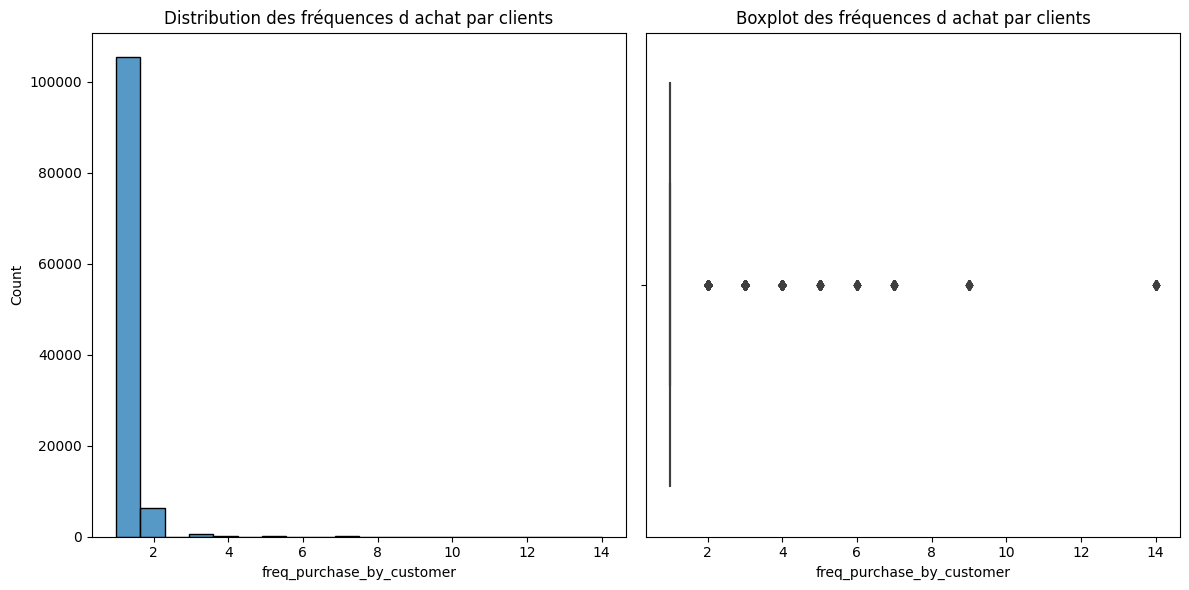

In [492]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogramme sans outliers
sns.histplot(df['freq_purchase_by_customer'], bins=20, ax=axes[0])
axes[0].set_xlabel('freq_purchase_by_customer')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution des fréquences d achat par clients')

# Boxplot sans outliers
sns.boxplot(x=df['freq_purchase_by_customer'], orient='horizontal', ax=axes[1])
axes[1].set_xlabel('freq_purchase_by_customer')
axes[1].set_title('Boxplot des fréquences d achat par clients')

plt.tight_layout()
plt.show()

In [493]:
print("% de clients qui n'ont commandés qu'une seule fois sur le site : {}%".format(round(100 - (df[df['freq_purchase_by_customer'] != 1].shape[0] / df[df['freq_purchase_by_customer'] == 1].shape[0])*100,2)))

% de clients qui n'ont commandés qu'une seule fois sur le site : 93.18%


In [494]:
df['freq_purchase_by_customer'].describe()

count    112652.00000
mean          1.07825
std           0.36814
min           1.00000
25%           1.00000
50%           1.00000
75%           1.00000
max          14.00000
Name: freq_purchase_by_customer, dtype: float64

In [495]:
# 93% des clients n'ont commandés qu'une seule fois, la variable ne parait pas pertinent dans un algo de segmentaiton 
# cependant il serait intéressant d'observer les différences entre les clients ayant commandés plusieurs fois et le reste.

### 3) eval_mean_per_customer

#### b) analyse uivarié

In [496]:
# Calcul de la note moyenne qu'attribue chaque clients 

In [497]:
# Sélection d'un client avec plusieurs review dans la même commande
cust = df[df['customer_unique_id']== "f9ae226291893fda10af7965268fb7f6"][['customer_unique_id','order_id','review_id','review_score']]

In [498]:
cust

,customer_unique_id,order_id,review_id,review_score
4648,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,cc074f1c33940c4f0dd904705f98e39e,4.0
4649,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,cc074f1c33940c4f0dd904705f98e39e,4.0
4650,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,cc074f1c33940c4f0dd904705f98e39e,4.0
4651,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,cc074f1c33940c4f0dd904705f98e39e,4.0
4652,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,cc074f1c33940c4f0dd904705f98e39e,4.0
4653,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,cc074f1c33940c4f0dd904705f98e39e,4.0
4654,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,cc074f1c33940c4f0dd904705f98e39e,4.0
4655,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,cc074f1c33940c4f0dd904705f98e39e,4.0
4656,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,cc074f1c33940c4f0dd904705f98e39e,4.0
4657,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,cc074f1c33940c4f0dd904705f98e39e,4.0


In [499]:
# Moyenne pour chaque review
cust = cust.groupby(['customer_unique_id','review_id']).mean().reset_index()
cust

,customer_unique_id,review_id,review_score
0,f9ae226291893fda10af7965268fb7f6,3ec9cc2323512ce30a5dc1b24f60ea27,3.0
1,f9ae226291893fda10af7965268fb7f6,cc074f1c33940c4f0dd904705f98e39e,4.0


In [500]:
cust.groupby('customer_unique_id').mean().reset_index()

,customer_unique_id,review_score
0,f9ae226291893fda10af7965268fb7f6,3.5


In [501]:
eval_mean_per_customer = df.groupby(['customer_unique_id','review_id']).mean().reset_index()

In [502]:
eval_mean_per_customer = eval_mean_per_customer.groupby('customer_unique_id')['review_score'].mean().reset_index()

In [503]:
# Check ok
eval_mean_per_customer[eval_mean_per_customer['customer_unique_id']== "f9ae226291893fda10af7965268fb7f6"]

,customer_unique_id,review_score
88844,f9ae226291893fda10af7965268fb7f6,3.5


In [504]:
eval_mean_per_customer.rename(columns={'review_score':'eval_mean_per_customer'},inplace=True)

In [505]:
df.shape

(112652, 47)

In [506]:
df = df.merge(eval_mean_per_customer, on= 'customer_unique_id', how='left')

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112652 entries, 0 to 112651
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112652 non-null  object        
 1   customer_unique_id             112652 non-null  object        
 2   customer_zip_code_prefix       112652 non-null  int64         
 3   customer_city                  112652 non-null  object        
 4   customer_state                 112652 non-null  object        
 5   order_id                       112652 non-null  object        
 6   order_status                   112652 non-null  object        
 7   order_purchase_timestamp       112652 non-null  datetime64[ns]
 8   order_approved_at              112652 non-null  datetime64[ns]
 9   order_delivered_carrier_date   112652 non-null  datetime64[ns]
 10  order_delivered_customer_date  112652 non-null  datetime64[ns]
 11  

#### b) analyse univarié

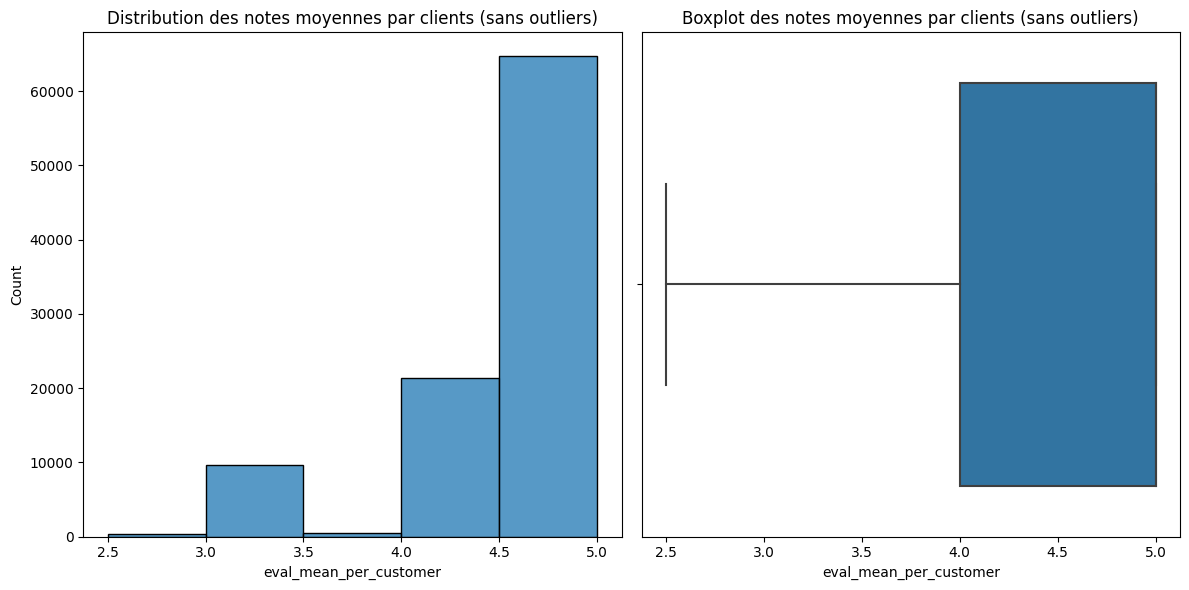

In [508]:
Q1 = df['eval_mean_per_customer'].quantile(0.25)
Q3 = df['eval_mean_per_customer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
filtered_data = df[(df['eval_mean_per_customer'] >= lower_bound) & (df['eval_mean_per_customer'] <= upper_bound)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogramme sans outliers
sns.histplot(filtered_data['eval_mean_per_customer'], bins=5, ax=axes[0])
axes[0].set_xlabel('eval_mean_per_customer')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution des notes moyennes par clients (sans outliers)')

# Boxplot sans outliers
sns.boxplot(x=filtered_data['eval_mean_per_customer'], orient='horizontal', ax=axes[1])
axes[1].set_xlabel('eval_mean_per_customer')
axes[1].set_title('Boxplot des notes moyennes par clients (sans outliers)')

plt.tight_layout()
plt.show()

In [509]:
# Remarque: 50 % des clients mettent en moyenne une note entre 4 et 5 ce qui est plot bon

In [510]:
# Features intéressente pour la ségementation, permet de différencier les clients satisfaits du reste.

### 4) nb_of_payement_mean

#### a) Features engineering

In [511]:
# Calcul du nombre de payement moyen pour un ordre d'achat par client

In [512]:
test = df[df['customer_unique_id'] == 'f9ae226291893fda10af7965268fb7f6'][['customer_unique_id','order_id','order_item_id','product_id','payment_type',
 'payment_installments','payment_sequential',
 'payment_value','price','freight_value']]
test = test.groupby(['customer_unique_id','order_id'])['payment_sequential'].max().reset_index()

In [513]:
#check de la features sur un client
test.groupby('customer_unique_id').mean().reset_index()

,customer_unique_id,payment_sequential
0,f9ae226291893fda10af7965268fb7f6,11.5


In [514]:
df_test = df.groupby(['customer_unique_id','order_id'])['payment_sequential'].max().reset_index()
df_test = df_test.groupby('customer_unique_id').mean().reset_index()

In [515]:
#check de la features sur un client
df_test[df_test['customer_unique_id'] == 'f9ae226291893fda10af7965268fb7f6']

,customer_unique_id,payment_sequential
88844,f9ae226291893fda10af7965268fb7f6,11.5


In [516]:
df_test.rename(columns={'payment_sequential': 'nb_of_payement_mean'},inplace=True)

In [517]:
df.shape

(112652, 48)

In [518]:
df = df.merge(df_test, on= 'customer_unique_id', how='left')

In [519]:
df.shape

(112652, 49)

#### b) analyse univarié

In [520]:
df['nb_of_payement_mean'].describe()

count    112652.000000
mean          1.177509
std           1.108064
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          26.000000
Name: nb_of_payement_mean, dtype: float64

In [521]:
print("% de clients qui payent en 1 seule fois : {}%".format(round(100 - (df[df['nb_of_payement_mean'] != 1].shape[0] / df[df['nb_of_payement_mean'] == 1].shape[0])*100,2)))

% de clients qui payent en 1 seule fois : 92.24%


In [522]:
# Au vu de la distribution cette features risque de biaisé le model de clustering.

### 5) nb_of_payement_type

#### a) Features engineering

In [523]:
# Calcul du nombre de type de paiement différent utilisés par client

In [524]:
# test sur un client unique
test = df[df['customer_unique_id'] == '1b6c7548a2a1f9037c1fd3ddfed95f33']
test[['payment_type']]

,payment_type
7916,voucher
7917,credit_card
13739,boleto
13740,boleto
19018,credit_card
28280,boleto
57403,boleto
57404,boleto
73992,credit_card
75627,boleto


In [525]:
df_temp = df.groupby(['customer_unique_id'])['payment_type'].nunique().reset_index()

In [526]:
df_temp.rename(columns={'payment_type': 'nb_of_payement_type'},inplace=True)

In [527]:
df = df.merge(df_temp, on= 'customer_unique_id', how='left')

In [528]:
df[df['customer_unique_id'] == '1b6c7548a2a1f9037c1fd3ddfed95f33' ]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,customer_estim_lat,customer_estim_lng,product_category_name,season,comment,total_dep_by_customer,freq_purchase_by_customer,eval_mean_per_customer,nb_of_payement_mean,nb_of_payement_type
7916,53e16f83735cfe02bf83ef6481ca241e,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,a8347ba04591f966205182a1c99c310e,delivered,2017-12-04 21:11:15,2017-12-05 08:30:50,2017-12-05 19:29:01,...,-18.954409,-49.458533,furniture_decor,Hiver,False,959.01,7,5.0,1.142857,3
7917,53e16f83735cfe02bf83ef6481ca241e,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,a8347ba04591f966205182a1c99c310e,delivered,2017-12-04 21:11:15,2017-12-05 08:30:50,2017-12-05 19:29:01,...,-18.954409,-49.458533,furniture_decor,Hiver,False,959.01,7,5.0,1.142857,3
13739,95b9cacc4bc81c3a0a33967bcde6fcd8,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,54f334d6a9d60b69dae5409327f73645,delivered,2017-11-24 13:01:09,2017-11-25 03:33:04,2017-11-27 20:12:58,...,-18.954409,-49.458533,perfumery,Automne,False,959.01,7,5.0,1.142857,3
13740,95b9cacc4bc81c3a0a33967bcde6fcd8,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,54f334d6a9d60b69dae5409327f73645,delivered,2017-11-24 13:01:09,2017-11-25 03:33:04,2017-11-27 20:12:58,...,-18.954409,-49.458533,perfumery,Automne,False,959.01,7,5.0,1.142857,3
19018,41a16488effb86580d7a89f8aa19a03b,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,abbd44be67f3cad08ffac14daf36af60,delivered,2017-11-13 16:44:41,2017-11-13 17:15:41,2017-11-14 19:16:02,...,-18.954409,-49.458533,stationery,Automne,False,959.01,7,5.0,1.142857,3
28280,fff7466a253c0e59499ea943462c10f9,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,43f08913407cac4e74a898d968e58c1a,delivered,2018-02-14 13:22:12,2018-02-15 04:11:01,2018-02-15 18:55:13,...,-18.954409,-49.458533,health_beauty,Hiver,False,959.01,7,5.0,1.142857,3
57403,c2ff01bd4fa72f9487ee397f6c5989d2,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,ab6d1b0b8360c208b62852f53726f0e6,delivered,2017-12-20 09:56:35,2017-12-21 02:12:02,2017-12-26 17:17:16,...,-18.954409,-49.458533,housewares,Hiver,False,959.01,7,5.0,1.142857,3
57404,c2ff01bd4fa72f9487ee397f6c5989d2,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,ab6d1b0b8360c208b62852f53726f0e6,delivered,2017-12-20 09:56:35,2017-12-21 02:12:02,2017-12-26 17:17:16,...,-18.954409,-49.458533,housewares,Hiver,False,959.01,7,5.0,1.142857,3
73992,9a4578c9dd9dce6517d583cb5eca0276,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,bba17d97a5a45416d0782d5d07fe740d,delivered,2017-12-05 09:13:27,2017-12-05 11:13:25,2017-12-05 19:28:41,...,-18.954409,-49.458533,furniture_decor,Hiver,False,959.01,7,5.0,1.142857,3
75627,ee5c2e36a79081c2440e61990ec2f3af,1b6c7548a2a1f9037c1fd3ddfed95f33,38301,ituiutaba,MG,75b71f40b3c71469d12c7e4dc2ce0794,delivered,2018-01-25 12:47:39,2018-01-26 03:16:04,2018-01-26 17:09:30,...,-18.954409,-49.458533,furniture_decor,Hiver,False,959.01,7,5.0,1.142857,3


#### b) analyse univarié

In [529]:
df['nb_of_payement_type'].describe()

count    112652.000000
mean          1.059147
std           0.238334
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: nb_of_payement_type, dtype: float64

In [530]:
print("% de clients qui n'utilisent qu'un seul moyen de paiement : {}%".format(round(100 - (df[df['nb_of_payement_type'] != 1].shape[0] / df[df['nb_of_payement_type'] == 1].shape[0])*100,2)))

% de clients qui n'utilisent qu'un seul moyen de paiement : 93.78%


In [531]:
# Même obervation que la features précedente. 

### 6) fav_payment_type

#### a) Features engineering

In [532]:
# Création d'une features indiquant le moyen de paiement favoris du client :

In [533]:
test = df.groupby(['customer_unique_id','payment_type']).count().reset_index()

# Check sur le client précedent
test[test['customer_unique_id']== '1b6c7548a2a1f9037c1fd3ddfed95f33']

,customer_unique_id,payment_type,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,...,customer_estim_lat,customer_estim_lng,product_category_name,season,comment,total_dep_by_customer,freq_purchase_by_customer,eval_mean_per_customer,nb_of_payement_mean,nb_of_payement_type
10050,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
10051,1b6c7548a2a1f9037c1fd3ddfed95f33,credit_card,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
10052,1b6c7548a2a1f9037c1fd3ddfed95f33,voucher,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [534]:
payment_counts = test.groupby(['customer_unique_id', 'payment_type']).size().reset_index(name='count')

# Obtention du mode de paiement le plus utilisé par client
fav_payment_type = payment_counts.groupby('customer_unique_id')['payment_type'].transform(lambda x: x.mode()[0])

test['fav_payment_type'] = fav_payment_type

In [535]:
test[test['customer_unique_id']== '1b6c7548a2a1f9037c1fd3ddfed95f33']

,customer_unique_id,payment_type,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,...,customer_estim_lng,product_category_name,season,comment,total_dep_by_customer,freq_purchase_by_customer,eval_mean_per_customer,nb_of_payement_mean,nb_of_payement_type,fav_payment_type
10050,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,boleto
10051,1b6c7548a2a1f9037c1fd3ddfed95f33,credit_card,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,boleto
10052,1b6c7548a2a1f9037c1fd3ddfed95f33,voucher,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,boleto


In [536]:
df_temp = df.groupby(['customer_unique_id','payment_type']).count().reset_index()

payment_counts = df_temp.groupby(['customer_unique_id', 'payment_type']).size().reset_index(name='count')

# Obtention du mode de paiement le plus utilisé par client
fav_payment_type = payment_counts.groupby('customer_unique_id')['payment_type'].transform(lambda x: x.mode()[0])

df_temp['fav_payment_type'] = fav_payment_type

df_unique_clients = df_temp.drop_duplicates(subset='customer_unique_id')[['customer_unique_id','fav_payment_type']]

In [537]:
# Check 
df_unique_clients[df_unique_clients['customer_unique_id']== '1b6c7548a2a1f9037c1fd3ddfed95f33']#[['customer_unique_id','fav_payment_type']]

,customer_unique_id,fav_payment_type
10050,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto


In [538]:
df.shape

(112652, 50)

In [539]:
df = df.merge(df_unique_clients, on= 'customer_unique_id', how='left')

In [540]:
df[df['customer_unique_id']== '1b6c7548a2a1f9037c1fd3ddfed95f33'][['customer_unique_id','fav_payment_type']]

,customer_unique_id,fav_payment_type
7916,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto
7917,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto
13739,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto
13740,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto
19018,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto
28280,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto
57403,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto
57404,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto
73992,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto
75627,1b6c7548a2a1f9037c1fd3ddfed95f33,boleto


In [541]:
# label encoding 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Appliquer le label encoding sur la colonne "fav_payment_type"
df['fav_payment_type_encoded'] = label_encoder.fit_transform(df['fav_payment_type'])


In [542]:
df[['fav_payment_type_encoded','fav_payment_type']]

,fav_payment_type_encoded,fav_payment_type
0,1,credit_card
1,1,credit_card
2,1,credit_card
3,1,credit_card
4,1,credit_card
...,...,...
112647,1,credit_card
112648,1,credit_card
112649,1,credit_card
112650,1,credit_card


#### b) Analyse univarié

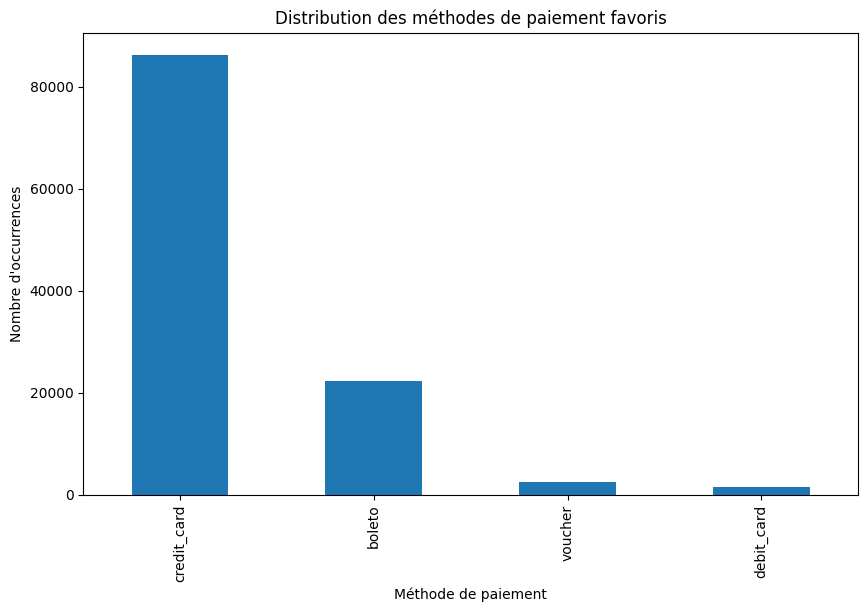

In [543]:
payment_counts = df['fav_payment_type'].value_counts()

# Tracer le diagramme à barres
plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar')
plt.title('Distribution des méthodes de paiement favoris')
plt.xlabel('Méthode de paiement')
plt.ylabel('Nombre d\'occurrences')
plt.show()

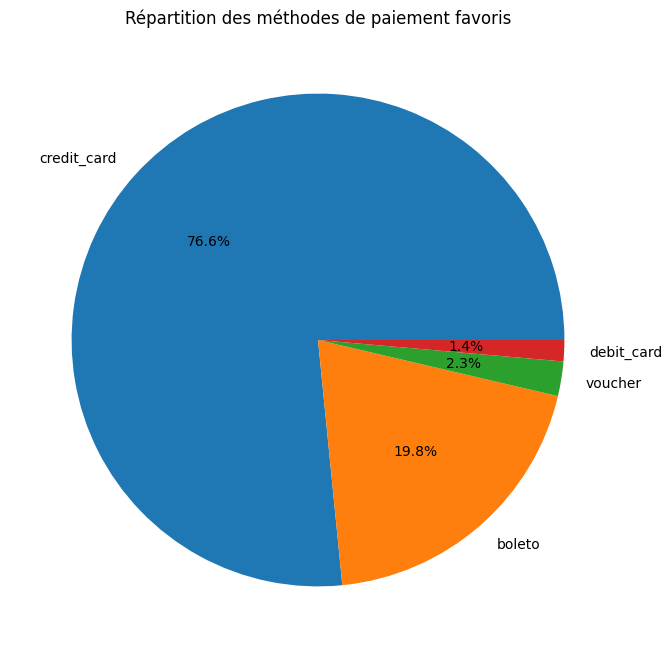

In [544]:
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Répartition des méthodes de paiement favoris')
plt.show()

In [545]:
print("% de clients qui utilisent la crédit card : {}%".format(round(100 - (df[df['fav_payment_type_encoded'] != 1].shape[0] / df[df['fav_payment_type_encoded'] == 1].shape[0])*100,2)))

% de clients qui utilisent la crédit card : 69.41%


In [546]:
df['fav_payment_type_encoded'].describe()

count    112652.000000
mean          0.861529
std           0.532017
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: fav_payment_type_encoded, dtype: float64

### 7) nbOfDay_lastBuy

#### a) Features engineering

In [547]:
last_date = df['order_purchase_timestamp'].max()

# Calculer le nombre de jours entre la dernière date du dataframe et la dernière date d'achat du client
df['nbOfDay_lastBuy'] = (last_date - df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')).dt.days


df[['customer_unique_id', 'order_purchase_timestamp', 'nbOfDay_lastBuy']]

,customer_unique_id,order_purchase_timestamp,nbOfDay_lastBuy
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,469
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,228
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,101
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,168
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,31
...,...,...,...
112647,1a29b476fee25c95fbafc67c5ac95cf8,2018-04-07 15:48:17,143
112648,d52a67c98be1cf6a5c84435bd38d095d,2018-04-04 08:20:22,147
112649,e9f50caf99f032f0bf3c55141f019d99,2018-04-08 20:11:50,142
112650,73c2643a0a458b49f58cea58833b192e,2017-11-03 21:08:33,298


#### b) Analsye univarié

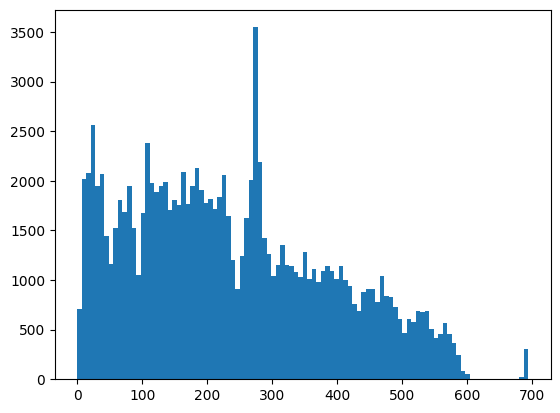

In [548]:
plt.hist(df['nbOfDay_lastBuy'],bins=100)
plt.show()

### 8) nb_products_buy

#### a) Features engineering

In [549]:
df.shape

(112652, 53)

In [550]:
# Check du nombre de produits acheté par client
df[df['customer_unique_id'] == "9a736b248f67d166d2fbb006bcb877c3"]['product_id'].nunique()

3

In [551]:
df[df['customer_unique_id'] == "9a736b248f67d166d2fbb006bcb877c3"]['product_id'].unique()

array(['ebf9bc6cd600eadd681384e3116fda85',
       '5ddab10d5e0a23acb99acf56b62b3276',
       '4eb99b5f0d7e411f246a5c9c0ae27a5e'], dtype=object)

In [552]:
df[df['customer_unique_id'] == "8d50f5eadf50201ccdcedfb9e2ac8455"]['product_id'].nunique()

13

In [553]:
# Nombre de produit (différents) acheté acheté par client
result = df.groupby(['customer_unique_id'])['product_id'].nunique()
result = result.reindex(df['customer_unique_id'])
df['nb_products_buy'] = result.values

In [554]:
df[df['customer_unique_id'] == "9a736b248f67d166d2fbb006bcb877c3"]['nb_products_buy'].head(1)

21157    3
Name: nb_products_buy, dtype: int64

In [555]:
# Le même client à acheté 13 produits différents
df[df['customer_unique_id'] == "8d50f5eadf50201ccdcedfb9e2ac8455"]['nb_products_buy'].head(1)

16031    13
Name: nb_products_buy, dtype: int64

#### b) Analyse univarié

In [556]:
df['nb_products_buy'].describe()

count    112652.000000
mean          1.170880
std           0.568723
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          13.000000
Name: nb_products_buy, dtype: float64

In [557]:
print("% des clients n'ayant acheté qu'un seul produit : {}%".format(round(100 - (df[df['nb_products_buy'] != 1].shape[0] / df[df['nb_products_buy'] == 1].shape[0])*100,2)))

% des clients n'ayant acheté qu'un seul produit : 85.94%


### 9) nb_of_comment

#### a) Features engineering

In [558]:
# Nombre de commentaire laissé par chaque clients

In [559]:
df['comment'] = np.where(df['review_comment_message'] != ' ', True, False)
comment_counts = df[df['comment'] == True].groupby(['customer_unique_id']).nunique().reset_index()[['customer_unique_id','review_id']]
comment_counts.rename(columns={'review_id': 'nb_of_comment'},inplace=True)

In [560]:
# Fusionner les résultats avec le dataframe d'origine
df = df.merge(comment_counts, on='customer_unique_id', how='left')
df['nb_of_comment'].fillna(0,inplace=True)

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112652 entries, 0 to 112651
Data columns (total 55 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112652 non-null  object        
 1   customer_unique_id             112652 non-null  object        
 2   customer_zip_code_prefix       112652 non-null  int64         
 3   customer_city                  112652 non-null  object        
 4   customer_state                 112652 non-null  object        
 5   order_id                       112652 non-null  object        
 6   order_status                   112652 non-null  object        
 7   order_purchase_timestamp       112652 non-null  datetime64[ns]
 8   order_approved_at              112652 non-null  datetime64[ns]
 9   order_delivered_carrier_date   112652 non-null  datetime64[ns]
 10  order_delivered_customer_date  112652 non-null  datetime64[ns]
 11  

In [562]:
# Check sur un client : 4 commentaires sur 5 ordre d'achat, la feature semble correct
df[df['customer_unique_id'] == 'de34b16117594161a6a89c50b289d35a'][['order_id','customer_unique_id','review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp','nb_of_comment']]

,order_id,customer_unique_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_of_comment
30836,f06059b8f4dc49c4f76378b7715a63b0,de34b16117594161a6a89c50b289d35a,6433fe6308868872cf3a9c6f848a21bc,3.0,,,2017-11-17 00:00:00,2017-11-18 20:40:01,4.0
59602,bd5232c968db4fe262e6df58cd3b5e86,de34b16117594161a6a89c50b289d35a,ff575415be648f4d0d5d389c859207ae,4.0,,"Cumpriu o esperado, exceto pelo manual do prod...",2017-11-26 00:00:00,2017-11-26 23:02:55,4.0
73671,ecd485553265a2cc3ddf9727901541af,de34b16117594161a6a89c50b289d35a,a1286792268e06cb34957e73fc46ddad,3.0,,"Sem manual ou embalagem, enrolado apenas em pl...",2018-01-19 00:00:00,2018-01-20 00:41:57,4.0
79955,d29eca3633b0b60adf268cae9133cd93,de34b16117594161a6a89c50b289d35a,e1bb98031fdbad2498accce1ce402b63,3.0,,Relógio com pulseira quebrada. Já enviado para...,2018-01-31 00:00:00,2018-01-31 13:32:31,4.0
85124,08504a0dce0a3cd13b3f7971d29fb991,de34b16117594161a6a89c50b289d35a,48625edf6669a88563f5bff5158bbbf1,4.0,,"O produto não veio com qualquer manual, mesmo ...",2017-11-09 00:00:00,2017-11-10 02:13:55,4.0


#### b) Analyse univarié

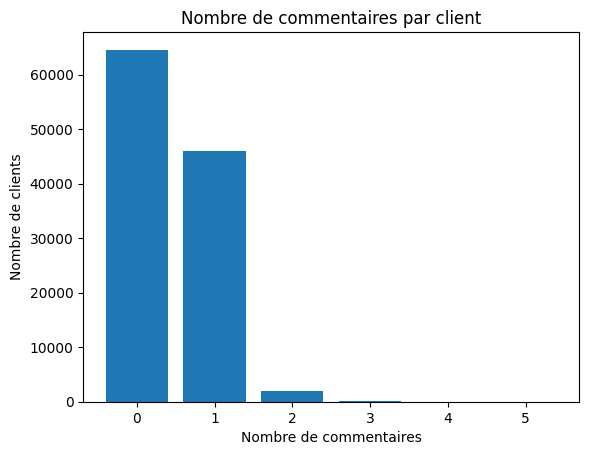

In [563]:
# features : nb_of_comment
result_counts = df['nb_of_comment'].value_counts()

plt.bar(result_counts.index, result_counts.values)

plt.xlabel('Nombre de commentaires')
plt.ylabel('Nombre de clients')

plt.title('Nombre de commentaires par client')

plt.show()

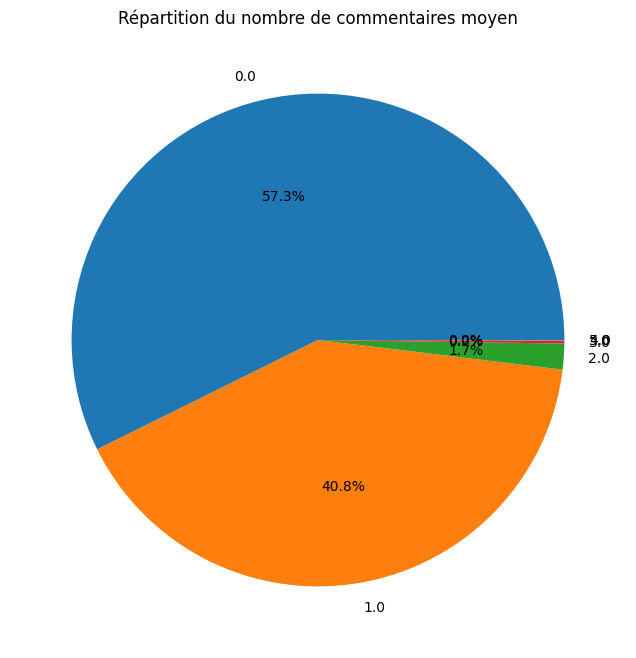

In [564]:
nbComment_counts = df['nb_of_comment'].value_counts()

# Tracer le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(nbComment_counts, labels=nbComment_counts.index, autopct='%1.1f%%')
plt.title('Répartition du nombre de commentaires moyen')
plt.show()

In [565]:
# La features peut être intéressente pour différencier les clients qui commentent, qui ne commentent pas et ceux qui commentent beaucoup

### 10) dep_per_categ

#### a) Features engineering

In [566]:
# Montant total dépensé par client pour chaque catégorie de produit :

In [567]:
# Remplacer par la catégorie favorite du client (encoding)

In [568]:
# test de la features sur 1 client
test = df[['customer_unique_id','product_category_name','product_id','price']]
test = test[test['customer_unique_id']== '8d50f5eadf50201ccdcedfb9e2ac8455']

result = test.groupby(['customer_unique_id', 'product_category_name'])['price'].sum().reset_index()
result.rename(columns={'price': 'dep_per_categ'}, inplace=True)
test = test.merge(result, on=['customer_unique_id', 'product_category_name'], how='left')

In [569]:
# Validation de la features pour sur 1 client
test

,customer_unique_id,product_category_name,product_id,price,dep_per_categ
0,8d50f5eadf50201ccdcedfb9e2ac8455,sports_leisure,5bccc8fe44471df6c7b7e08176837d2f,13.99,570.36
1,8d50f5eadf50201ccdcedfb9e2ac8455,sports_leisure,5cb96c51c55f57503465e4d2558dc053,45.99,570.36
2,8d50f5eadf50201ccdcedfb9e2ac8455,sports_leisure,de7df82eb1e48c456b020c2cfb03aeed,26.99,570.36
3,8d50f5eadf50201ccdcedfb9e2ac8455,sports_leisure,d83509907a19c72e1e4cdde78b8177ec,39.90,570.36
4,8d50f5eadf50201ccdcedfb9e2ac8455,sports_leisure,e01bc2ad5c6f46c0f53f73379fcd602e,149.90,570.36
5,8d50f5eadf50201ccdcedfb9e2ac8455,fashion_bags_accessories,94cc774056d3f2b0dc693486a589025e,13.99,50.97
6,8d50f5eadf50201ccdcedfb9e2ac8455,sports_leisure,41f6cb7c3b1200749326e50106f32d58,99.00,570.36
7,8d50f5eadf50201ccdcedfb9e2ac8455,costruction_tools_tools,df473738565b52f77b4e22b328b41576,23.40,23.40
8,8d50f5eadf50201ccdcedfb9e2ac8455,sports_leisure,d6354128c28cc56532ba7393d9373083,51.80,570.36
9,8d50f5eadf50201ccdcedfb9e2ac8455,sports_leisure,426f910ccd39ae5e7d55013c466fe343,72.90,570.36


In [570]:
#Création de la features dans le dataframe
result = df.groupby(['customer_unique_id', 'product_category_name'])['price'].sum().reset_index()
result.rename(columns={'price': 'dep_per_categ'}, inplace=True)
df = df.merge(result, on=['customer_unique_id', 'product_category_name'], how='left')

In [571]:
#Check
df[df['customer_unique_id']== '8d50f5eadf50201ccdcedfb9e2ac8455']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freq_purchase_by_customer,eval_mean_per_customer,nb_of_payement_mean,nb_of_payement_type,fav_payment_type,fav_payment_type_encoded,nbOfDay_lastBuy,nb_products_buy,nb_of_comment,dep_per_categ
16031,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,b850a16d8faf65a74c51287ef34379ce,delivered,2017-11-22 20:01:53,2017-11-22 20:12:32,2017-11-24 16:07:56,...,14,5.0,1.0,1,credit_card,1,8,13,0.0,570.36
17310,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,23427a6bd9f8fd1b51f1b1e5cc186ab8,delivered,2018-05-21 22:44:31,2018-05-22 01:53:35,2018-05-22 14:18:00,...,14,5.0,1.0,1,credit_card,1,8,13,0.0,570.36
18822,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,c2213109a2cc0e75d55585b7aaac6d97,delivered,2018-08-07 23:32:14,2018-08-07 23:45:21,2018-08-09 13:35:00,...,14,5.0,1.0,1,credit_card,1,8,13,0.0,570.36
40956,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,369634708db140c5d2c4e365882c443a,delivered,2017-06-18 22:56:48,2017-06-18 23:10:19,2017-06-19 20:12:26,...,14,5.0,1.0,1,credit_card,1,8,13,0.0,570.36
43148,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,bf92c69b7cc70f7fc2c37de43e366173,delivered,2017-07-24 22:11:50,2017-07-24 22:25:14,2017-07-26 01:42:03,...,14,5.0,1.0,1,credit_card,1,8,13,0.0,570.36
45445,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,4f62d593acae92cea3c5662c76122478,delivered,2017-07-18 23:10:58,2017-07-18 23:23:26,2017-07-20 19:00:02,...,14,5.0,1.0,1,credit_card,1,8,13,0.0,50.97
55005,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,112eb6f37f1b9dabbced368fbbc6c9ef,delivered,2018-07-23 21:53:02,2018-07-24 10:31:34,2018-07-25 10:25:00,...,14,5.0,1.0,1,credit_card,1,8,13,0.0,570.36
66465,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,d3582fd5ccccd9cb229a63dfb417c86f,delivered,2018-08-20 19:14:26,2018-08-20 19:30:05,2018-08-21 15:11:00,...,14,5.0,1.0,1,credit_card,1,8,13,0.0,23.40
77029,6289b75219d757a56c0cce8d9e427900,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,6bdf325f0966e3056651285c0aed5aad,delivered,2018-05-22 23:08:55,2018-05-22 23:36:01,2018-05-23 19:02:00,...,14,5.0,1.0,1,credit_card,1,8,13,0.0,570.36
82463,3414a9c813e3ca02504b8be8b2deb27f,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,a1a6eadae352582010f449d8527b55f3,delivered,2018-08-18 12:39:19,2018-08-18 12:50:37,2018-08-20 14:43:00,...,14,5.0,1.0,1,credit_card,1,8,13,0.0,570.36


In [572]:
df.shape

(112652, 56)

#### b) Analsye univarié

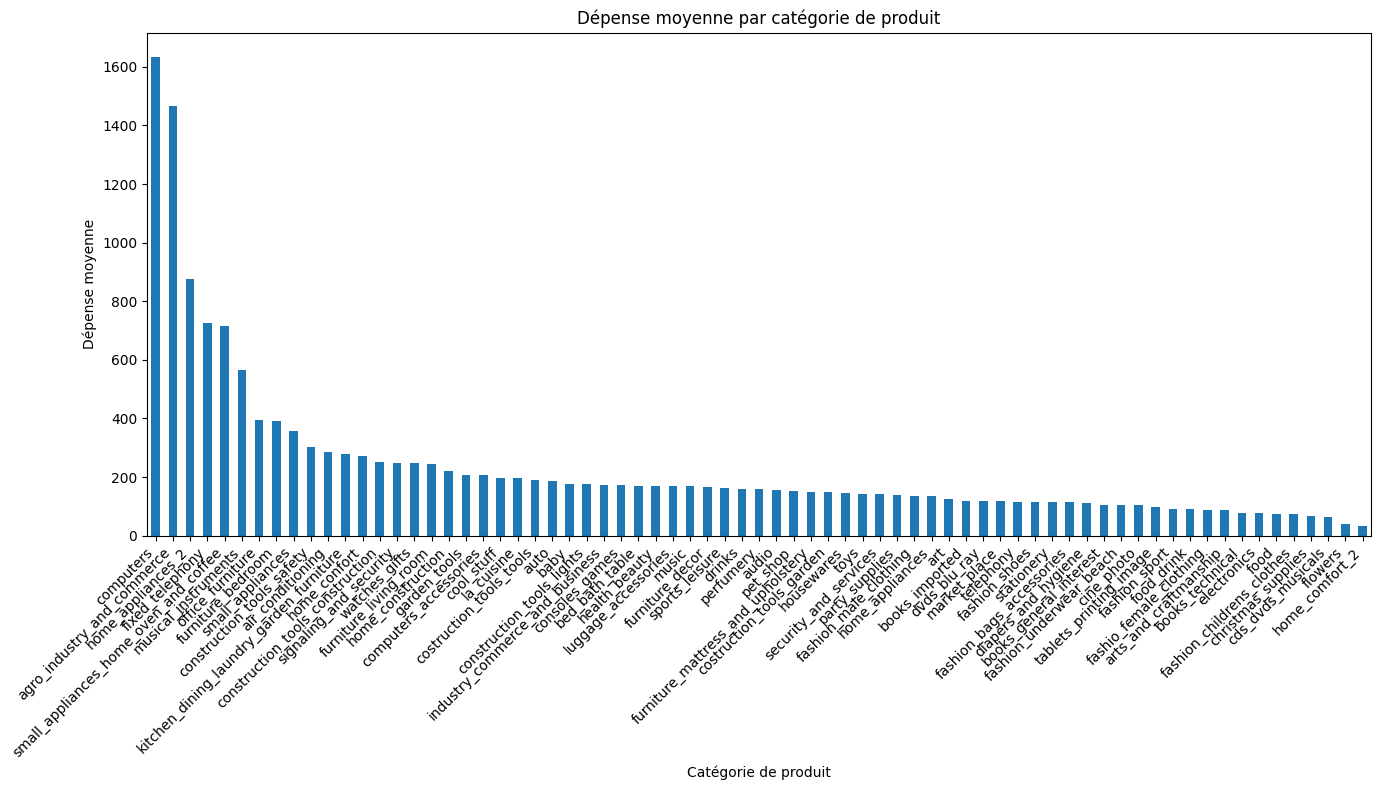

In [573]:
average_expense = df.groupby('product_category_name')['dep_per_categ'].mean()
average_expense = average_expense.sort_values(ascending=False)


# Création du graphique à barres
plt.figure(figsize=(14, 8))
average_expense.plot(kind='bar')
plt.title('Dépense moyenne par catégorie de produit')
plt.xlabel('Catégorie de produit')
plt.ylabel('Dépense moyenne')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes avec alignement à droite
plt.tight_layout()  # Ajustement automatique de la disposition du graphique
plt.show()

### 11) Volume_product_cm3

#### a) Features engineering

In [574]:
# Calcul du Volume de chaque produit :

In [575]:
df['Volume_product_cm3'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']
df[['Volume_product_cm3','product_length_cm','product_height_cm', 'product_width_cm']]

,Volume_product_cm3,product_length_cm,product_height_cm,product_width_cm
0,107136.0,54.0,64.0,31.0
1,53400.0,89.0,15.0,40.0
2,45968.0,52.0,52.0,17.0
3,79968.0,56.0,51.0,28.0
4,23625.0,45.0,15.0,35.0
...,...,...,...,...
112647,11132.0,22.0,22.0,23.0
112648,13200.0,25.0,24.0,22.0
112649,9000.0,25.0,20.0,18.0
112650,3458.0,19.0,13.0,14.0


In [576]:
df[['Volume_product_cm3','product_length_cm','product_height_cm', 'product_width_cm']].describe()

,Volume_product_cm3,product_length_cm,product_height_cm,product_width_cm
count,112652.00000,112652.000000,112652.000000,112652.000000
mean,15331.02395,30.271447,16.617717,23.090287
std,23437.47611,16.137517,13.447207,11.709773
min,168.00000,7.000000,2.000000,6.000000
25%,2856.00000,18.000000,8.000000,15.000000
50%,6624.00000,25.000000,13.000000,20.000000
75%,18576.00000,38.000000,20.000000,30.000000
max,296208.00000,105.000000,105.000000,118.000000


#### b) Analyse univarié

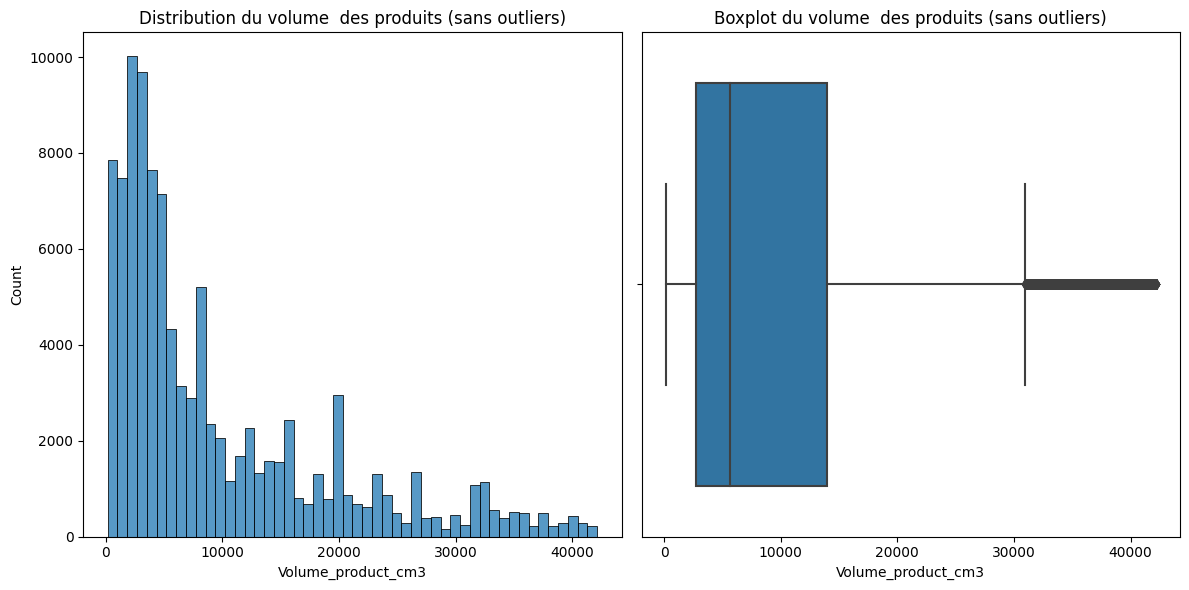

In [577]:
Q1 = df['Volume_product_cm3'].quantile(0.25)
Q3 = df['Volume_product_cm3'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
filtered_data = df[(df['Volume_product_cm3'] >= lower_bound) & (df['Volume_product_cm3'] <= upper_bound)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogramme sans outliers
sns.histplot(filtered_data['Volume_product_cm3'], bins=50, ax=axes[0])
axes[0].set_xlabel('Volume_product_cm3')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution du volume  des produits (sans outliers)')

# Boxplot sans outliers
sns.boxplot(x=filtered_data['Volume_product_cm3'], orient='horizontal', ax=axes[1])
axes[1].set_xlabel('Volume_product_cm3')
axes[1].set_title('Boxplot du volume  des produits (sans outliers)')

plt.tight_layout()
plt.show()

### 12) volume_product

#### a) Features engineering

In [578]:
# Coder la catégorie de produit la plus commander par le client .

In [579]:
df['cat_volume_product'] = pd.cut(df['Volume_product_cm3'],
                                    bins=[0, Q1, Q3, 1000000],
                                    labels=['small', 'medium', 'big'])

### 13) distance_customer_seller

#### a) Features engineering

In [580]:
# Fonction pour calculer la distance entre deux coordonnées (latitude, longitude)
def distance(lat1, lon1, lat2, lon2):
    # Conversion des degrés en radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    # Rayon moyen de la Terre en kilomètres
    R = 6371.0
    
    # Différences de latitude et de longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Calcul de la distance en utilisant la formule de la distance Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    
    return distance


# Créer une nouvelle colonne pour stocker les distances
df['distance_customer_seller'] = 0.0

# Calculer la distance entre le client et le vendeur pour chaque ligne
for index, row in df.iterrows():
    customer_lat = row['customer_estim_lat']
    customer_lng = row['customer_estim_lng']
    seller_lat = row['seller_estim_lat']
    seller_lng = row['seller_estim_lng']
    
    dist = distance(customer_lat, customer_lng, seller_lat, seller_lng)
    
    df.at[index, 'distance_customer_seller'] = dist

#### b) Analyse univarié

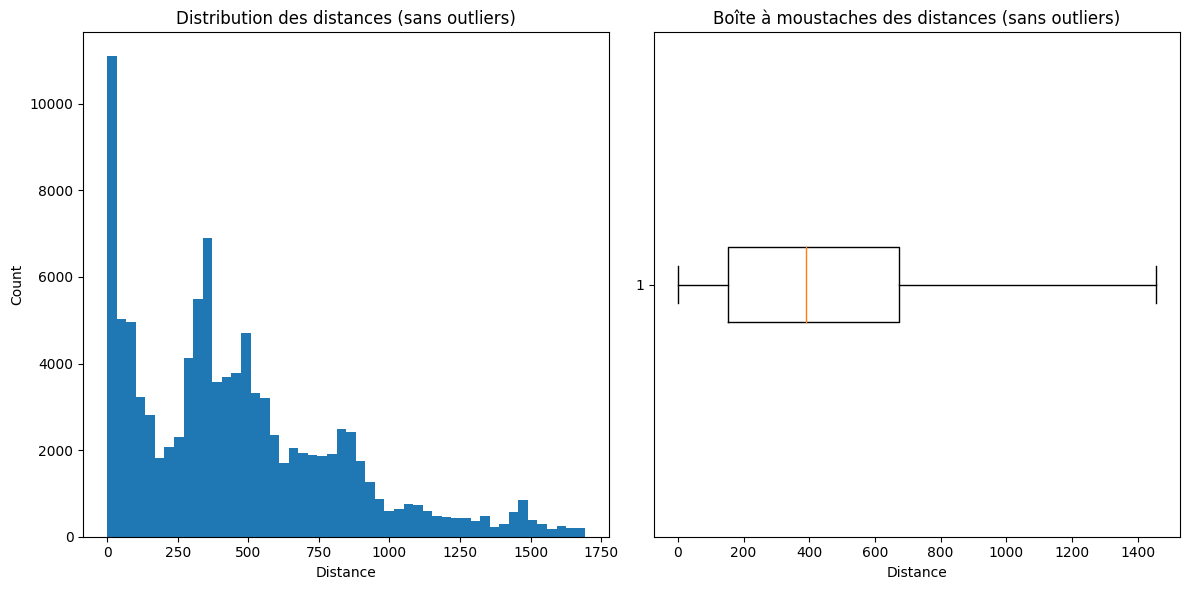

In [582]:
q1 = np.percentile(df['distance_customer_seller'], 25)
q3 = np.percentile(df['distance_customer_seller'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrage des données sans outliers
filtered_data = df[(df['distance_customer_seller'] >= lower_bound) & (df['distance_customer_seller'] <= upper_bound)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogramme sans outliers
axes[0].hist(filtered_data['distance_customer_seller'], bins=50)
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution des distances (sans outliers)')

# Boxplot sans outliers
axes[1].boxplot(filtered_data['distance_customer_seller'], vert=False, showfliers=False)
axes[1].set_xlabel('Distance')
axes[1].set_title('Boîte à moustaches des distances (sans outliers)')

plt.tight_layout()
plt.show()

### 14) daysMean_between_purchase_and_delivery

#### a) Features Engineering

In [583]:
cust = df[df['customer_unique_id'] == "9a736b248f67d166d2fbb006bcb877c3"]

In [584]:
cust.groupby(['customer_unique_id','order_id','product_id','order_status']).nunique()

customer_id  \
customer_unique_id               order_id                         product_id                       order_status                
9a736b248f67d166d2fbb006bcb877c3 67d83bd36ec2c7fb557742fb58837659 4eb99b5f0d7e411f246a5c9c0ae27a5e delivered               1   
                                 895ab968e7bb0d5659d16cd74cd1650c 5ddab10d5e0a23acb99acf56b62b3276 delivered               1   
                                                                  ebf9bc6cd600eadd681384e3116fda85 delivered               1   

                                                                                                                 customer_zip_code_prefix  \
customer_unique_id               order_id                         product_id                       order_status                             
9a736b248f67d166d2fbb006bcb877c3 67d83bd36ec2c7fb557742fb58837659 4eb99b5f0d7e411f246a5c9c0ae27a5e delivered                            1   
                                 895ab968e7bb0d5659d16cd74cd1650c 5ddab10d5e0a23acb99acf56b62b3276 delivered                            1   
                                                                  ebf9bc6cd600eadd681384e3116fda85 delivered                            1   

                                                                                                                 customer_city  \
customer_unique_id               order_id                         product_id                       order_status                  
9a736b248f67d166d2fbb006bcb877c3 67d83bd36ec2c7fb557742fb58837659 4eb99b5f0d7e411f246a5c9c0ae27a5e delivered                 1   
                                 895ab968e7bb0d5659d16cd74cd1650c 5ddab10d5e0a23acb99acf56b62b3276 delivered                 1   
                                                                  ebf9bc6cd600eadd681384e3116fda85 delivered                 1   

                                                                                                                 customer_state  \
customer_unique_id               order_id                         product_id                       order_status                   
9a736b248f67d166d2fbb006bcb877c3 67d83bd36ec2c7fb557742fb58837659 4eb99b5f0d7e411f246a5c9c0ae27a5e delivered                  1   
                                 895ab968e7bb0d5659d16cd74cd1650c 5ddab10d5e0a23acb99acf56b62b3276 delivered                  1   
                                                                  ebf9bc6cd600eadd681384e3116fda85 delivered                  1   

                                                                                                                 order_purchase_timestamp  \
customer_unique_id               order_id                         product_id                       order_status                             
9a736b248f67d166d2fbb006bcb877c3 67d83bd36ec2c7fb557742fb58837659 4eb99b5f0d7e411f246a5c9c0ae27a5e delivered                            1   
                                 895ab968e7bb0d5659d16cd74cd1650c 5ddab10d5e0a23acb99acf56b62b3276 delivered                            1   
                                                                  ebf9bc6cd600eadd681384e3116fda85 delivered                            1   

                                                                                                                 order_approved_at  \
customer_unique_id               order_id                         product_id                       order_status                      
9a736b248f67d166d2fbb006bcb877c3 67d83bd36ec2c7fb557742fb58837659 4eb99b5f0d7e411f246a5c9c0ae27a5e delivered                     1   
                                 895ab968e7bb0d5659d16cd74cd1650c 5ddab10d5e0a23acb99acf56b62b3276 delivered                     1   
                                                                  ebf9bc6cd600eadd681384e3116fda85 delivered                     1   

                                                                                  

In [585]:
# Selection d'un client pour check la features
cust = df[df['customer_unique_id'] == "f9ae226291893fda10af7965268fb7f6"][['customer_unique_id','order_id','order_purchase_timestamp','order_delivered_customer_date']]

In [586]:
cust['days_between_purchase_and_delivery'] = (cust['order_delivered_customer_date'] - cust['order_purchase_timestamp']).dt.days

In [587]:
cust = cust.groupby(['customer_unique_id','order_id']).mean().reset_index()
cust

,customer_unique_id,order_id,days_between_purchase_and_delivery
0,f9ae226291893fda10af7965268fb7f6,370e2e6c1a9fd451eb7f0852daa3b006,18.0
1,f9ae226291893fda10af7965268fb7f6,c6492b842ac190db807c15aff21a7dd6,11.0


In [588]:
cust.groupby('customer_unique_id')['days_between_purchase_and_delivery'].mean().reset_index()

,customer_unique_id,days_between_purchase_and_delivery
0,f9ae226291893fda10af7965268fb7f6,14.5


In [589]:
df['days_between_purchase_and_delivery'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [590]:
daysMean_between_purchase_and_delivery = df.groupby(['customer_unique_id','order_id']).mean().reset_index()

In [591]:
daysMean_between_purchase_and_delivery = daysMean_between_purchase_and_delivery.groupby('customer_unique_id')['days_between_purchase_and_delivery'].mean().reset_index()

In [592]:
# check ok
daysMean_between_purchase_and_delivery[daysMean_between_purchase_and_delivery['customer_unique_id']== "f9ae226291893fda10af7965268fb7f6"]

,customer_unique_id,days_between_purchase_and_delivery
88844,f9ae226291893fda10af7965268fb7f6,14.5


In [593]:
daysMean_between_purchase_and_delivery.rename(columns={'days_between_purchase_and_delivery':'daysMean_between_purchase_and_delivery'}, inplace=True)

#### b) Analyse univariée

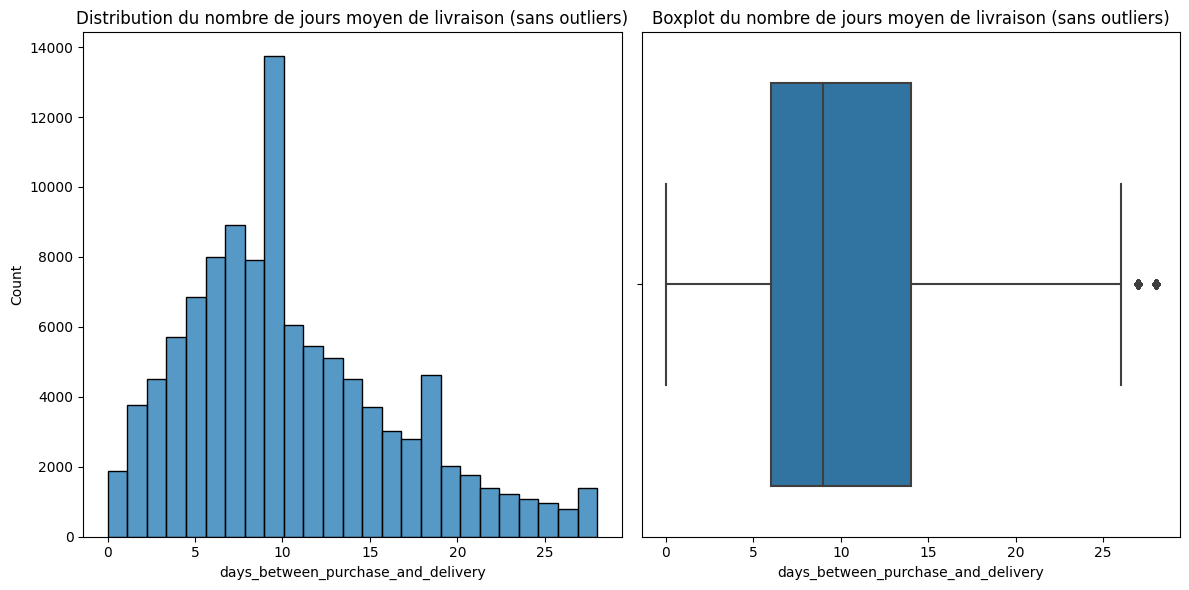

In [594]:
Q1 = df['days_between_purchase_and_delivery'].quantile(0.25)
Q3 = df['days_between_purchase_and_delivery'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
filtered_data = df[(df['days_between_purchase_and_delivery'] >= lower_bound) & (df['days_between_purchase_and_delivery'] <= upper_bound)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogramme sans outliers
sns.histplot(filtered_data['days_between_purchase_and_delivery'], bins=25, ax=axes[0])
axes[0].set_xlabel('days_between_purchase_and_delivery')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution du nombre de jours moyen de livraison (sans outliers)')

# Boxplot sans outliers
sns.boxplot(x=filtered_data['days_between_purchase_and_delivery'], orient='horizontal', ax=axes[1])
axes[1].set_xlabel('days_between_purchase_and_delivery')
axes[1].set_title('Boxplot du nombre de jours moyen de livraison (sans outliers)')

plt.tight_layout()
plt.show()

In [595]:
# Variable intéressante mais il faudrait la combiné avec une autre variable
# pour qu'elle nous donne une indication sur la satisfaction du client
# Idée : rajouter une features pour la différence entre le délai de livraison réel et cell estimé.

### 15) Taux de retour

In [596]:
# Calcul le nombre de produits avec status délivered / nombre de produits commandés total

In [597]:
# Pas suffisament de data intéressantes pour coder cette features
df[df['order_status'] != "delivered"][['customer_unique_id','order_id','product_id','order_status']]

,customer_unique_id,order_id,product_id,order_status
30674,59a7bb642795ddc85534fbd5f7360334,770d331c84e5b214bd9dc70a10b829d0,eba7488e1c67729f045ab43fac426f2e,canceled
57296,6a04c8339c44b23e189446216a494569,1950d777989f6a877539f53795b4c3c3,e435ceb7ced9b8446defd858630454ed,canceled
65103,f9af3bfab584769f34c314b222d34263,8beb59392e21af5eb9547ae1a9938d06,c66def7098f4d87751f40c3a4855ced1,canceled
67615,b8b8726af116a5cfb35b0315ecef9172,65d1e226dfaeb8cdc42f665422522d14,9c7bdf67b06b419aefb93cfdfc96c55d,canceled
86545,d93a22bb52bb2f41a7267b8a02370781,2c45c33d2f9cb8ff8b1c86cc28c11c30,e24f73b7631ee3fbb2ab700a9acaa258,canceled
87369,2f96790fba243100730c8d1185dd2f25,dabf2b0e35b423f94618bf965fcb7514,473795a355d29305c3ea6b156833adf5,canceled
87370,2f96790fba243100730c8d1185dd2f25,dabf2b0e35b423f94618bf965fcb7514,7cd29da0653abeb444703cc5a957f479,canceled


## 6) Analyse multivariée

In [598]:
###  les clients ayant commandés plus d'une fois (~7%) représentent-ils une part importante en CA ?  

In [599]:
group_c2 = df[df['freq_purchase_by_customer'] != 1]
group_c1 = df[df['freq_purchase_by_customer'] == 1]

In [600]:
print(group_c1.groupby(by=['customer_unique_id']).mean()['total_dep_by_customer'].sum())
print(group_c2.groupby(by=['customer_unique_id']).mean()['total_dep_by_customer'].sum())

14242166.27
772645.11


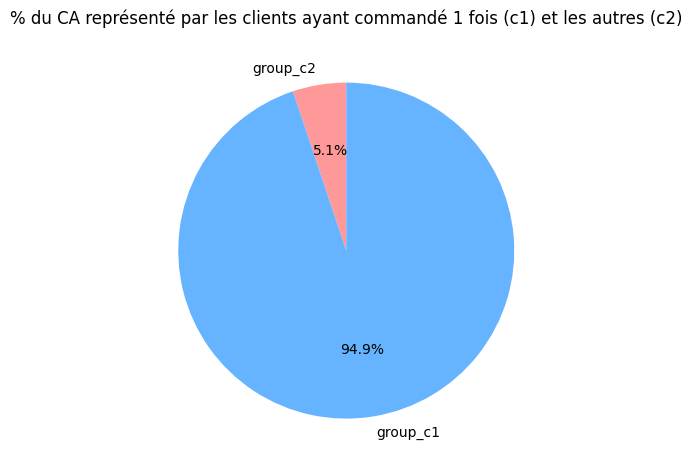

In [601]:
valeurs = [772645.11, 14242166.27]
labels = ['group_c2', 'group_c1']
couleurs = ['#ff9999', '#66b3ff']

# Calcul des pourcentages
total = sum(valeurs)
pourcentages = [(valeur / total) * 100 for valeur in valeurs]

# Créer le pie chart avec une marge
fig, ax = plt.subplots()
ax.pie(pourcentages, labels=labels, colors=couleurs, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Pour s'assurer que le pie chart est un cercle

# Ajouter un titre avec une marge
plt.title("% du CA représenté par les clients ayant commandé 1 fois (c1) et les autres (c2)", fontsize=12, pad=30)

# Afficher le pie chart
plt.show()


In [602]:
# conclusion: "Les clients ayant commandés plusieurs fois sont rares et ne représentent pas une part importante du CA,
# D'un point de vue métier il n'est donc pas pertinents d'utiliser cet indicateur comme outil de segmentation

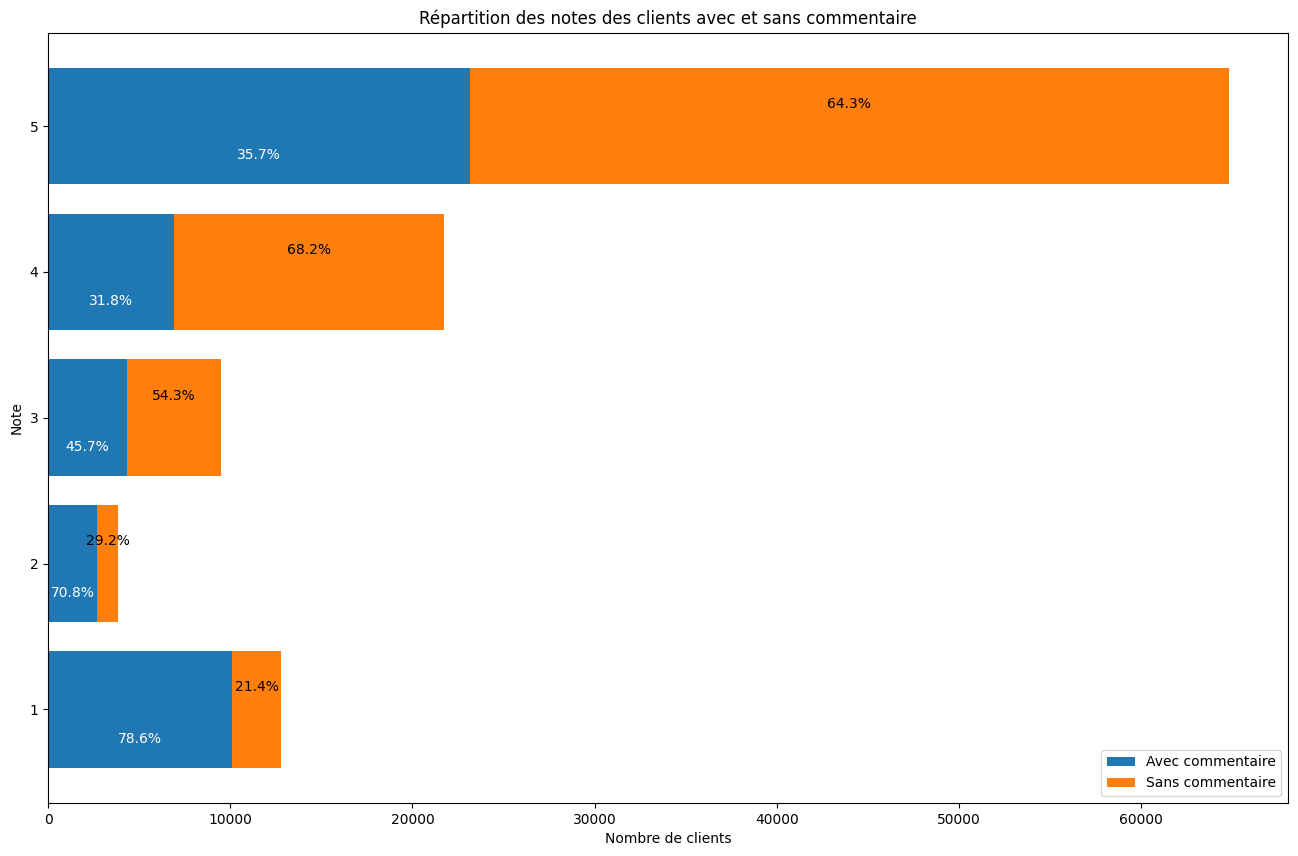

In [603]:
# features : nb_of_comment / review_score

# Compter le nombre de clients ayant laissé ou non un commentaire pour chaque note
comment_counts = df.groupby('review_score')['comment'].value_counts().unstack().fillna(0)

# Calculer les pourcentages de chaque catégorie
total_counts = comment_counts.sum(axis=1)
comment_percentages = comment_counts[True] / total_counts * 100
no_comment_percentages = comment_counts[False] / total_counts * 100

# Créer un barplot horizontal avec deux parties pour chaque barre et afficher les pourcentages
plt.figure(figsize=(16, 10))
bar1 = plt.barh(comment_counts.index, comment_counts[True], label='Avec commentaire')
bar2 = plt.barh(comment_counts.index, comment_counts[False], left=comment_counts[True], label='Sans commentaire')

# Ajouter les pourcentages à l'intérieur des barres
for i, rect in enumerate(bar1):
    width = rect.get_width()
    if width < 5:
        plt.text(width + 1, rect.get_y() + rect.get_height() / 2 - 0.2, f'{comment_percentages.iloc[i]:.1f}%',
                 ha='left', va='center', color='white')
    else:
        plt.text(rect.get_x() + width / 2, rect.get_y() + rect.get_height() / 2 - 0.2, f'{comment_percentages.iloc[i]:.1f}%',
                 ha='center', va='center', color='white')

for i, rect in enumerate(bar2):
    width = rect.get_width()
    if width < 5:
        if comment_counts[True].iloc[i] < 5:
            plt.text(comment_counts[True].iloc[i] - 1, rect.get_y() + rect.get_height() / 2 + 0.2,
                     f'{no_comment_percentages.iloc[i]:.1f}%', ha='right', va='bottom', color='black')
        else:
            plt.text(rect.get_x() + width / 2, rect.get_y() + rect.get_height() / 2 + 0.2,
                     f'{no_comment_percentages.iloc[i]:.1f}%', ha='center', va='top', color='black')
    else:
        plt.text(rect.get_x() + width / 2, rect.get_y() + rect.get_height() / 2 + 0.2,
                 f'{no_comment_percentages.iloc[i]:.1f}%', ha='center', va='top', color='black')

plt.xlabel('Nombre de clients')
plt.ylabel('Note')
plt.title('Répartition des notes des clients avec et sans commentaire')
plt.legend()

plt.show()

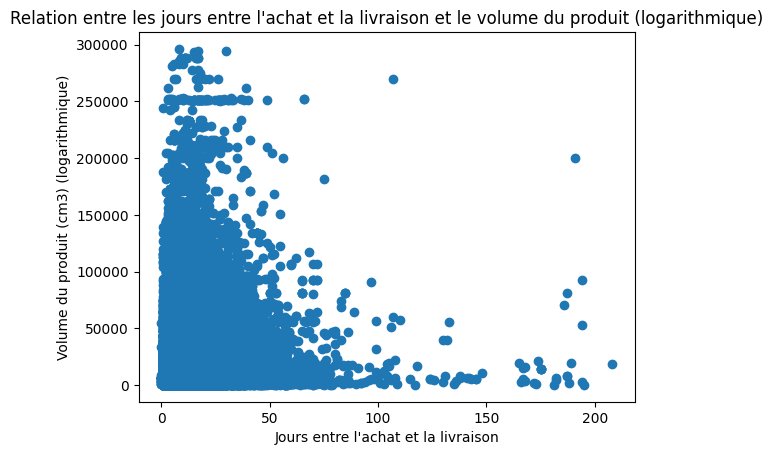

In [604]:
days = df['days_between_purchase_and_delivery']
log_volume = df['Volume_product_cm3']

# Créer le scatter plot avec les variables transformées
plt.scatter(days, log_volume)

# Ajouter un titre et des étiquettes aux axes
plt.title("Relation entre les jours entre l'achat et la livraison et le volume du produit (logarithmique)")
plt.xlabel("Jours entre l'achat et la livraison")
plt.ylabel("Volume du produit (cm3) (logarithmique)")

# Afficher le scatter plot
plt.show()

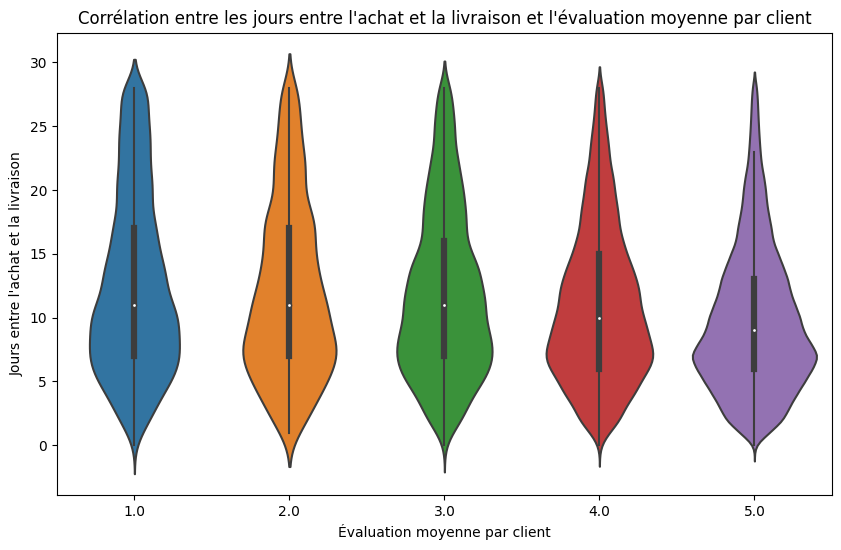

In [605]:
data = pd.DataFrame({'days': filtered_data['days_between_purchase_and_delivery'], 'score': filtered_data['review_score']})

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(10, 6))

# Créer le violon plot
sns.violinplot(x='score', y='days', data=data, ax=ax)

# Ajouter un titre et des étiquettes aux axes
plt.title("Corrélation entre les jours entre l'achat et la livraison et l'évaluation moyenne par client")
plt.xlabel("Évaluation moyenne par client")
plt.ylabel("Jours entre l'achat et la livraison")

# Afficher le violon plot
plt.show()


In [606]:
filtered_data['days_between_purchase_and_delivery'].corr(filtered_data['eval_mean_per_customer'])

-0.15905861471004162

## 7) Features sélection

In [620]:
features = ['customer_unique_id']

### A) Rentablitié

In [621]:
### Montant total des achats du client sur le site
features.append('total_dep_by_customer')

### B) Contenu du panier

In [622]:
### Nombre de produits achetés
features.append('nb_products_buy')

In [623]:
### Volume moyen des produits achetés
features.append('Volume_product_cm3')

### C) Satisfaction du client

In [624]:
### Note moyenne du client par commandes
features.append('eval_mean_per_customer')

In [625]:
### Nombre de commentaires moyens
features.append('nb_of_comment')

### D) Comportement d'achat

In [626]:
### Type de paiements favoris 
features.append('fav_payment_type_encoded')

In [627]:
### Distance Achteur / Vendeur moyenne
features.append('distance_customer_seller')

In [628]:
df[features]

,customer_unique_id,total_dep_by_customer,nb_products_buy,Volume_product_cm3,eval_mean_per_customer,nb_of_comment,fav_payment_type_encoded,distance_customer_seller
0,861eff4711a542e4b93843c6dd7febb0,146.87,1,107136.0,4.0,0.0,1,348.669640
1,290c77bc529b7ac935b93aa66c333dc3,335.48,1,53400.0,5.0,0.0,1,413.823504
2,060e732b5b29e8181a18229c7b0b2b5e,157.73,1,45968.0,5.0,0.0,1,29.951598
3,259dac757896d24d7702b9acbbff3f3c,173.30,1,79968.0,5.0,0.0,1,18.504046
4,345ecd01c38d18a9036ed96c73b8d066,252.25,1,23625.0,5.0,1.0,1,220.061313
...,...,...,...,...,...,...,...,...
112647,1a29b476fee25c95fbafc67c5ac95cf8,88.78,1,11132.0,4.0,0.0,1,357.876152
112648,d52a67c98be1cf6a5c84435bd38d095d,129.06,1,13200.0,5.0,0.0,1,251.153081
112649,e9f50caf99f032f0bf3c55141f019d99,56.04,1,9000.0,1.0,1.0,1,2367.081714
112650,73c2643a0a458b49f58cea58833b192e,711.07,1,3458.0,5.0,0.0,1,999.039829


### Groupby customer_unique_id => 1 ligne == 1 client

In [629]:
cust = df[df['customer_unique_id'] == "9a736b248f67d166d2fbb006bcb877c3"]

In [630]:
cust[features]

,customer_unique_id,total_dep_by_customer,nb_products_buy,Volume_product_cm3,eval_mean_per_customer,nb_of_comment,fav_payment_type_encoded,distance_customer_seller
21157,9a736b248f67d166d2fbb006bcb877c3,233.49,3,18450.0,5.0,0.0,3,380.996745
21158,9a736b248f67d166d2fbb006bcb877c3,233.49,3,18450.0,5.0,0.0,3,380.996745
21159,9a736b248f67d166d2fbb006bcb877c3,233.49,3,6600.0,5.0,0.0,3,379.457653
21160,9a736b248f67d166d2fbb006bcb877c3,233.49,3,18450.0,5.0,0.0,3,380.996745
21161,9a736b248f67d166d2fbb006bcb877c3,233.49,3,18450.0,5.0,0.0,3,380.996745
...,...,...,...,...,...,...,...,...
88403,9a736b248f67d166d2fbb006bcb877c3,233.49,3,80000.0,5.0,0.0,3,99.782482
88404,9a736b248f67d166d2fbb006bcb877c3,233.49,3,80000.0,5.0,0.0,3,99.782482
88405,9a736b248f67d166d2fbb006bcb877c3,233.49,3,80000.0,5.0,0.0,3,99.782482
88406,9a736b248f67d166d2fbb006bcb877c3,233.49,3,80000.0,5.0,0.0,3,99.782482


In [631]:
# Lors du groupby (mean) distance_customer_seller et Volume_product_cm3 vont être une moyenne pour chaque client.
# pour les autres features, rien n'est sensé changer 
cust[features].describe()

,total_dep_by_customer,nb_products_buy,Volume_product_cm3,eval_mean_per_customer,nb_of_comment,fav_payment_type_encoded,distance_customer_seller
count,7.500000e+01,75.0,75.000000,75.0,75.0,75.0,75.000000
mean,2.334900e+02,3.0,24980.000000,5.0,0.0,3.0,335.571517
std,5.722621e-14,0.0,24717.767709,0.0,0.0,0.0,103.601917
min,2.334900e+02,3.0,6600.000000,5.0,0.0,3.0,99.782482
25%,2.334900e+02,3.0,6600.000000,5.0,0.0,3.0,379.457653
50%,2.334900e+02,3.0,18450.000000,5.0,0.0,3.0,380.996745
75%,2.334900e+02,3.0,18450.000000,5.0,0.0,3.0,380.996745
max,2.334900e+02,3.0,80000.000000,5.0,0.0,3.0,380.996745


In [636]:
cust[features].head(1)

,customer_unique_id,total_dep_by_customer,nb_products_buy,Volume_product_cm3,eval_mean_per_customer,nb_of_comment,fav_payment_type_encoded,distance_customer_seller
21157,9a736b248f67d166d2fbb006bcb877c3,233.49,3,18450.0,5.0,0.0,3,380.996745


In [634]:
# Tout est ok
cust[features].groupby('customer_unique_id').mean().reset_index()

,customer_unique_id,total_dep_by_customer,nb_products_buy,Volume_product_cm3,eval_mean_per_customer,nb_of_comment,fav_payment_type_encoded,distance_customer_seller
0,9a736b248f67d166d2fbb006bcb877c3,233.49,3.0,24980.0,5.0,0.0,3.0,335.571517


In [637]:
new_df = df[features].groupby('customer_unique_id').mean().reset_index()

In [639]:
skim(new_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 91032  │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 8      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ total_dep_by_custome       │   0 │      0 │     160 │     220 │  9.6 │     63 │    180 │   14000 │    █    │  │
│ │ nb_products_buy            │   0 │      0 │     1.1 │    0.31 │    1 │      1 │      1 │      13 │    █    │  │
│ │ Volume_product_cm3         │   0 │      0 │   15000 │   23000 │  170 │   2900 │  18000 │  300000 │    █    │  │
│ │ eval_mean_per_custom       │   0 │      0 │     4.2 │     1.3 │    1 │      4 │      5 │       5 │ ▁  ▁▃█  │  │
│ │ nb_of_comment              │   0 │      0 │    0.42 │    0.51 │    0 │      0 │      1 │       5 │   █▅    │  │
│ │ fav_payment_type_enc       │   0 │      0 │    0.84 │     0.5 │    0 │      1 │      1 │       3 │   ▂ █   │  │
│ │ distance_customer_se       │   0 │      0 │     600 │     590 │    0 │    190 │    800 │    8700 │   █▁    │  │
│ └────────────────────────────┴─────┴────────┴─────────┴─────────┴──────┴────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customer_unique_id                 │      0 │         0 │                         1 │                91000 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### check des corrélations

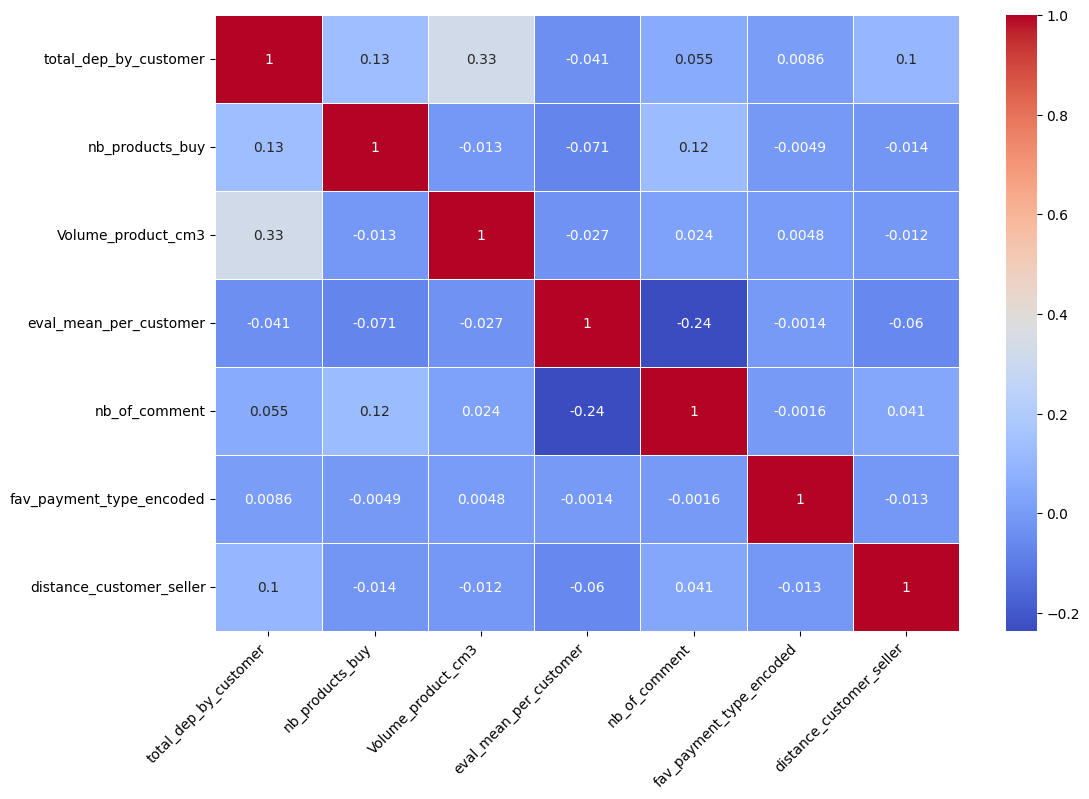

In [642]:
# Calculer la matrice de corrélation
corr_matrix = new_df.corr()

# Créer une figure et un axe avec une taille plus grande
fig, ax = plt.subplots(figsize=(12, 8))

# Générer la heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)

# Personnaliser les labels des axes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Afficher la figure
plt.show()

In [643]:
# Aucune variable n'est fortement corrélés avec une autre,
# petite corrèlation à surveiller tout de même entre le total dépensé et le volume du produit
# ce qui signifie que plus un objet est volumineux, plus il a tendence à être cher (ou frais de livraison élevés)